**Note about variables** 

- For understanding the timing of data collection and informant, See https://docs.google.com/spreadsheets/d/19BKYz2G_-WNu7xHidhiK8o8FtNLfhx8CxODsYy0D4lM/edit#gid=0
- In general, variables that starts with
    - S: Rated by students
    - P: Rated by parents
    - M: Rated by math teachers
    - N: Rated by science teachers

In [1]:
from datetime import datetime, timezone

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import codebook

pd.options.display.max_rows = 500
pd.options.display.max_columns = 200

In [2]:
rdf = pd.read_csv("no_weights_hsls_17_student_pets_sr_v1_0.csv")

In [3]:
df = rdf.copy()

In [4]:
df.head()

Unnamed: 0  STU_ID  SCH_ID  X1NCESID  X2NCESID  STRAT_ID  PSU  X2UNIV1  \
0           0   10001      -5        -5        -5        -5   -5       11   
1           1   10002      -5        -5        -5        -5   -5       11   
2           2   10003      -5        -5        -5        -5   -5       11   
3           3   10004      -5        -5        -5        -5   -5       10   
4           4   10005      -5        -5        -5        -5   -5       11   

   X2UNIV2A  X2UNIV2B  X3UNIV1  X4UNIV1  X1SEX  X1RACE  X1HISPANIC  X1WHITE  \
0         1         1     1111    11111      1       8           0        1   
1         1         1     1111    11111      2       8           0        1   
2         1         1     1111    11111      2       3           0        0   
3         1         7     1001    10011      2       8           0        1   
4         1         1     1111    11111      1       8           0        1   

   X1BLACK  X1ASIAN  X1PACISLE  X1AMINDIAN  X1HISPTYPE  X1ASIANTYPE  \
0        0       -5         -5          -5          -5           -5   
1        0       -5         -5          -5          -5           -5   
2        1       -5         -5          -5          -5           -5   
3        0       -5         -5          -5          -5           -5   
4        0       -5         -5          -5          -5           -5   

   X1NATIVELANG  X1DUALLANG  X1STDOB  X1TXMTH  X1TXMSEM  X1TXMSCR  X1TXMTSCOR  \
0            -5           1   199502   0.8304    0.2549   50.4919     59.3710   
1            -5           1   199511  -0.2956    0.2696   35.8045     47.6821   
2            -5           1   199506   1.2997    0.2555   56.0477     64.2431   
3            -5           1   199505  -0.1427    0.2649   38.0888     49.2690   
4            -5           1   199505   1.1405    0.2312   54.1762     62.5897   

   X1TXMQUINT  X1TXMPROF1  X1TXMPROF2  X1TXMPROF3  X1TXMPROF4  X1TXMPROF5  \
0           5      0.9997      0.9669      0.8976      0.3126      0.1013   
1           2      0.9714      0.5204      0.1768      0.0582      0.0512   
2           5      1.0000      0.9914      0.9838      0.6606      0.2001   
3           3      0.9843      0.6416      0.2459      0.0662      0.0531   
4           5      0.9999      0.9863      0.9686      0.5385      0.1551   

   X1MACC  X1PARRESP  X1P1RELATION  X1PAR1EDU  X1PAR1EMP  X1PAR1OCC2  \
0       0          1             2          5          4          21   
1      -8          1             1          3          3          43   
2       0          1             1          7          4          21   
3       0          1            15          4          2          11   
4       0          1             1          4          4          37   

   X1PAR1OCC6  X1PAR1OCC_STEM1  X1PAR1OCC_STEM2  X1PAR1RACE  X1P2RELATION  \
0          -5                0               -5           8             1   
1          -5                0               -5           5             2   
2          -5                0               -5           3            -7   
3          -5                0               -5           8            -7   
4          -5                0               -5           8            -7   

   X1PAR2EDU  X1PAR2EMP  X1PAR2OCC2  X1PAR2OCC6  X1PAR2OCC_STEM1  \
0          5          4          29          -5                4   
1          2          2          51          -5                0   
2         -7         -7          -7          -5               -7   
3         -7         -7          -7          -5               -7   
4         -7         -7          -7          -5               -7   

   X1PAR2OCC_STEM2  X1PAR2RACE  X1PAREDU  X1PARPATTERN  X1MOMRESP  X1MOMREL  \
0               -5           8         5             1          0         1   
1               -5           8         3             1          1         1   
2               -5          -7         7             7          1         1   
3               -5          -7         4            11          0  

In [5]:
df.shape

(23503, 3987)

Below is the variables included in the data exploration.

In [6]:
column_data = """STU_ID,
X1RACE,
X1WHITE,
X1SEX, 
X1SESQ5,
X1PAR1OCC_STEM1, 
X1PAR2OCC_STEM1, 
P2HIMAJ1_STEM, 
P2HIMAJ2_STEM,
S1MCAMP, 
S1SCAMP, 
P1CAMPMS, 
X1TXMQUINT,
X2TXMQUINT, 
S1MPERSON1, 
S1MPERSON2, 
S1SPERSON1, 
S1SPERSON2, 
S2MPERSON1, 
S2MPERSON2, 
S2SPERSON1, 
S2SPERSON2, 
X2STU30OCC_STEM1, 
S3FIELD_STEM, 
S3FIELD2, 
S4FIELD2, 
X4ENTMJST,
X4ENTRYMAJ23, 
X4OCCFB2, 
X4OCCFBSTEM1, 
X4OCC30STEM1, 
S4MPERSON1, 
S4MPERSON2, 
S4SPERSON1, 
S4SPERSON2,
X5STEMCRED,
P1MTHCOMP,
P1SCICOMP,
S1MTCHMFDIFF, 
S1STCHMFDIFF,
S1MTCHFAIR, 
S1MTCHRESPCT,
S1MTCHTREAT, 
S1STCHRESPCT, 
S1STCHFAIR, 
S1STCHTREAT,
M1MTHCOMP, 
M1SCICOMP, 
N1MTHCOMP, 
N1SCICOMP, 
S2MTCHTREAT, 
S2STCHTREAT,
S4MTHMF, 
S4MTHRC,
S4SCIMF, 
S4SCIRC,
S1MTHCOMP, 
S1SCICOMP, 
S2MTHCOMP, 
S2SCICOMP,
S2MBORN, 
S2SBORN, 
S4MBORN, 
S4SBORN"""

In [7]:
columns = [c.strip() for c in column_data.split(",")]

Select columns of interest.

In [8]:
cdf = df[columns]
cdf.head()

STU_ID  X1RACE  X1WHITE  X1SEX  X1SESQ5  X1PAR1OCC_STEM1  X1PAR2OCC_STEM1  \
0   10001       8        1      1        5                0                4   
1   10002       8        1      2        2                0                0   
2   10003       3        0      2        5                0               -7   
3   10004       8        1      2        5                0               -7   
4   10005       8        1      1        4                0               -7   

   P2HIMAJ1_STEM  P2HIMAJ2_STEM  S1MCAMP  S1SCAMP  P1CAMPMS  X1TXMQUINT  \
0             -9              0        0        0         0           5   
1              1             -7        0        0         0           2   
2              0             -7        0        0         0           5   
3             -7              1        0        0         0           3   
4              1             -7        0        0         0           5   

   X2TXMQUINT  S1MPERSON1  S1MPERSON2  S1SPERSON1  S1SPERSON2  S2MPERSON1  \
0           5           1           1           2           2           3   
1           4           3           3           2           2           3   
2           4           3           3           3           3           4   
3          -8           2           2           3           3          -8   
4           3           1           3           3           3          -9   

   S2MPERSON2  S2SPERSON1  S2SPERSON2  X2STU30OCC_STEM1  S3FIELD_STEM  \
0           2           2           2                 0             0   
1           3           3           3                 0             0   
2           4           4           4                 0             0   
3          -8          -8          -8                -8            -8   
4          -9           1          -9                 0             0   

   S3FIELD2  S4FIELD2  X4ENTMJST  X4ENTRYMAJ23  X4OCCFB2  X4OCCFBSTEM1  \
0        13        -9         -9            -9        -7            -7   
1        13        13          0            16        43             0   
2        42        42          1             8        35             0   
3        -8        -7         -7            -7        55             0   
4        42        -7         -7            -7        -7            -7   

   X4OCC30STEM1  S4MPERSON1  S4MPERSON2  S4SPERSON1  S4SPERSON2  X5STEMCRED  \
0             4           2           2           1           1           0   
1             0           2           2           2           2           0   
2             5           1           1           1           1          -7   
3            -7          -4          -4          -4          -4          -6   
4             0           3           2           3           2          -6   

   P1MTHCOMP  P1SCICOMP  S1MTCHMFDIFF  S1STCHMFDIFF  S1MTCHFAIR  S1MTCHRESPCT  \
0          4          4             3             3           1             1   
1          5          3             4             4           1             2   
2          5          4             4             4           1             1   
3          5          1             3             3           2             2   
4          3          3             4             2           3             3   

   S1MTCHTREAT  S1STCHRESPCT  S1STCHFAIR  S1STCHTREAT  M1MTHCOMP  M1SCICOMP  \
0            3             1           1            3          3          3   
1            4             1           1            4          3          3   
2            4             1           1            4          3          4   
3            3             2           2            3         -9         -9   
4            1             2           3            1          3          4   

   N1MTHCOMP  N1SCICOMP  S2MTCHTREAT  S2STCHTREAT  S4MTHMF  S4MTHRC  S4SCIMF  \
0          3          3            2            3        1        1        1   
1          3          3            3            3       -7       -7       -7   
2         -8         -8            3           

Because variable names are not self-explanatory, attach variable description to each variable name.

In [9]:
labels = codebook.variable_labels()
encodings = codebook.student_encodings()

In [10]:
cdf = df[columns].copy()
for column in cdf.columns:
    if column in encodings:
        cdf[column] = (
            cdf[column]
            .astype("category")
            .cat.rename_categories(encodings[column])
            .cat.set_categories(
                reversed([v for k, v in encodings[column].items() if k >= 0]),
                ordered=codebook.is_ordered(encoding=encodings[column]),
            )
        )
cdf = cdf.rename(labels, axis=1)
cdf.head()

Student ID X1 Student's race/ethnicity-composite  \
0       10001                   White, non-Hispanic   
1       10002                   White, non-Hispanic   
2       10003  Black/African-American, non-Hispanic   
3       10004                   White, non-Hispanic   
4       10005                   White, non-Hispanic   

  X1 Student is White-composite X1 Student's sex  \
0              Student is White             Male   
1              Student is White           Female   
2          Student is not White           Female   
3              Student is White           Female   
4              Student is White             Male   

  X1 Quintile coding of X1SES composite  \
0              Fifth quintile (highest)   
1                       Second quintile   
2              Fifth quintile (highest)   
3              Fifth quintile (highest)   
4                       Fourth quintile   

  X1 Parent 1: current/most recent occupation: STEM code 1 (sub-domain)  \
0                              Not a STEM occupation                      
1                              Not a STEM occupation                      
2                              Not a STEM occupation                      
3                              Not a STEM occupation                      
4                              Not a STEM occupation                      

  X1 Parent 2: current/most recent occupation: STEM code 1 (sub-domain)  \
0                                 Health Occupations                      
1                              Not a STEM occupation                      
2                                                NaN                      
3                                                NaN                      
4                                                NaN                      

  P2 D02C Parent 1's major for highest level of education STEM code  \
0                                                NaN                  
1                                                Yes                  
2                                                 No                  
3                                                NaN                  
4                                                Yes                  

  P2 D10C Parent 2's major for highest level of education STEM code  \
0                                                 No                  
1                                                NaN                  
2                                                NaN                  
3                                                Yes                  
4                                                NaN                  

  S1 B04C 9th grader participated in math camp since start of 08-09 school year  \
0                                                 No                              
1                                                 No                              
2                                                 No                              
3                                                 No                              
4                                                 No                              

  S1 B04G 9th grader participated in science camp since start of 08-09 school year  \
0                                                 No                                 
1                                                 No                                 
2                                                 No                                 
3                                                 No                                 
4                                                 No                                 

  P1 E06F Participated in math or science camp outside of school in last year  \
0                                                 No                            
1                                                 No                            
2                                                 No                            
3   

In [11]:
cdf.shape

(23503, 64)

- The dataset for this exploration contains 64 variables and 23,503 students.
- Check for missing values for each variable.

In [12]:
col_na = round(100*(cdf.isna().sum()/len(cdf)), 2)
col_nunique = cdf.nunique()    
cdf_summary = pd.DataFrame({"data_type": cdf.dtypes,
                           "percent_missing_values": col_na,
                           "total_unique_values": col_nunique})
cdf_summary

data_type  \
Student ID                                             int64   
X1 Student's race/ethnicity-composite               category   
X1 Student is White-composite                       category   
X1 Student's sex                                    category   
X1 Quintile coding of X1SES composite               category   
X1 Parent 1: current/most recent occupation: ST...  category   
X1 Parent 2: current/most recent occupation: ST...  category   
P2 D02C Parent 1's major for highest level of e...  category   
P2 D10C Parent 2's major for highest level of e...  category   
S1 B04C 9th grader participated in math camp si...  category   
S1 B04G 9th grader participated in science camp...  category   
P1 E06F Participated in math or science camp ou...  category   
X1 Mathematics quintile score                       category   
X2 Mathematics quintile score                       category   
S1 C01A 9th grader sees himself/herself as a ma...  category   
S1 C01B Others see 9th grader as a math person      category   
S1 D01A 9th grader sees himself/herself as a sc...  category   
S1 D01B Others see 9th grader as a science person   category   
S2 E01A Teenager sees himself/herself as a math...  category   
S2 E01B Others see teenager as a math person        category   
S2 E03A Teenager sees himself/herself as a scie...  category   
S2 E03B Others see teenager as a science person     category   
X2 Student occupation at age 30: STEM code 1 (s...  category   
S3 C05C Major will be considering - STEM code       category   
S3 C05B Major will be considering - 2-digit CIP...  category   
S4 B26B 2-digit CIP code of major most seriousl...  category   
X4 Major considering upon postsecondary entry i...  category   
X4 Major considering upon postsecondary entry- ...  category   
X4 February 2016 occupation: 2-digit ONET-SOC code  category   
X4 February 2016 occupation: STEM subdomain         category   
X4 Expected occupation at age 30 - STEM sub-domain  category   
S4 B24A Sees self as a math person                  category   
S4 B24B Others see as a math person                 category   
S4 B24C Sees self as a science person               category   
S4 B24D Others see as a science person              category   
Postsecondary Transcript: Any known degree rece...  category   
P1 E05A Comparison of females' and males' abili...  category   
P1 E05B Comparison of females' and males' abili...  category   
S1 C11H 9th grader's fall 2009 math teacher tre...  category   
S1 D11H 9th grader's fall 2009 science teacher ...  category   
S1 C11C 9th grader's fall 2009 math teacher tre...  category   
S1 C11B 9th grader's fall 2009 math teacher tre...  category   
S1 C11F 9th grader's fall 2009 math teacher tre...  category   
S1 D11B 9th grader's fall 2009 science teacher ...  category   
S1 D11C 9th grader's fall 2009 science teacher ...  category   
S1 D11F 9th grader's fall 09 science teacher tr...  category   
M1 D01B Comparison of females' and males' abili...  category   
M1 D01C Comparison of females' and males' abili...  category   
N1 D01B Comparison of females' and males' abili...  category   
N1 D01C Comparison of females' and males' abili...  category   
S2 D18A Teen's spring 2012 math teacher treats ...  category   
S2 D26A Teen's spring 2012 science teacher trea...  category   
S4 B35A Instructors treat male and female stude...  category   
S4 B36A Instructors treat students of different...  category   
S4 B35B Instructors treat male and female stude...  category   
S4 B36B Instructors treat students of different...  category   
S1 E14B How 9th grader compares males and femal...  category   
S1 E14C How 9th grader compares males and femal...  category   
S2 E05B How teen compares males and females in ...  category   
S2 E05C How teen compares males and females in ...  category   
S2 E01D You have to be born with the ability to...  category   
S2 E03D You have to be born with the ability to...  category   
S4 B23B Have to be 

## 1. Demographics

### 1.1 Frequencies and descriptives

In [13]:
cdf[labels["X1RACE"]].value_counts(sort=False, dropna=False)

White, non-Hispanic                               12082
Native Hawaiian/Pacific Islander, non-Hispanic      110
More than one race, non-Hispanic                   1941
Hispanic, race specified                           3375
Hispanic, no race specified                         422
Black/African-American, non-Hispanic               2450
Asian, non-Hispanic                                1952
Amer. Indian/Alaska Native, non-Hispanic            165
NaN                                                1006
Name: X1 Student's race/ethnicity-composite, dtype: int64

In [14]:
cdf[labels["X1WHITE"]].value_counts(dropna=False)

Student is White        17006
Student is not White     5932
NaN                       565
Name: X1 Student is White-composite, dtype: int64

Note: Not sure how the first category's count is 17,006, in relation to the frequencies for `X1RACE` (see above).

In [15]:
cdf[labels["X1SEX"]].value_counts(dropna=False)

Male      11973
Female    11524
NaN           6
Name: X1 Student's sex, dtype: int64

In [16]:
cdf[labels["X1SESQ5"]].value_counts(dropna=False)

Fifth quintile (highest)    5519
Fourth quintile             4553
Third quintile              4233
Second quintile             3705
First quintile (lowest)     3434
NaN                         2059
Name: X1 Quintile coding of X1SES composite, dtype: int64

Note: There is a better variable for income if we want to know actual ranges in dollars. 

### 1.2 Other demographics-related variables 

In [17]:
# These are the variables of interest

drv = ['X1PAR1OCC_STEM1', 'P2HIMAJ1_STEM', 'S1MCAMP', 'S1SCAMP']

***Comparison by race***

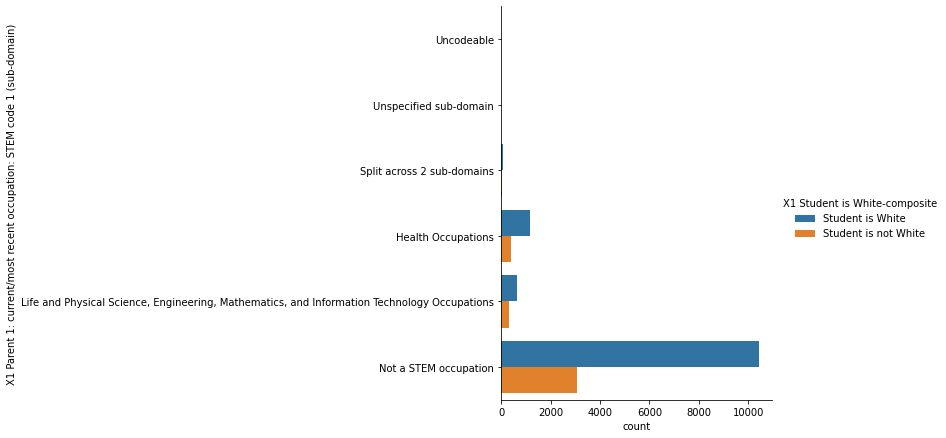

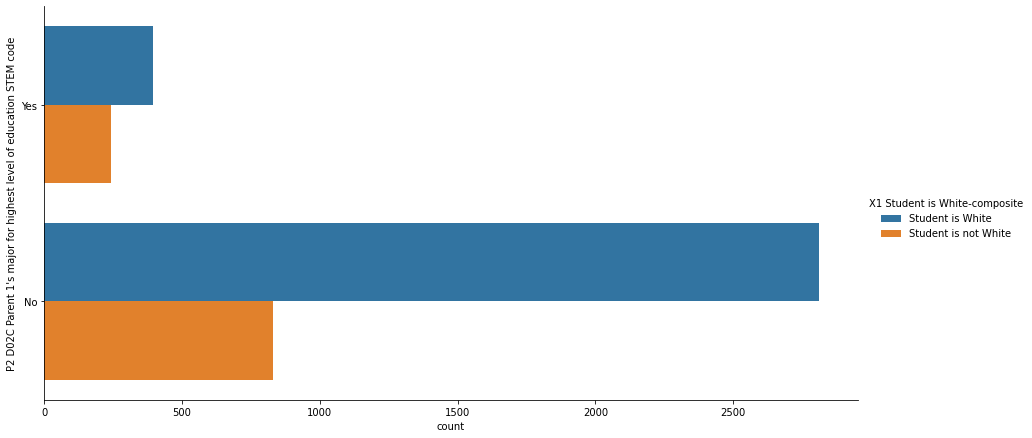

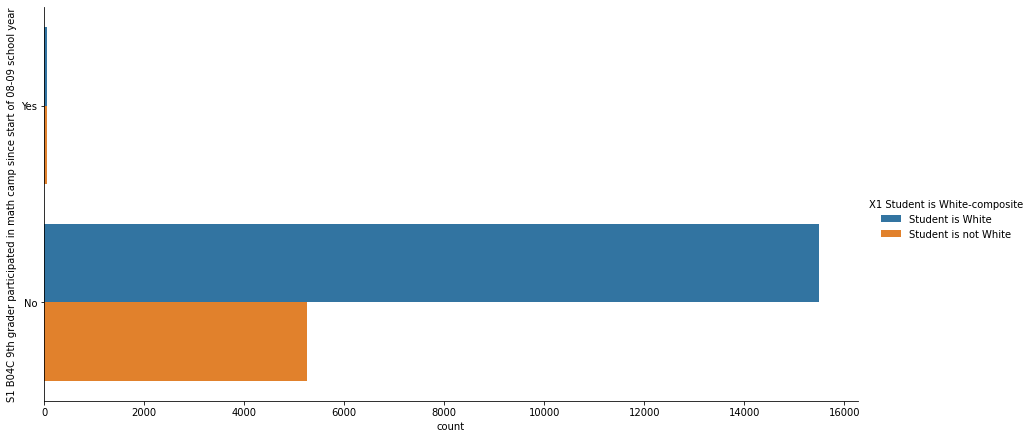

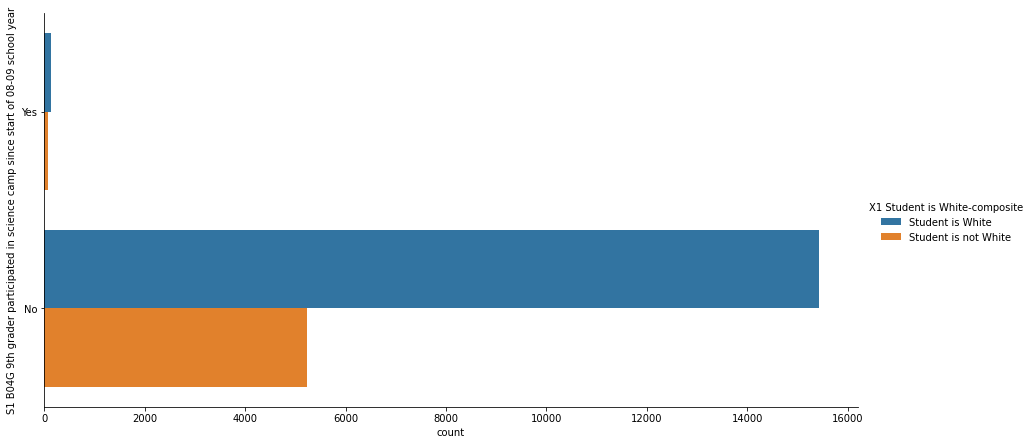

In [18]:
for column in drv:
    sns.catplot(
    y=labels[column],
    hue=labels["X1WHITE"],
    data=cdf,
    kind="count",
    height=6,
    aspect=2,
);

Note:

- The difference between white students vs. other isn't very obvious
- But for some of the variables (the last variable, directly above this comment), we might see some difference if we focused on "yes" 

***Comparison by sex***

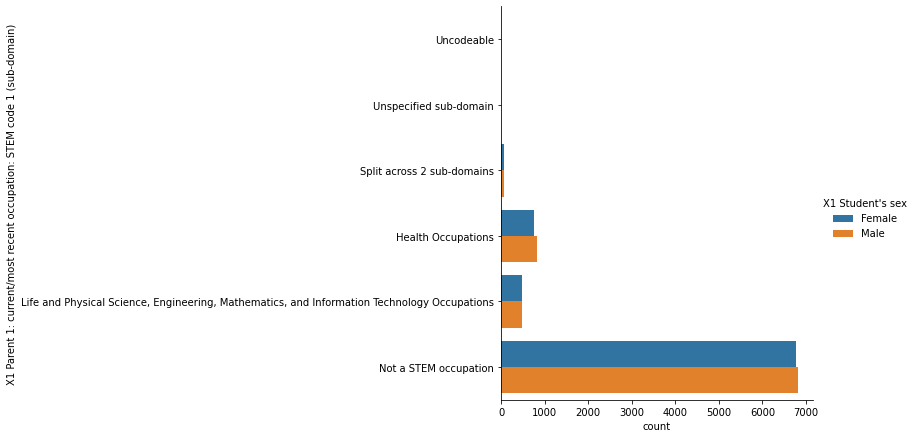

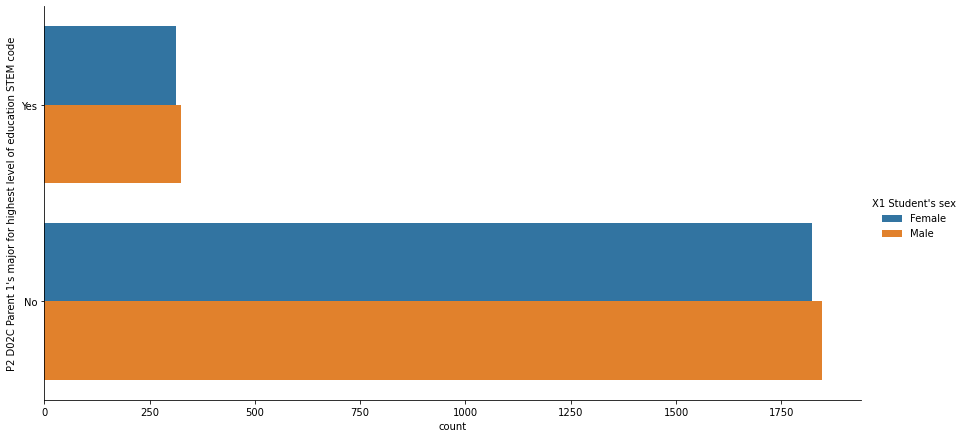

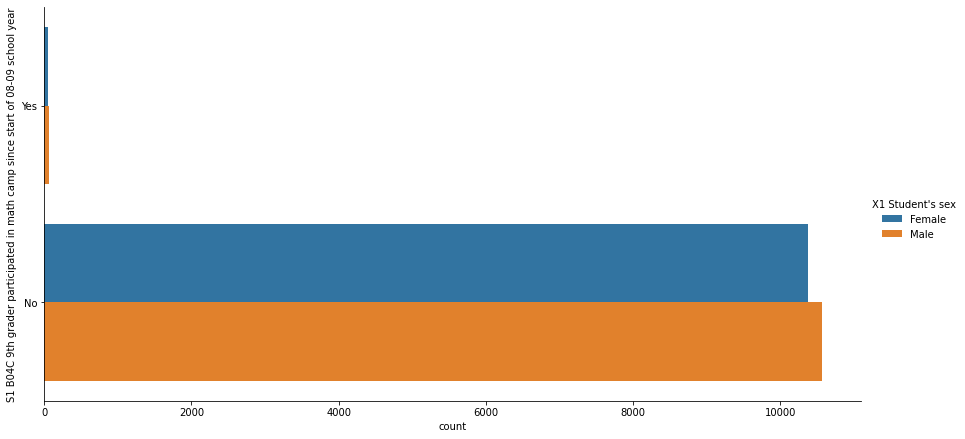

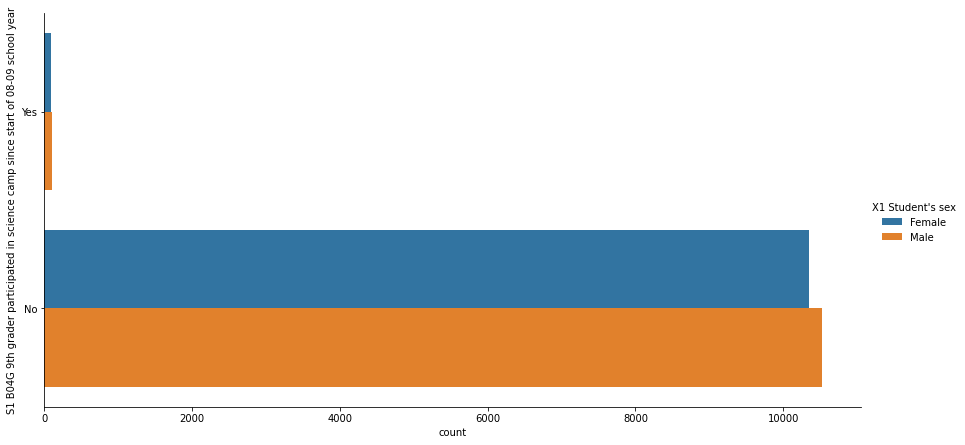

In [19]:
for column in drv:
    sns.catplot(
    y=labels[column],
    hue=labels["X1SEX"],
    data=cdf,
    kind="count",
    height=6,
    aspect=2,
);

Note:

- There doesn't seem to be a big difference by sex in these variables

***Comparison by SES***

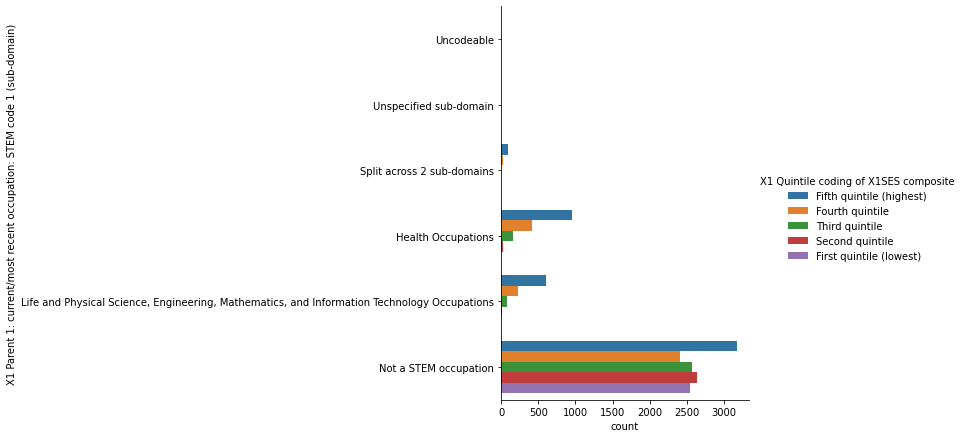

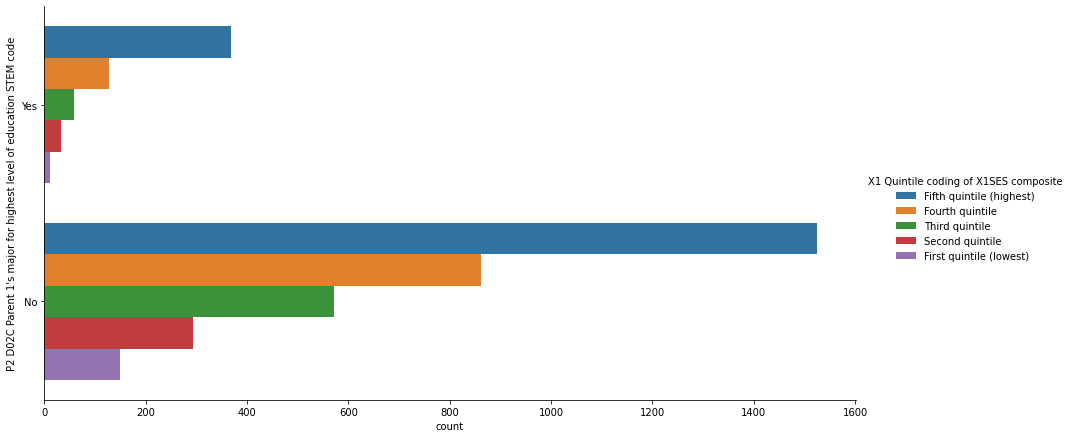

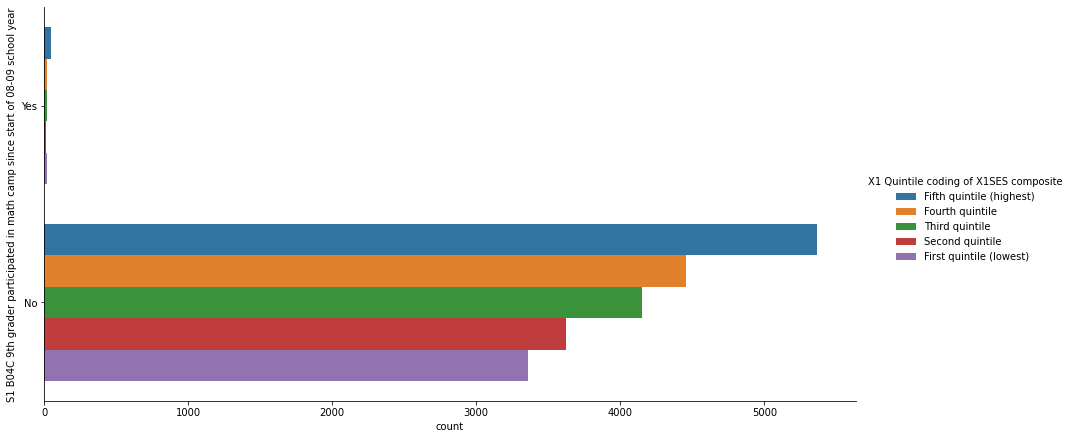

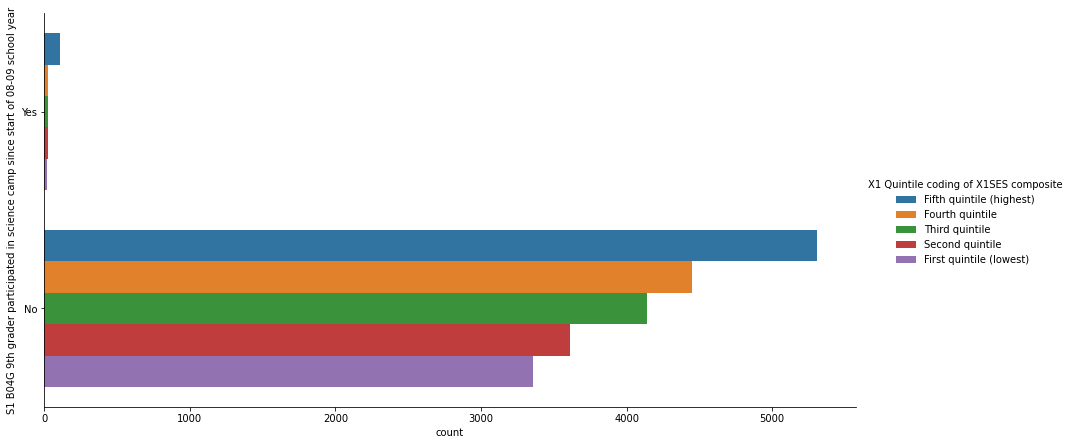

In [20]:
for column in drv:
    sns.catplot(
    y=labels[column],
    hue=labels["X1SESQ5"],
    data=cdf,
    kind="count",
    height=6,
    aspect=2,
);

Note:

- There are more students with higher SES whose parents' major in college was in STEM or who participated in a science camp

## 2. Potential outcome variables (students' aspiration, interest, choice in major)

In [21]:
# These are the variables of interest

pov_data = """X1TXMQUINT, X2TXMQUINT, S1MPERSON1, S1MPERSON2, S1SPERSON1, S1SPERSON2, S2MPERSON1, S2MPERSON2, S2SPERSON1, S2SPERSON2, X2STU30OCC_STEM1, S3FIELD_STEM, S3FIELD2, S4FIELD2, X4ENTMJST, X4ENTRYMAJ23, X4OCCFB2, X4OCCFBSTEM1, X4OCC30STEM1, S4MPERSON1, S4MPERSON2, S4SPERSON1, S4SPERSON2"""
pov = [c.strip() for c in pov_data.split(",")]

***Comparison by race***

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


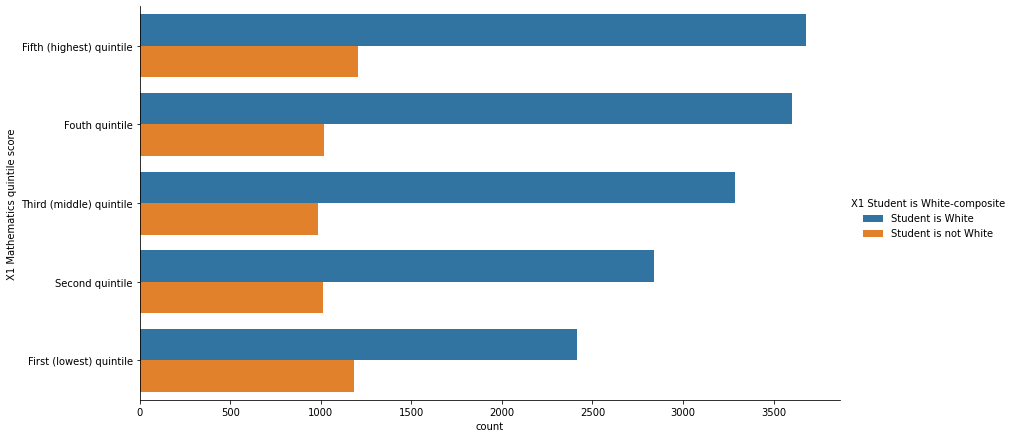

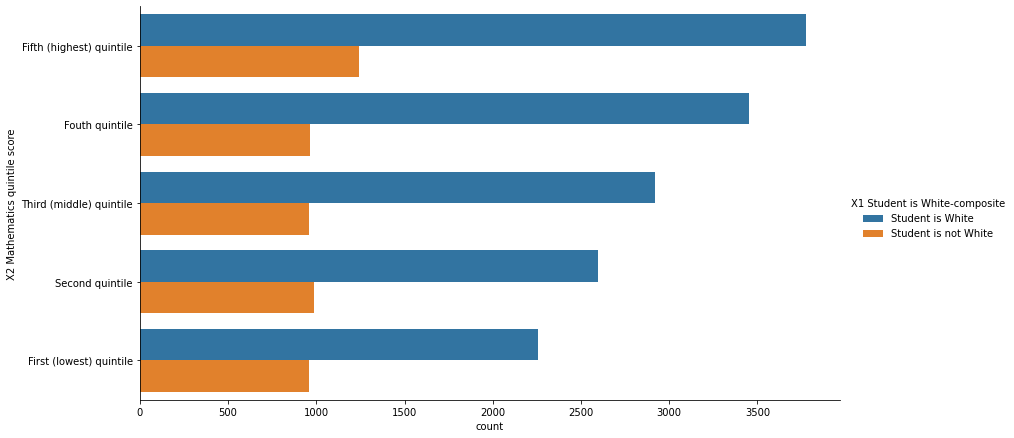

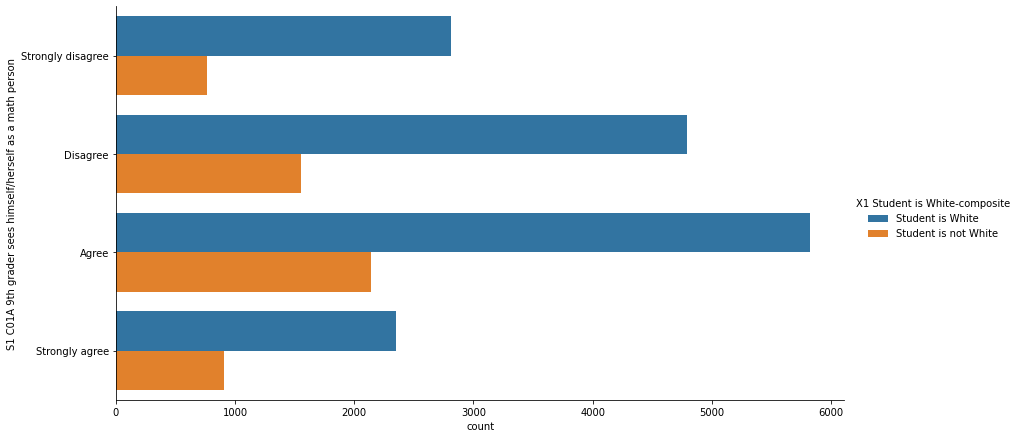

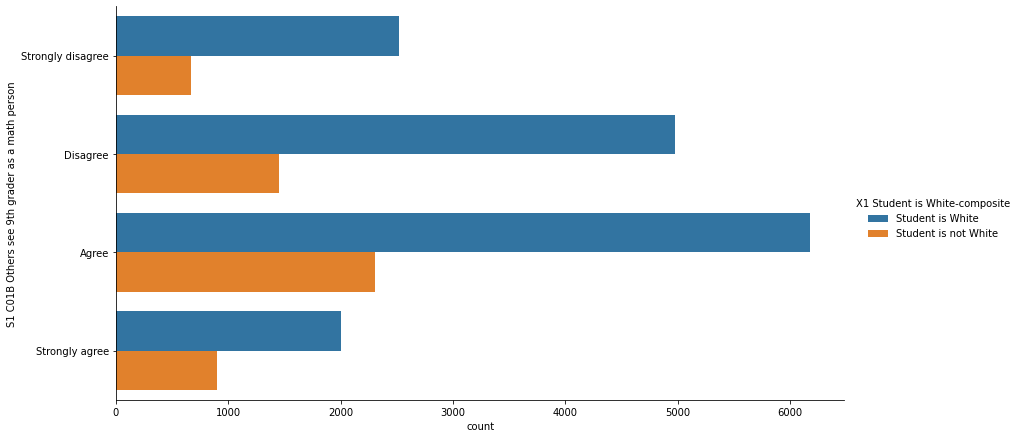

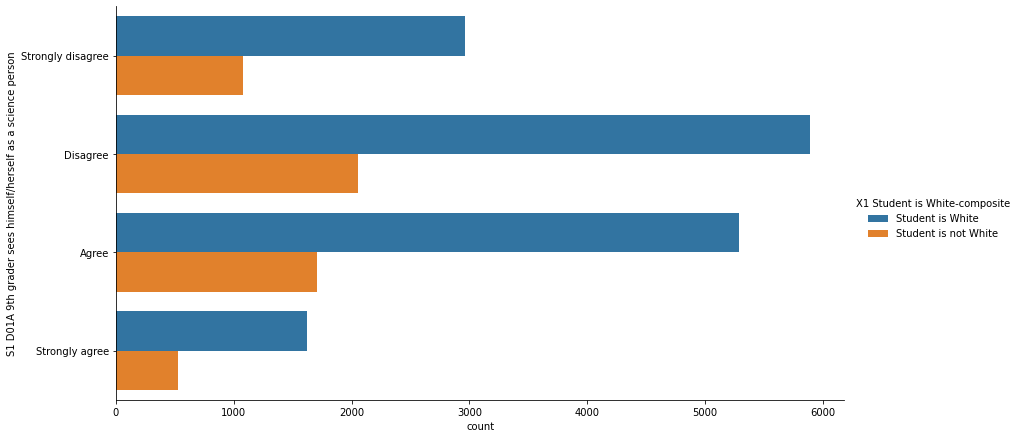

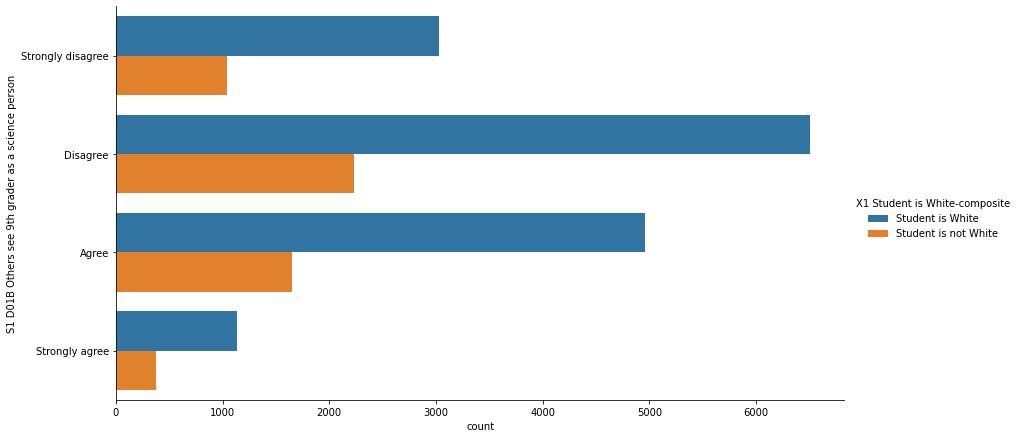

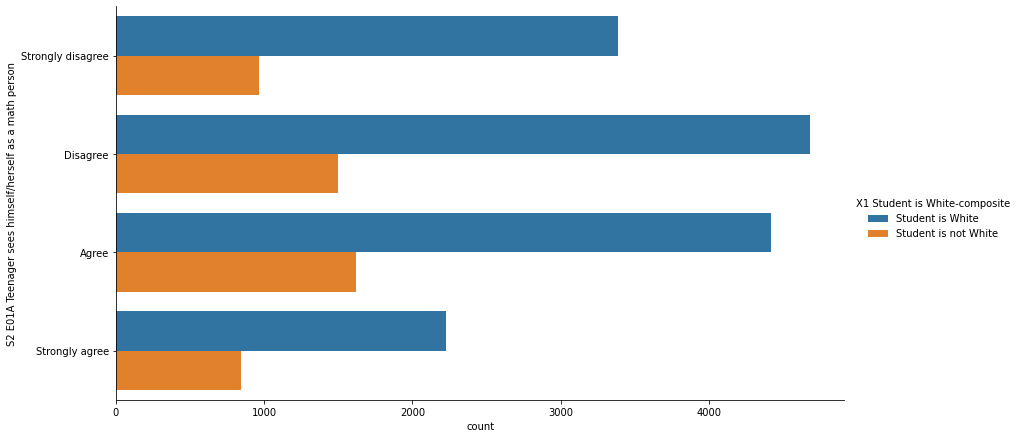

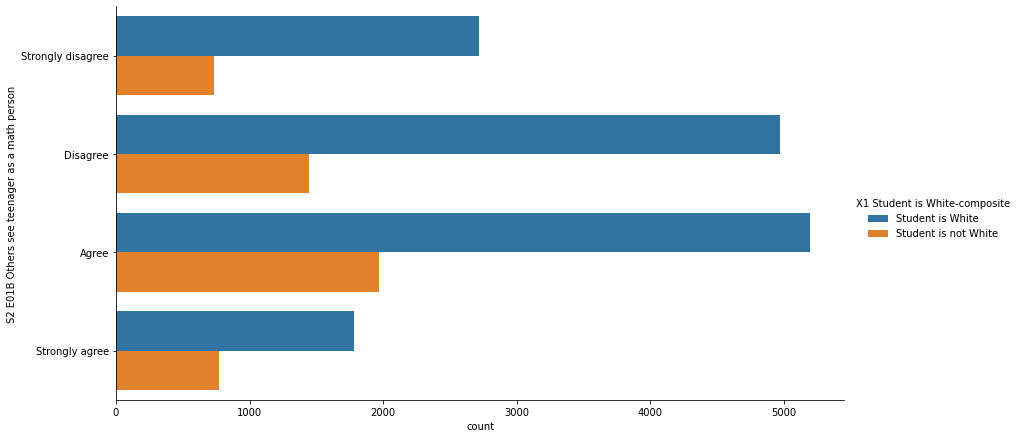

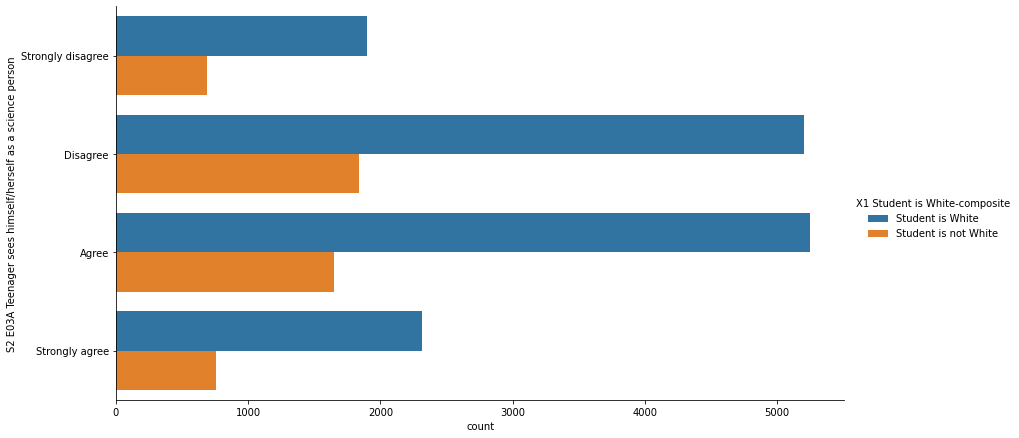

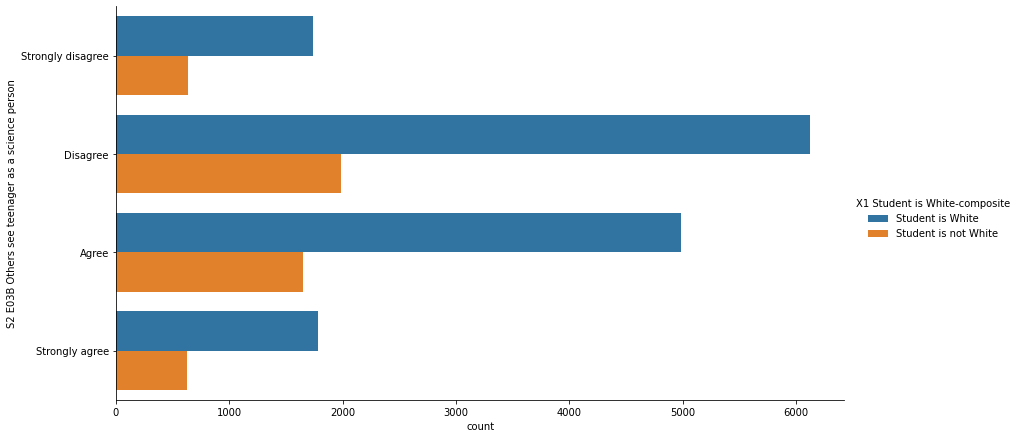

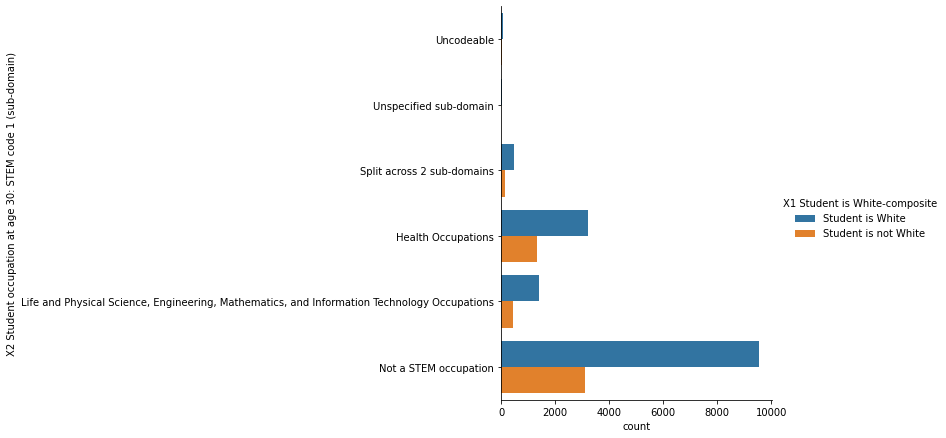

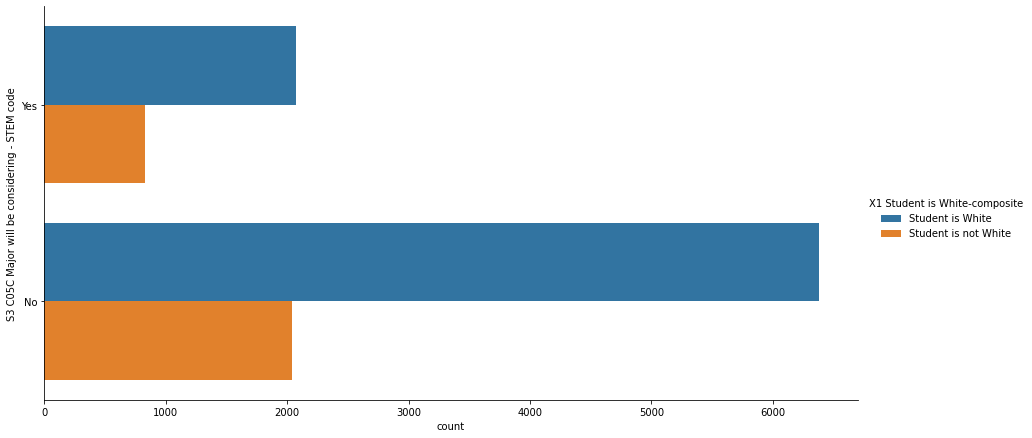

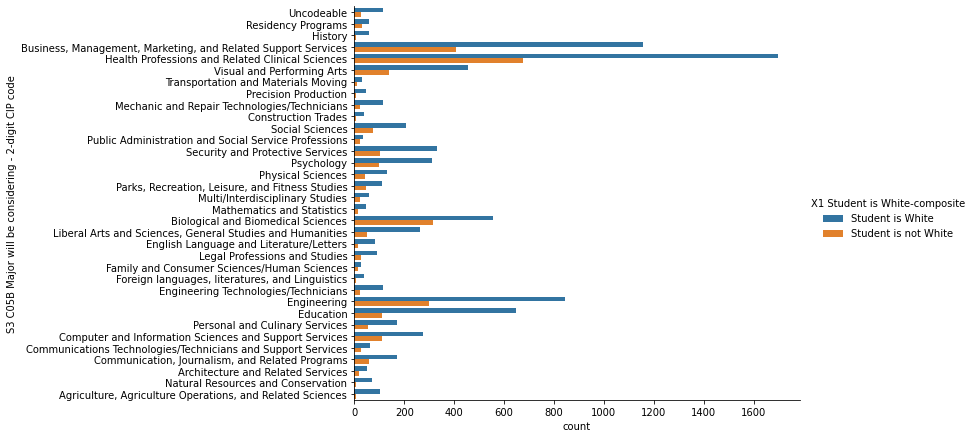

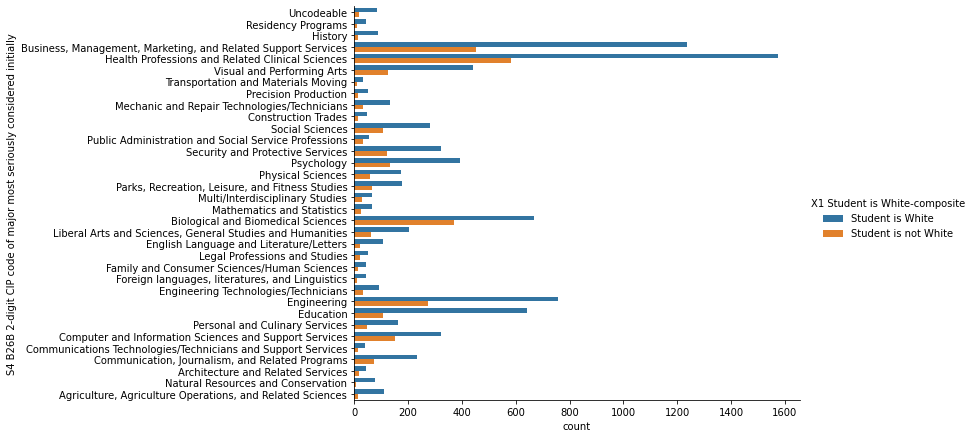

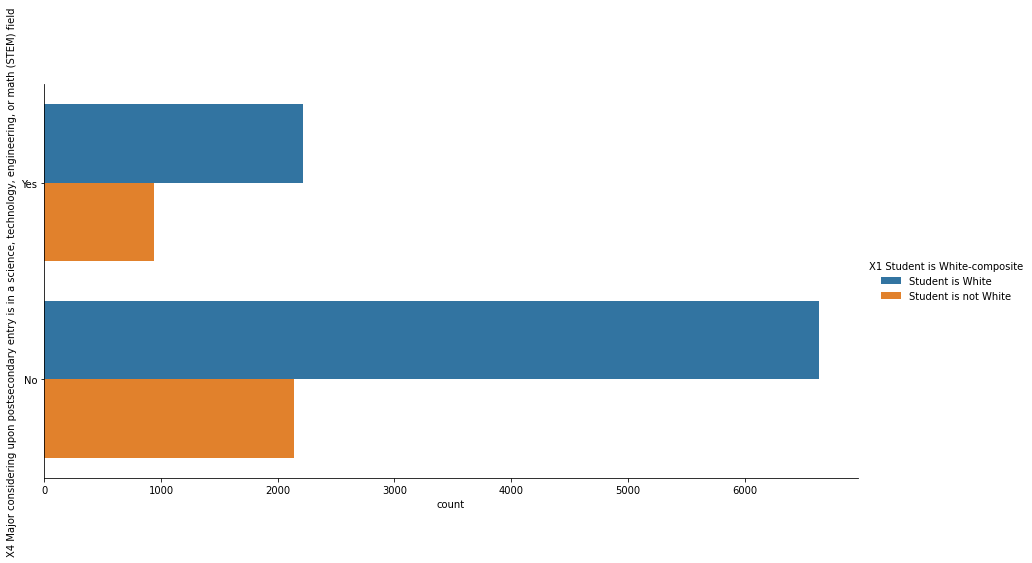

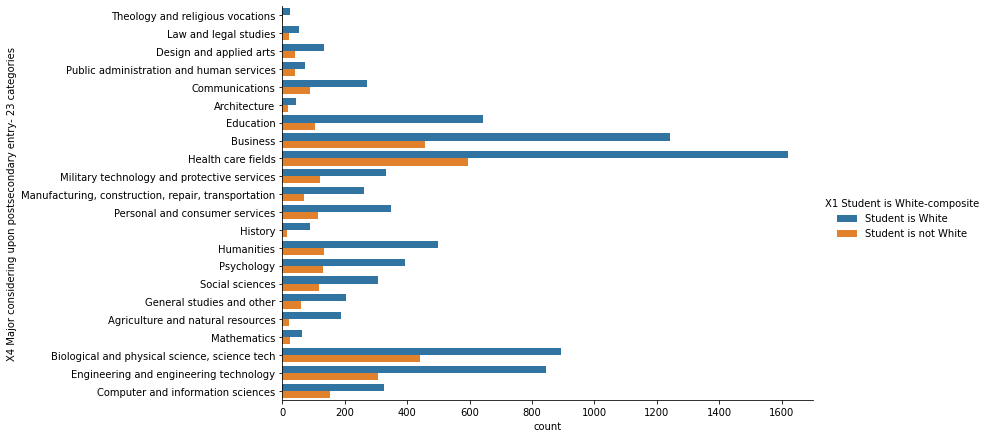

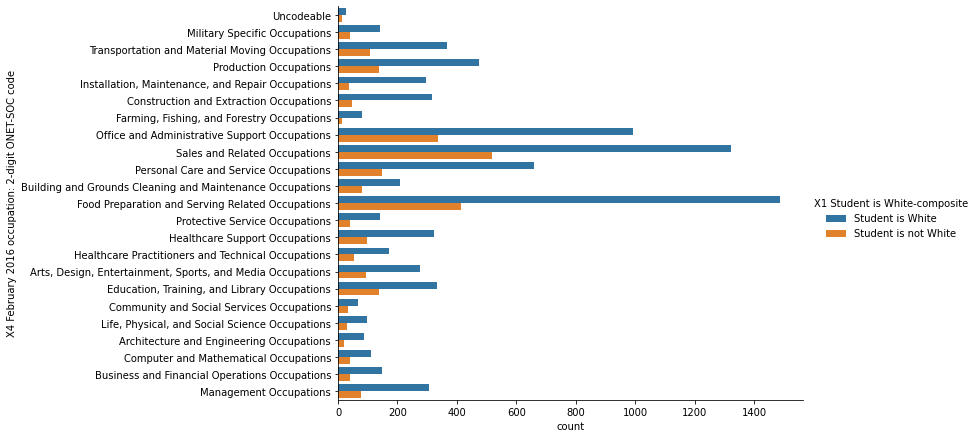

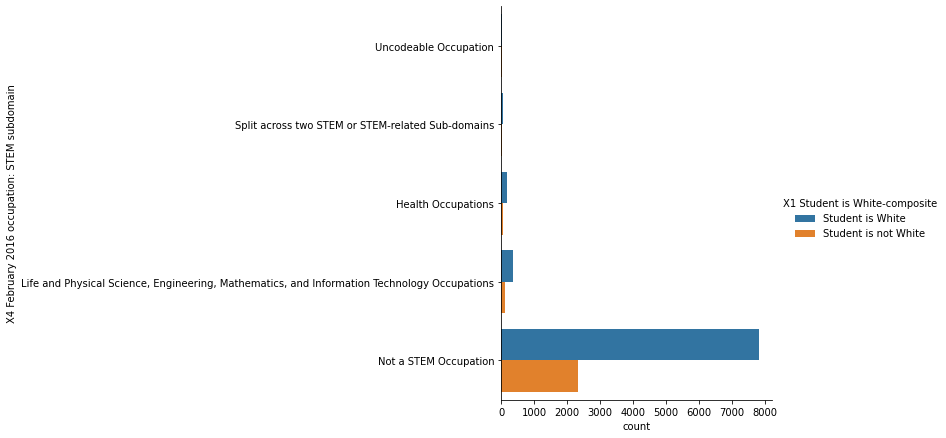

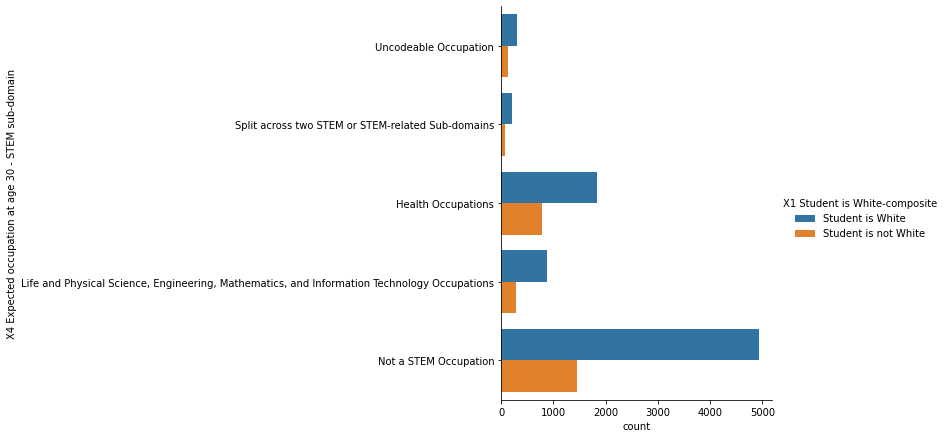

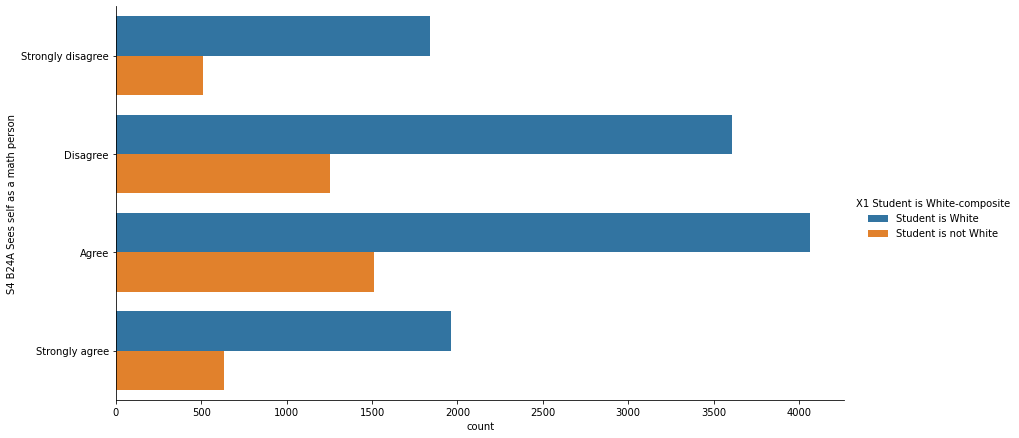

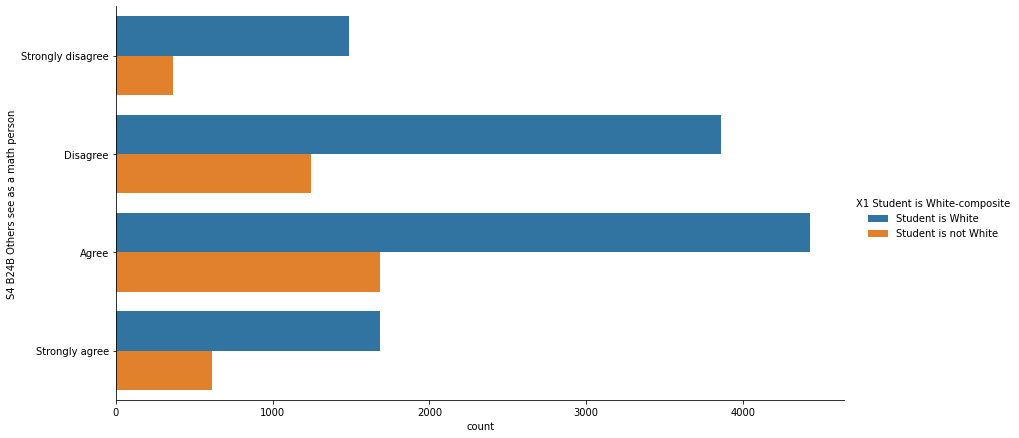

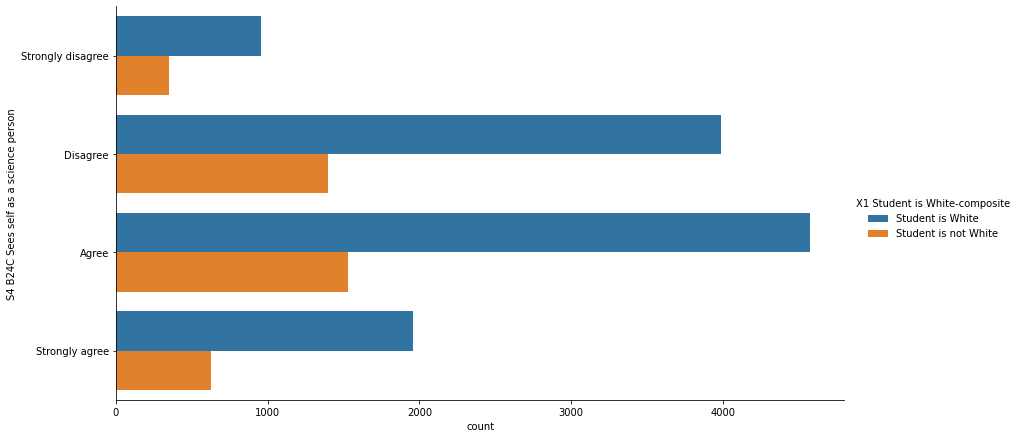

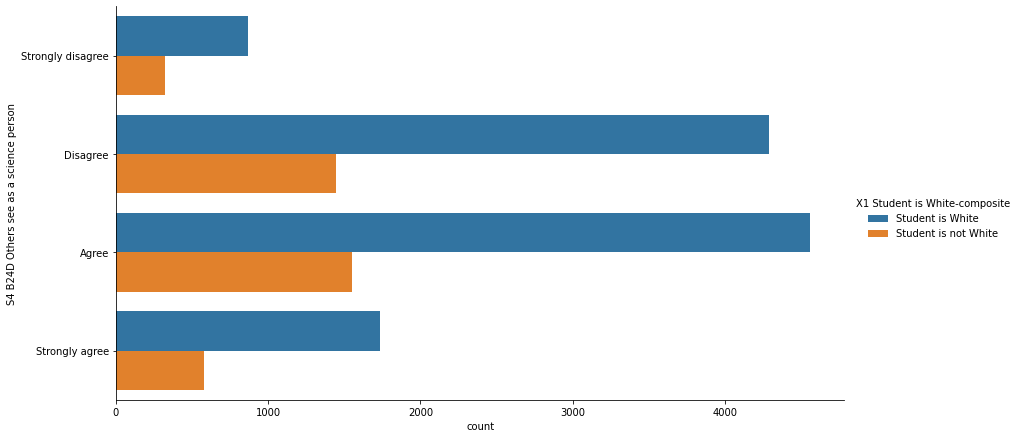

In [22]:
for column in pov:
    sns.catplot(
    y=labels[column],
    hue=labels["X1WHITE"],
    data=cdf,
    kind="count",
    height=6,
    aspect=2,
);

Note:

- Again, race doesn't seem to make a big difference
- It might make more sense to plot the % of responses within each race group

**Comparison by sex**

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


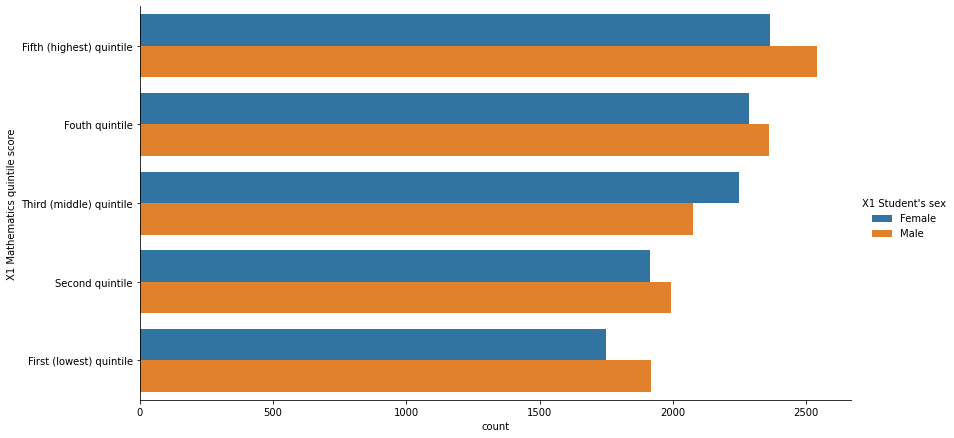

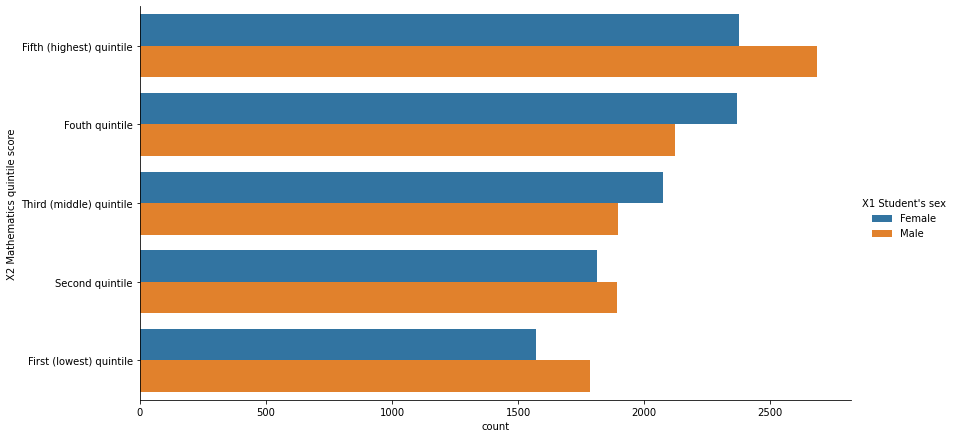

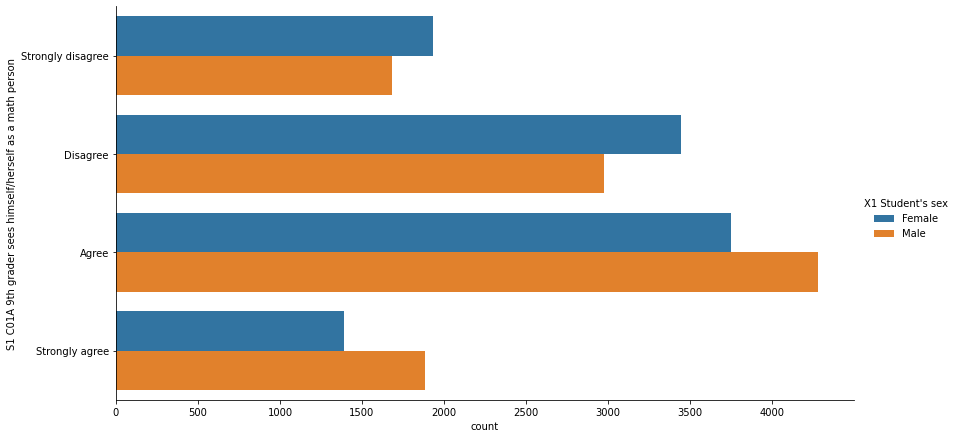

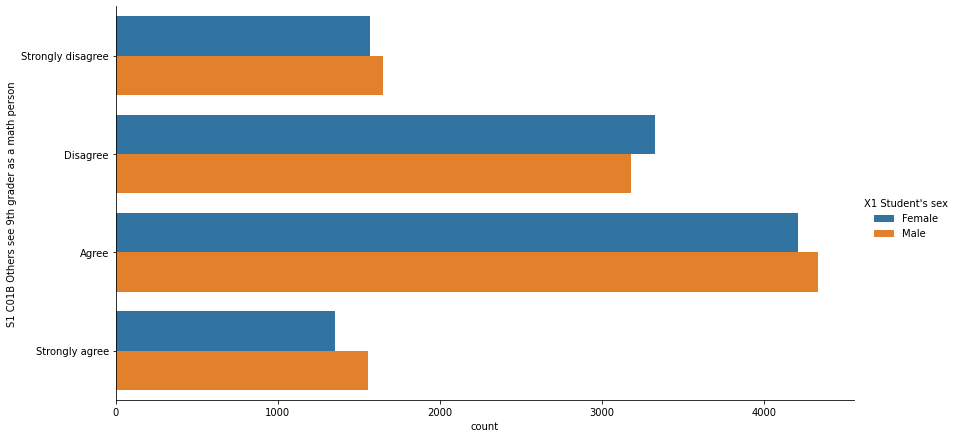

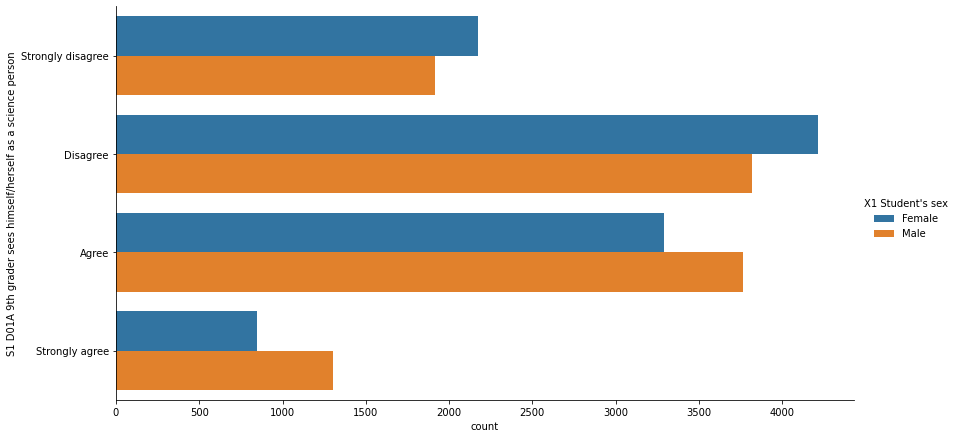

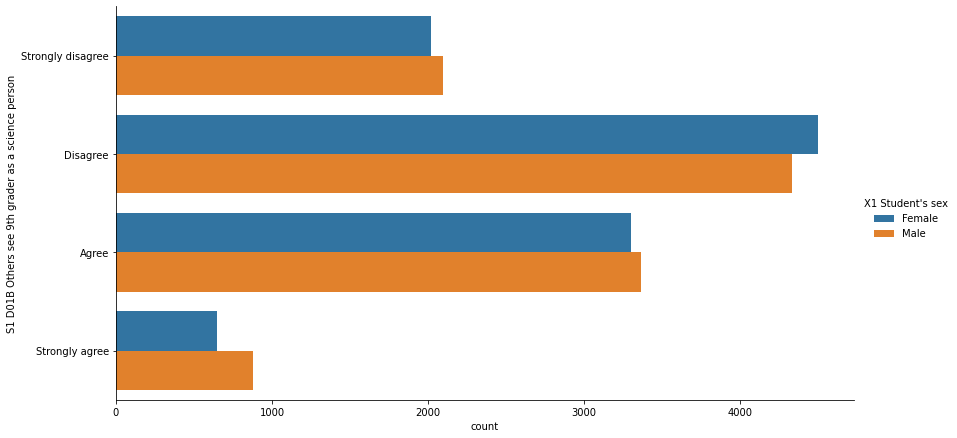

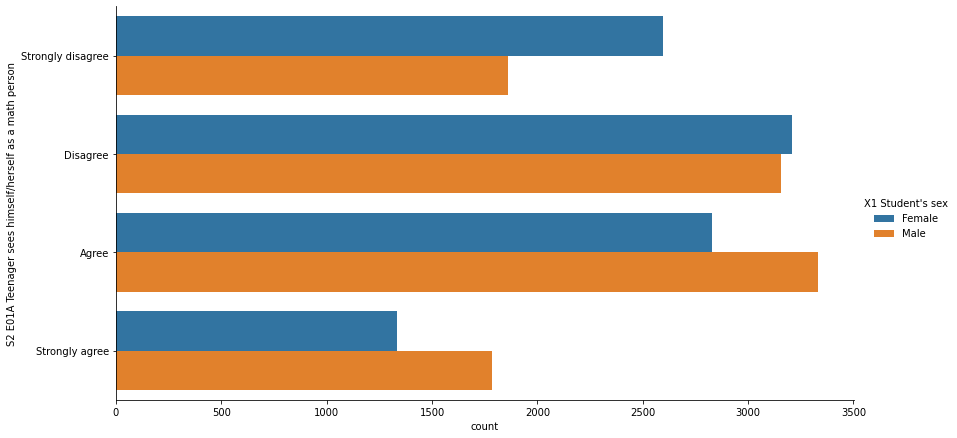

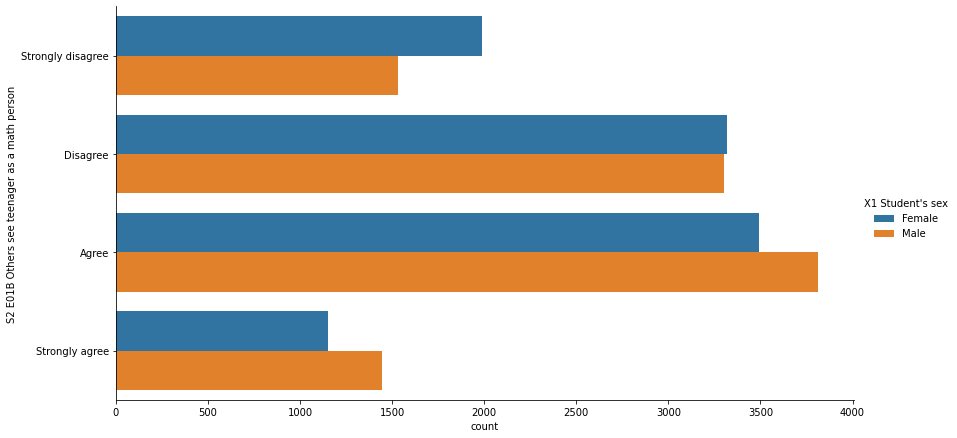

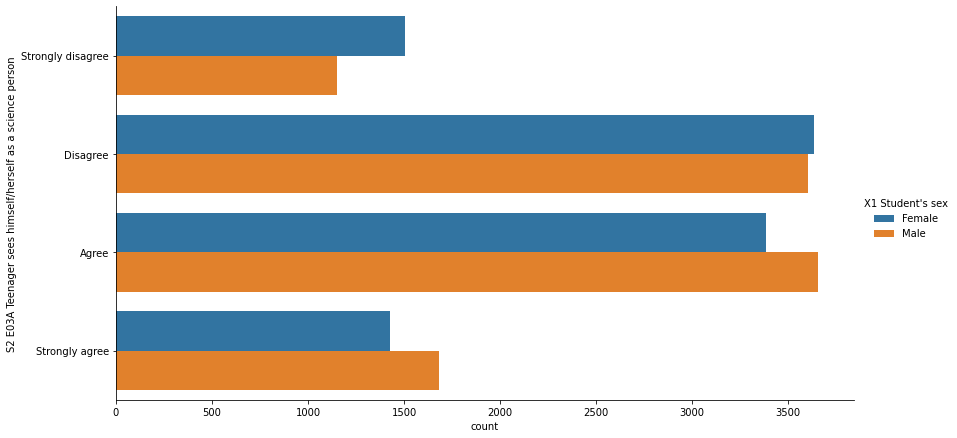

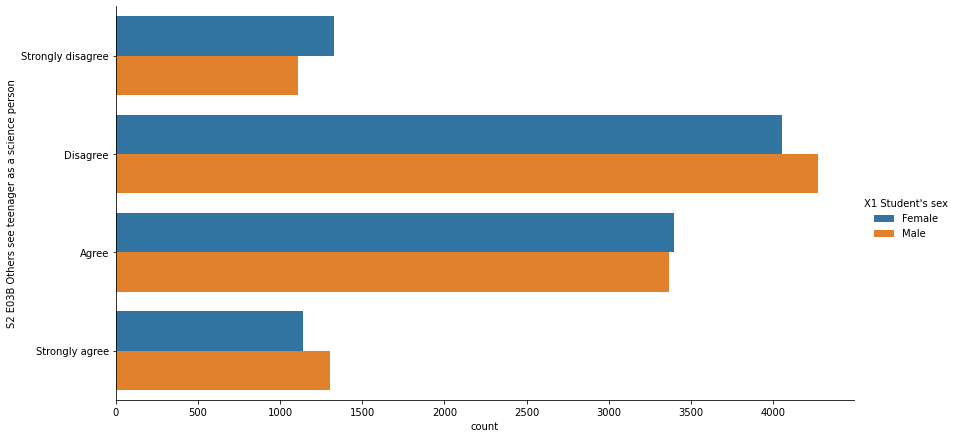

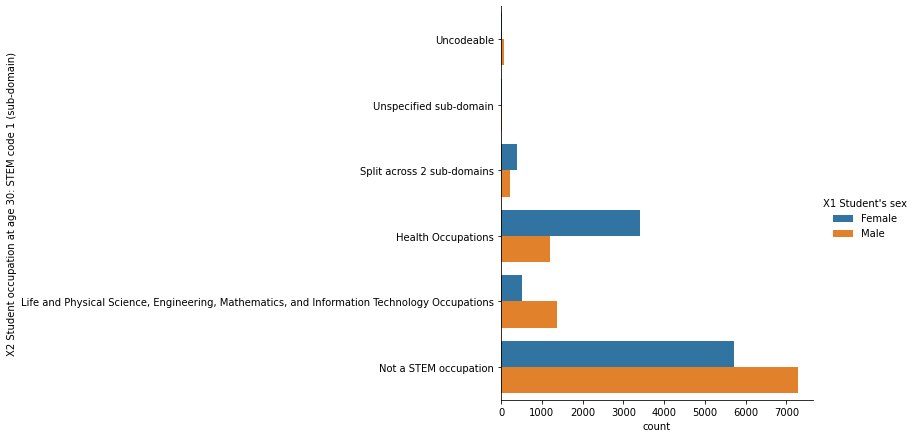

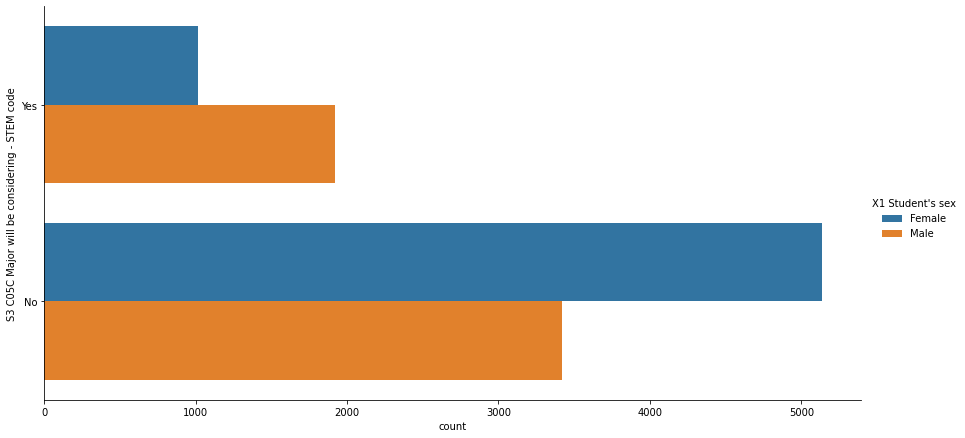

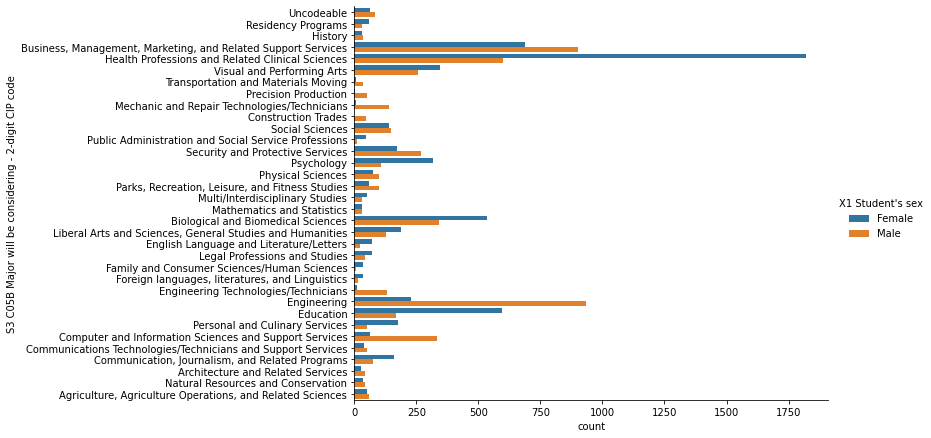

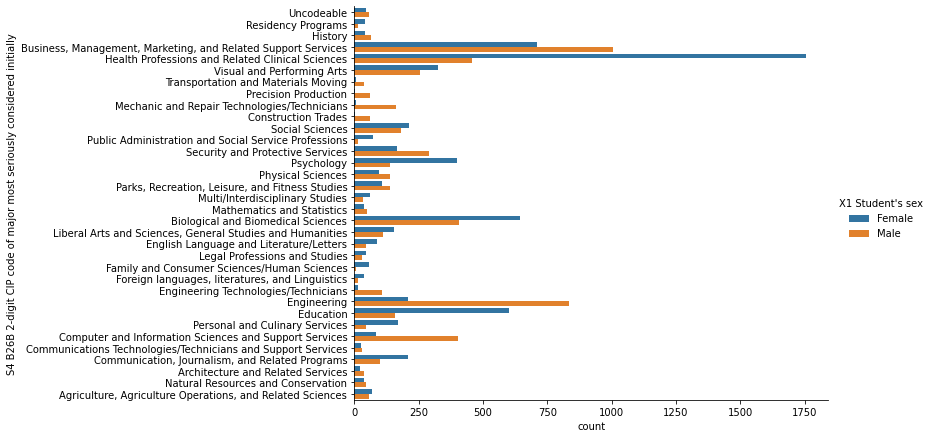

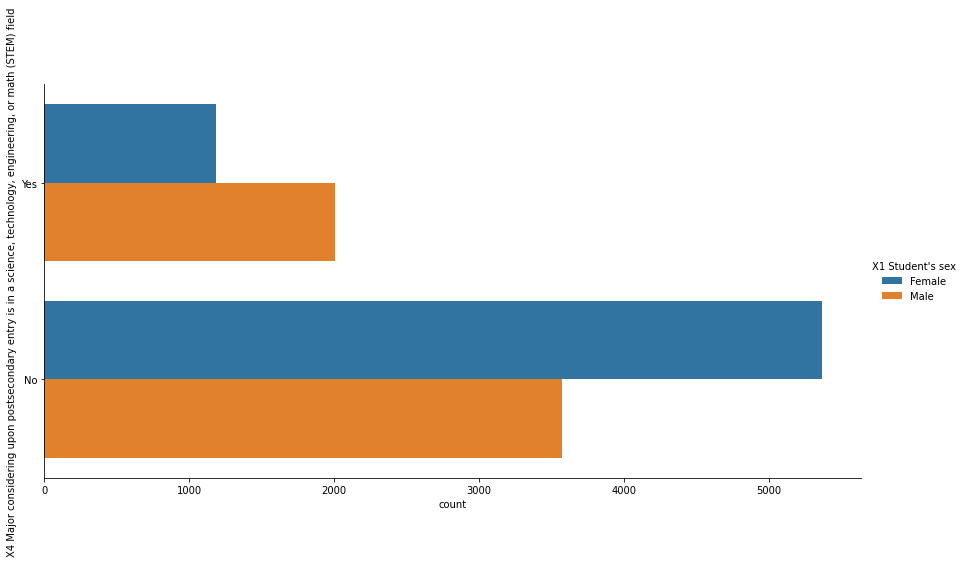

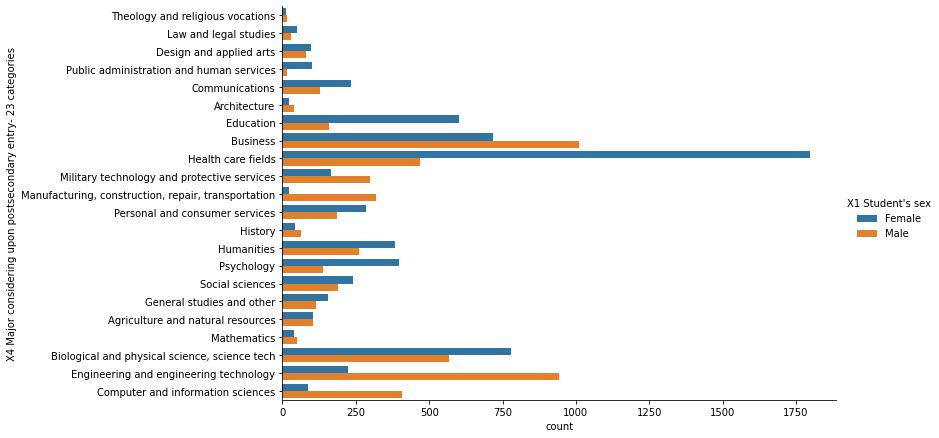

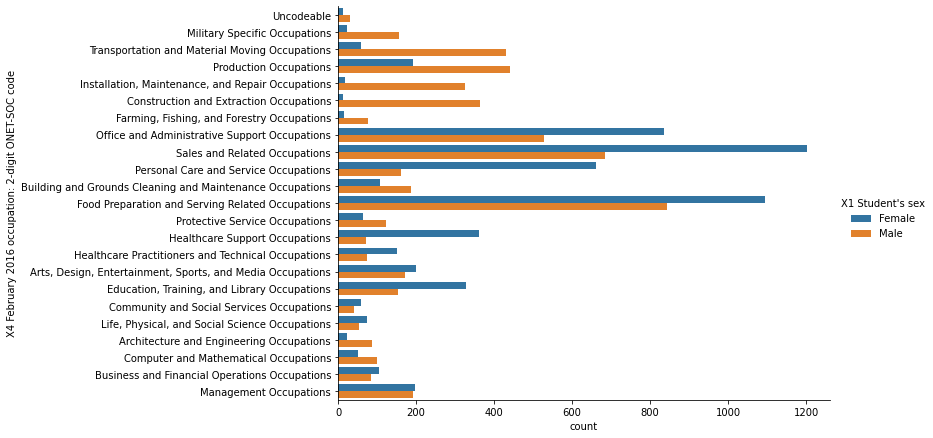

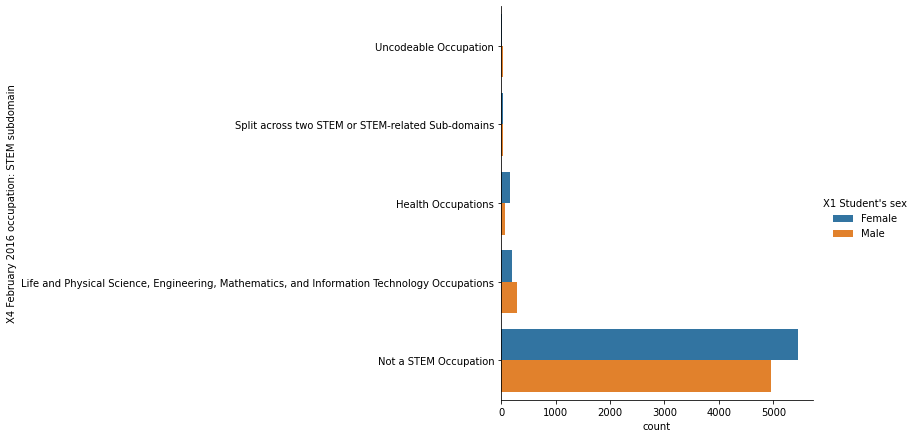

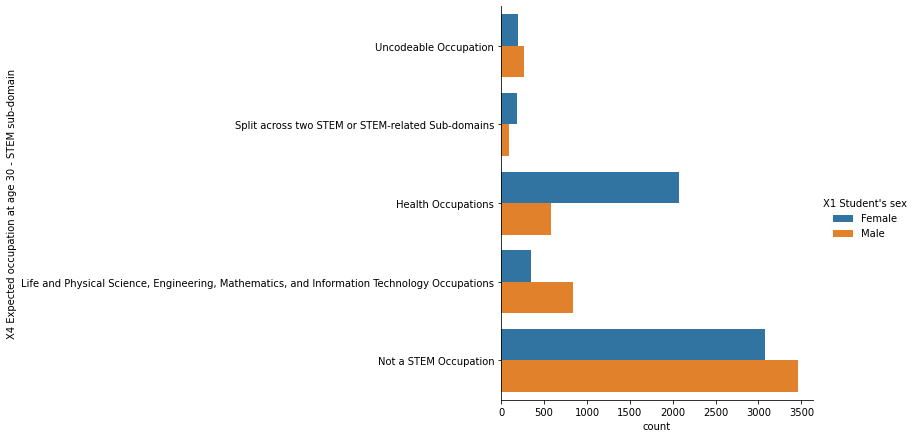

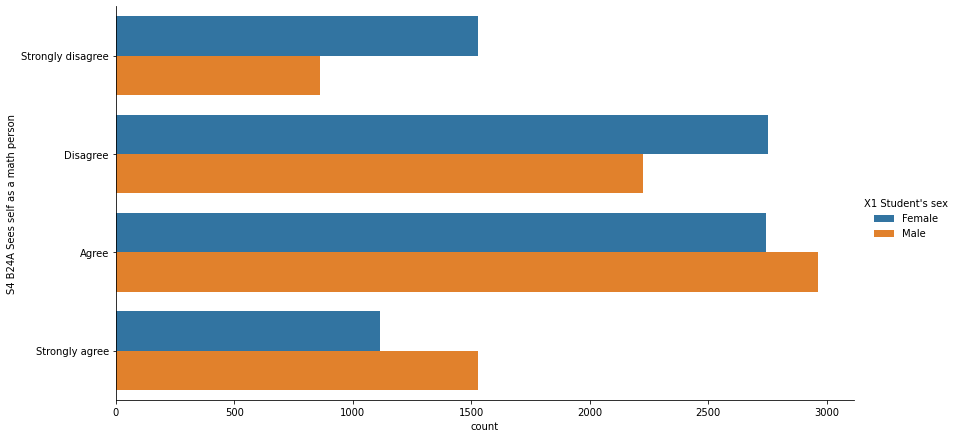

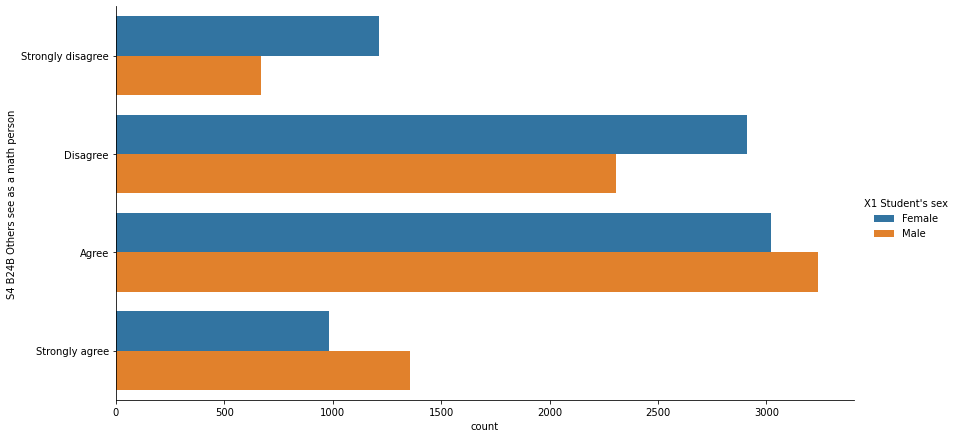

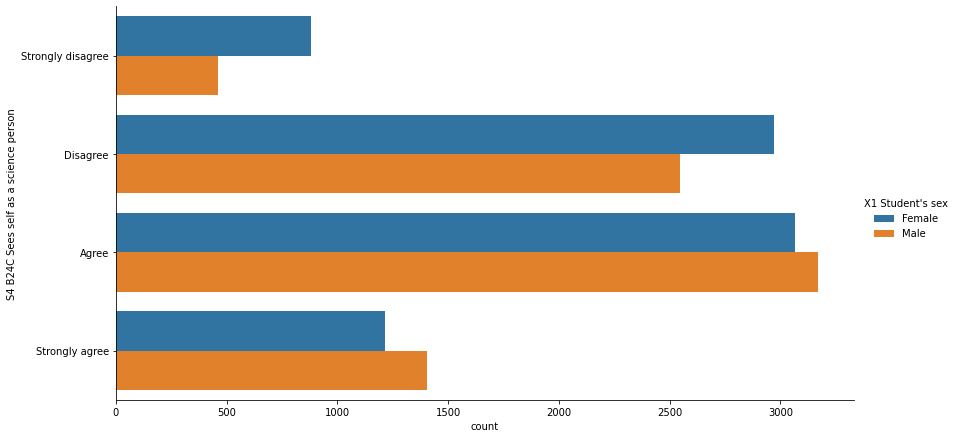

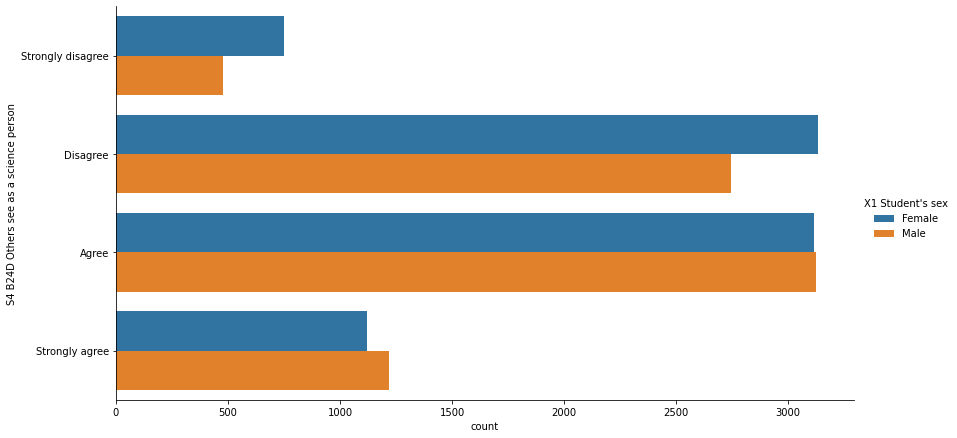

In [23]:
for column in pov:
    sns.catplot(
    y=labels[column],
    hue=labels["X1SEX"],
    data=cdf,
    kind="count",
    height=6,
    aspect=2,
);

Note:

- Boys seem to choose engineering more than girls do
- Girls seem to choose health professions and biology more than boys do

**Comparison by SES**

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


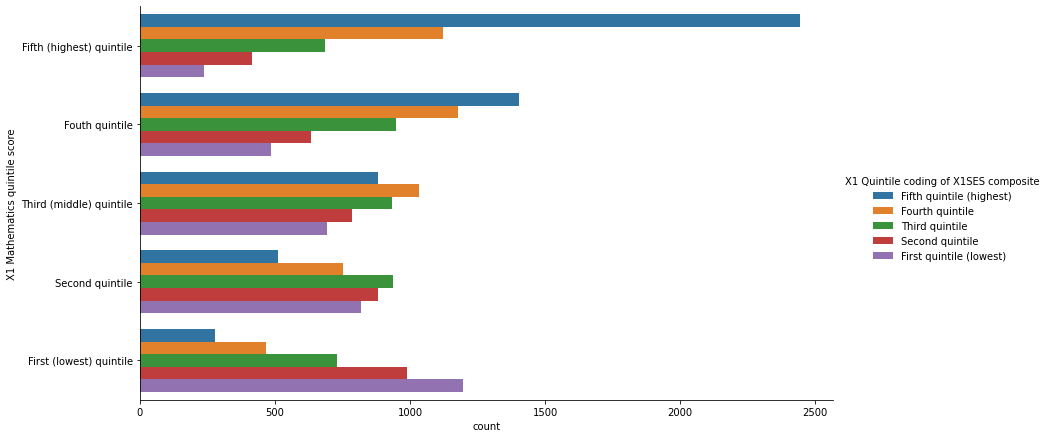

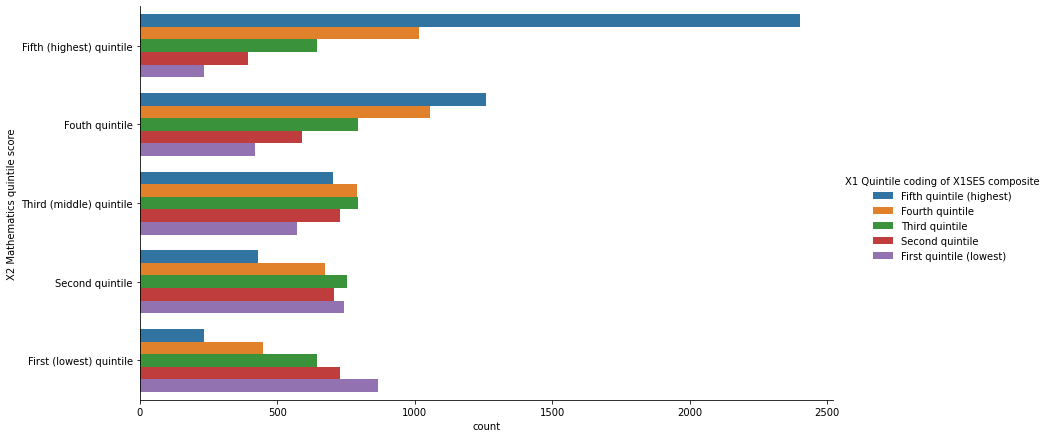

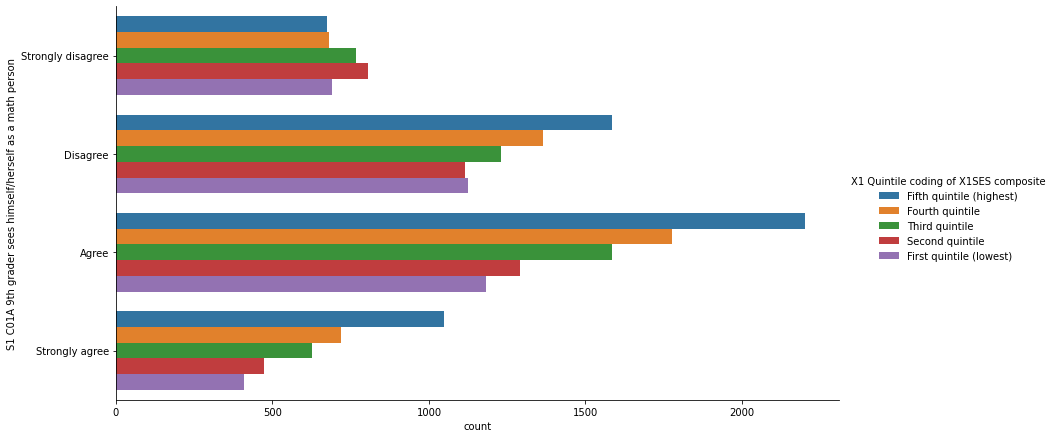

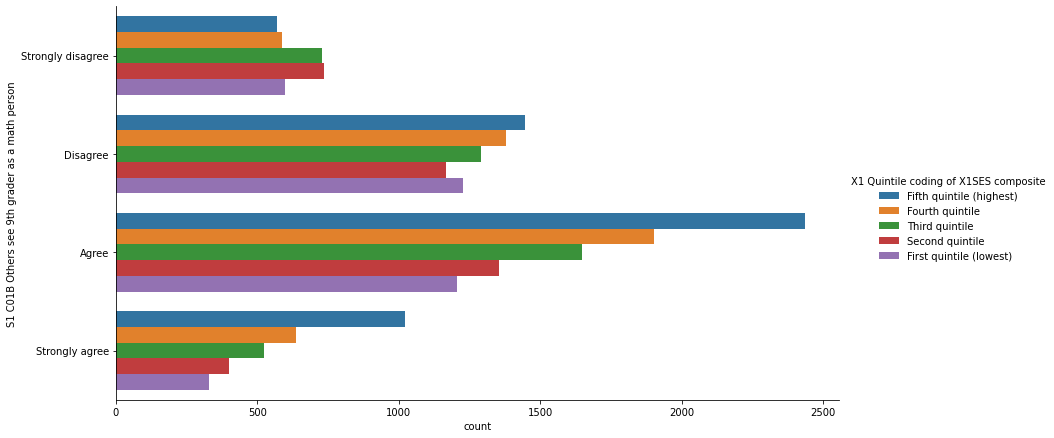

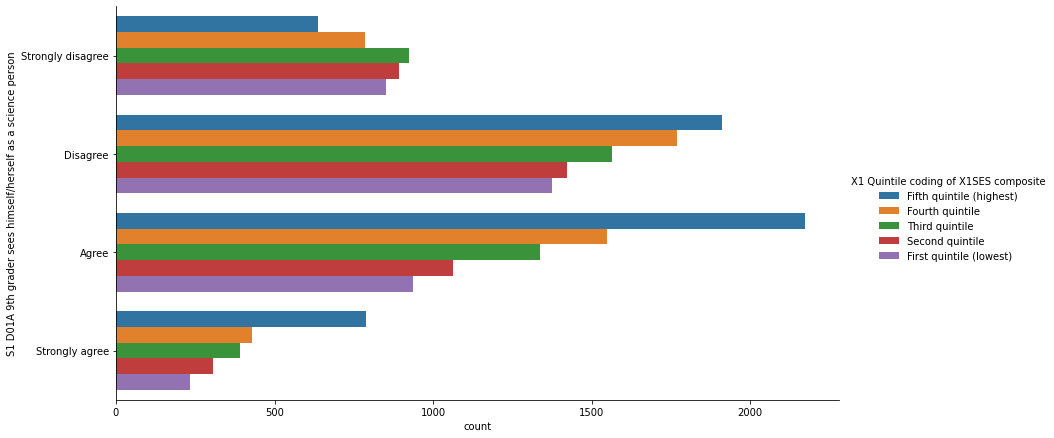

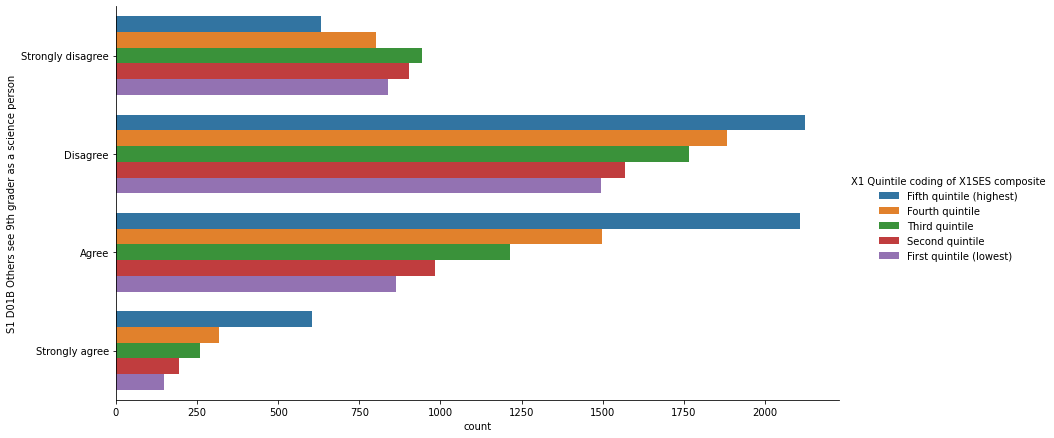

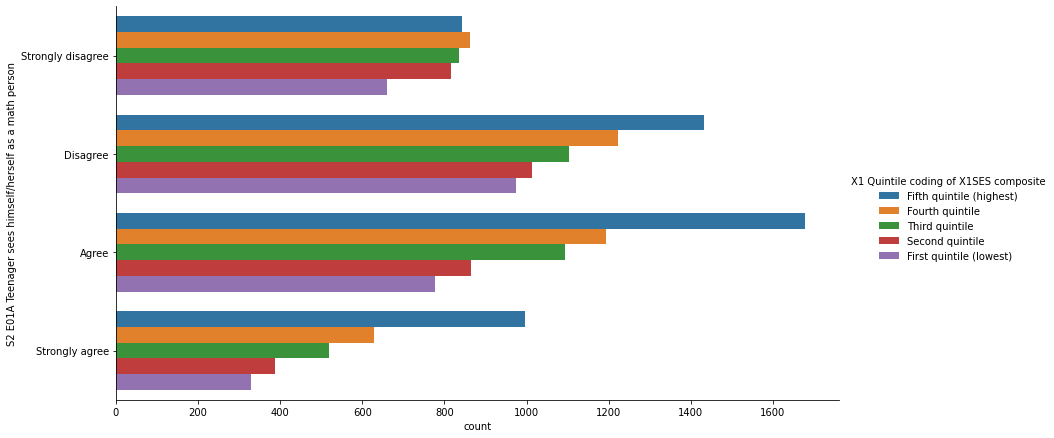

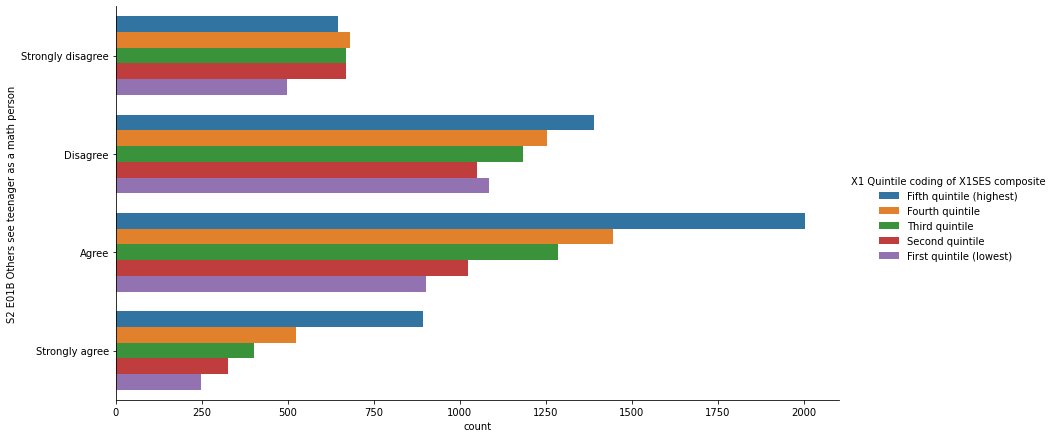

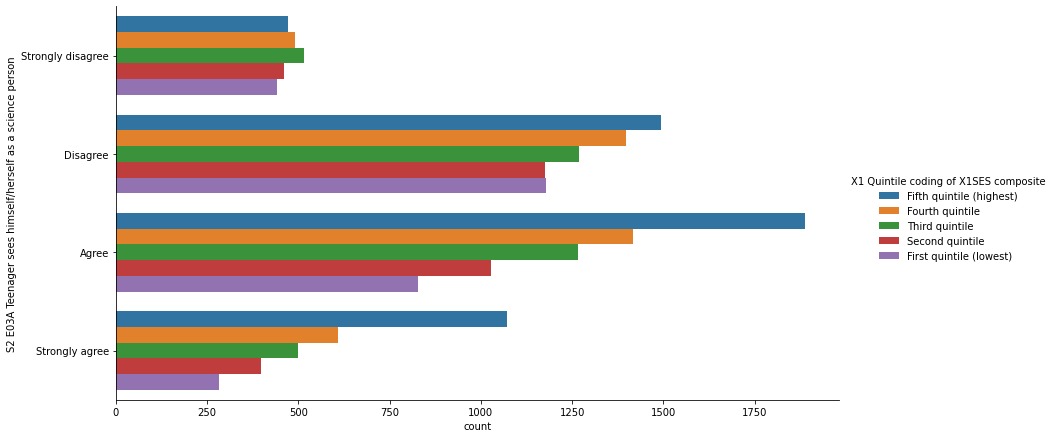

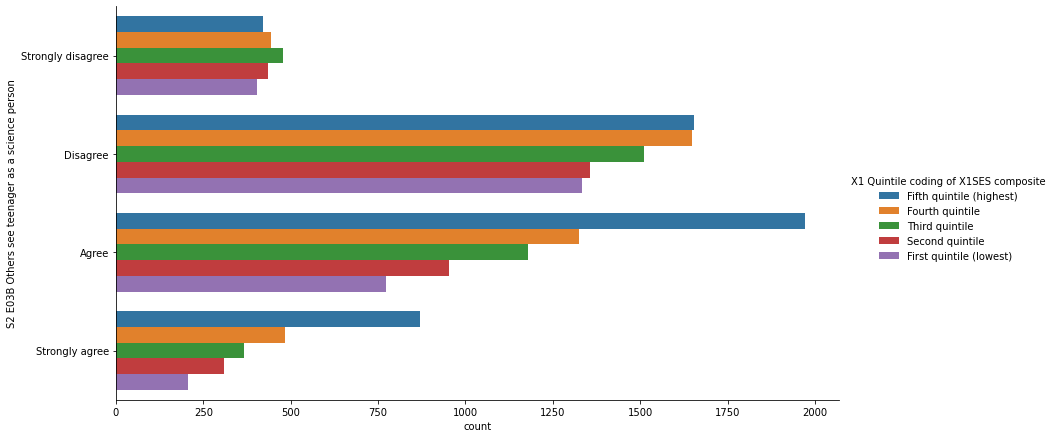

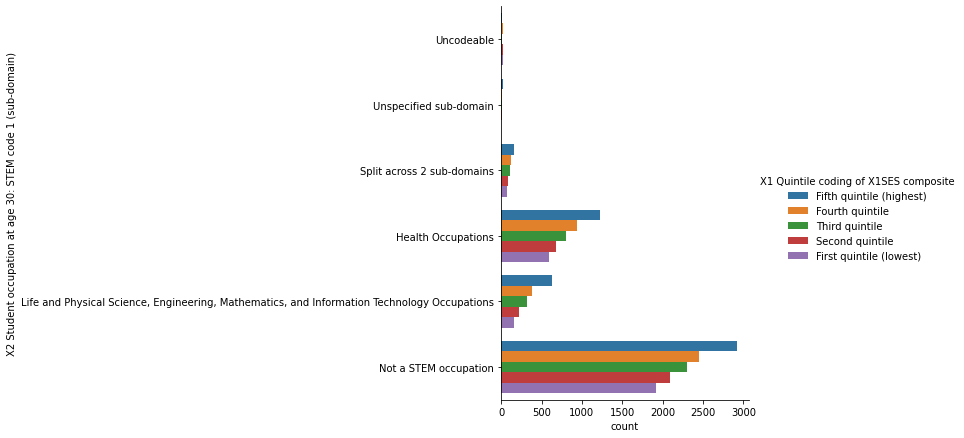

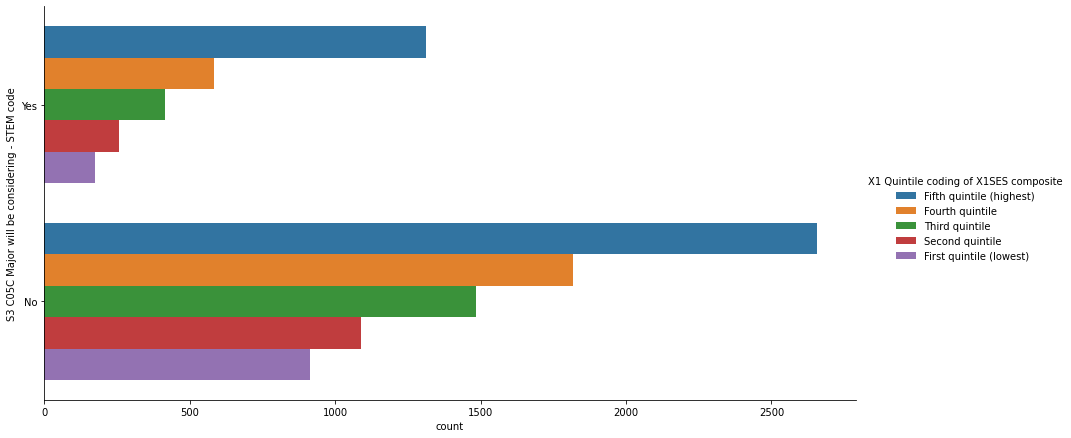

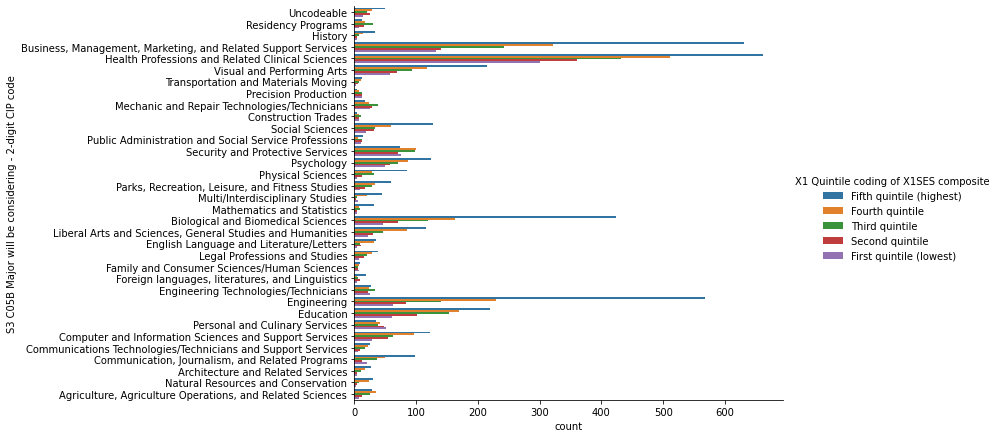

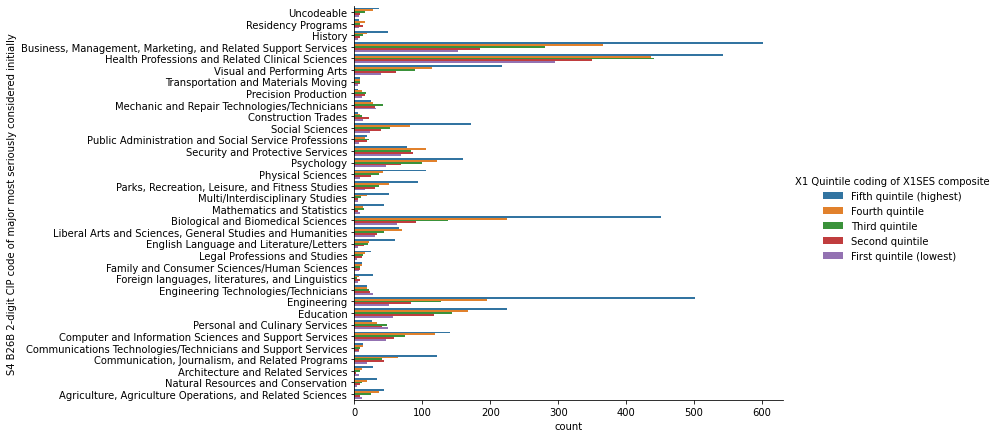

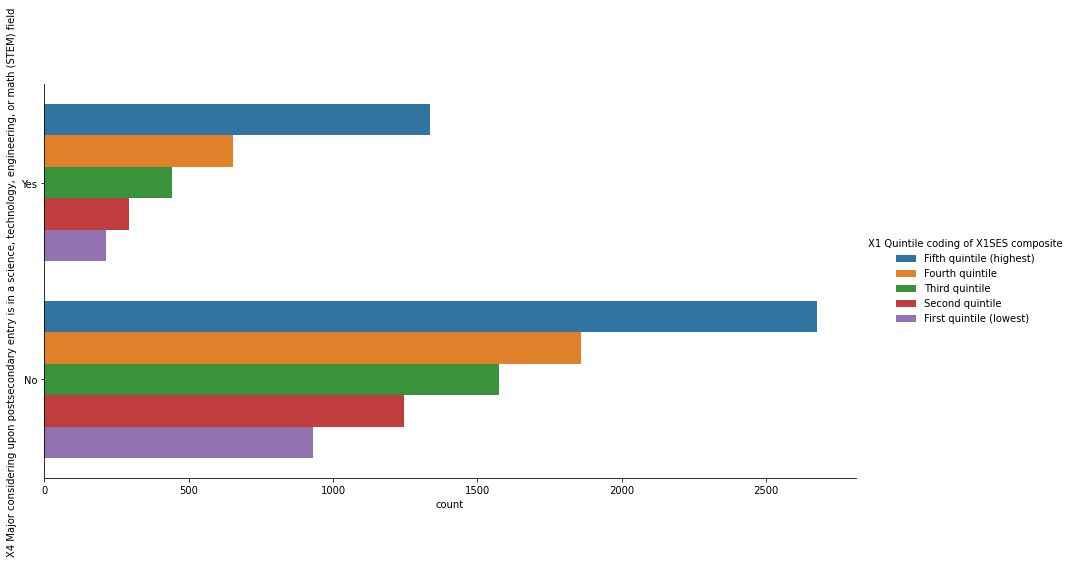

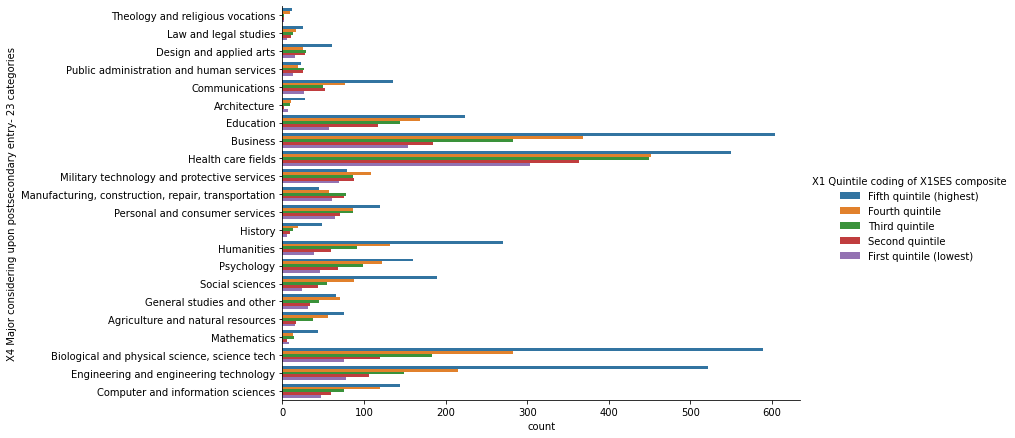

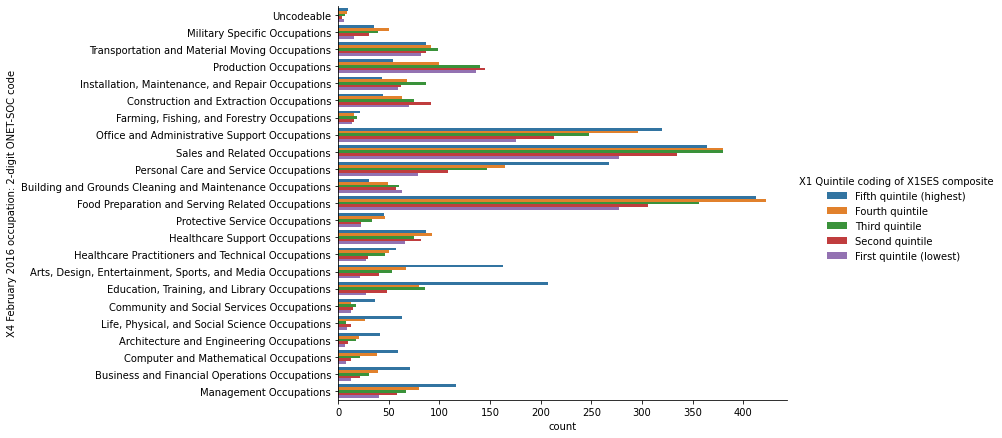

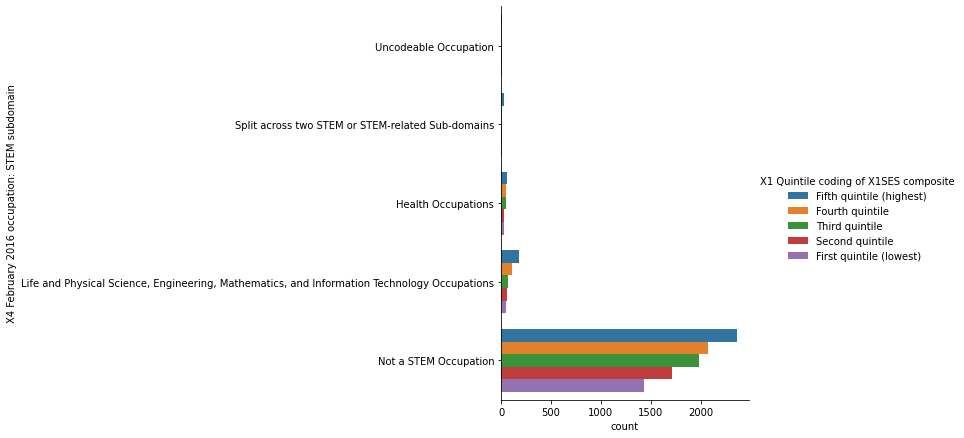

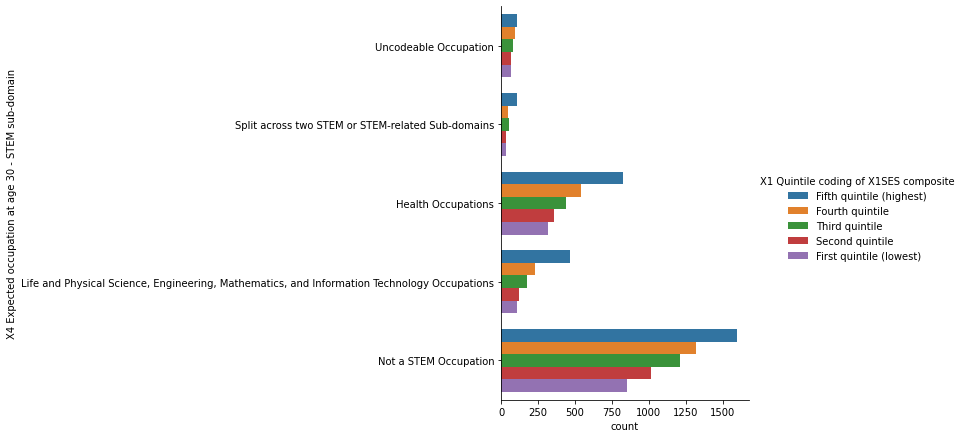

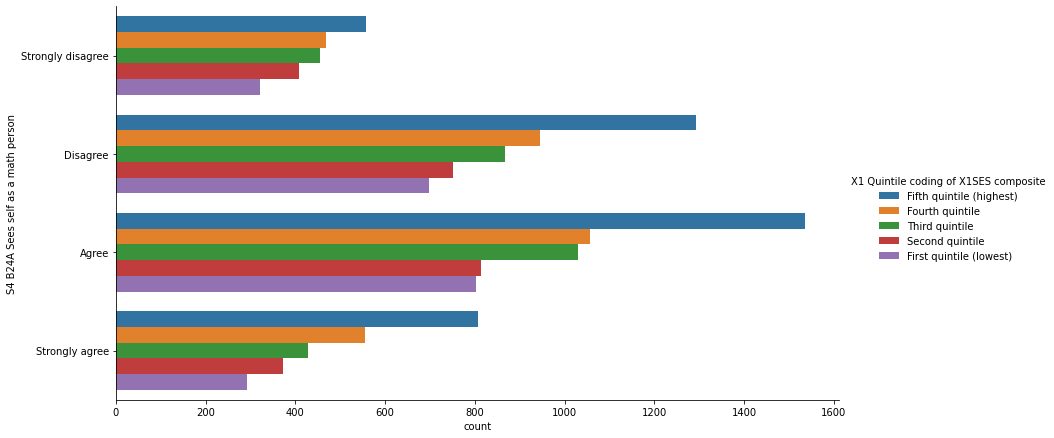

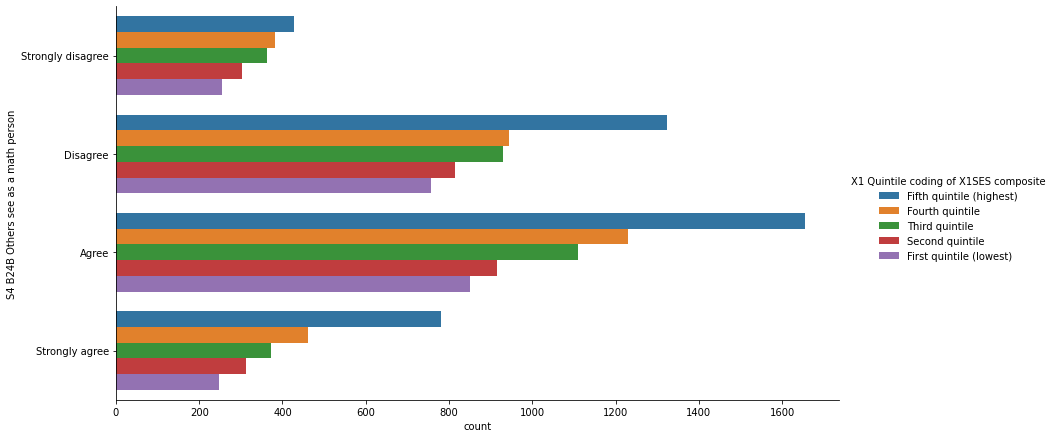

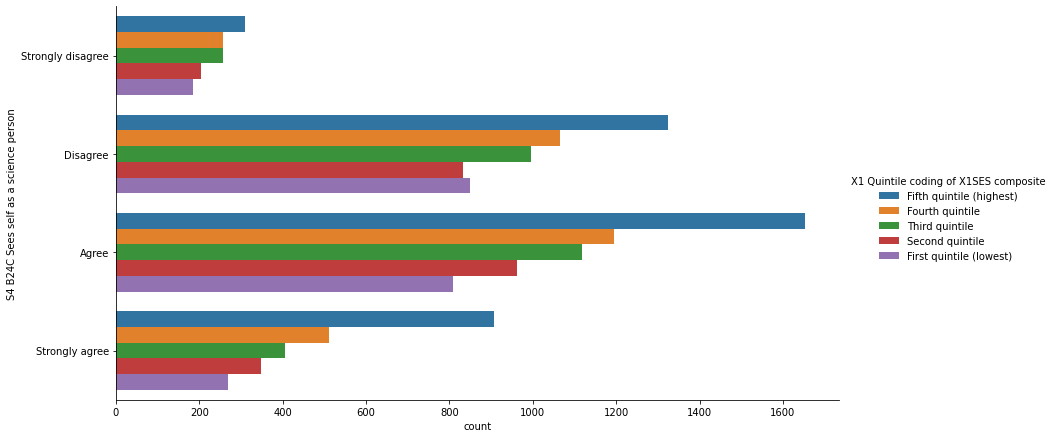

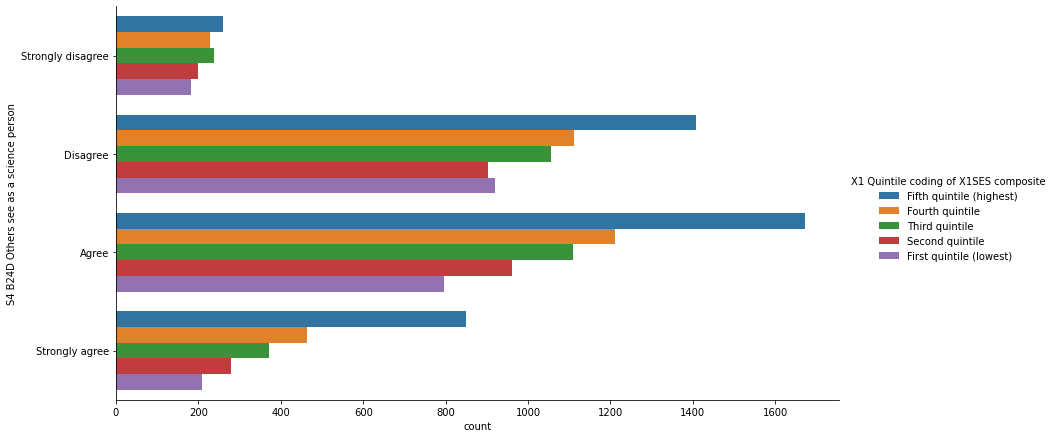

In [24]:
for column in pov:
    sns.catplot(
    y=labels[column],
    hue=labels["X1SESQ5"],
    data=cdf,
    kind="count",
    height=6,
    aspect=2,
);

Note:

- Students in 5th quintile SES may have a inclination to STEM fields (need to take a closer look)

## 3. Attitude and beliefs about sex and race

Below are the variables that measured attitude and beliefs regarding sex and race.

In [25]:
attitude = [
    "P1MTHCOMP",
    "P1SCICOMP",
    "S1MTCHMFDIFF",
    "S1STCHMFDIFF",
    "S1MTCHFAIR",
    "S1MTCHRESPCT",
    "S1MTCHTREAT",
    "S1STCHRESPCT",
    "S1STCHFAIR",
    "S1STCHTREAT",
    "S1MTHCOMP",
    "S1SCICOMP",
    "M1MTHCOMP",
    "M1SCICOMP",
    "N1MTHCOMP",
    "N1SCICOMP",
    "S2MTCHTREAT",
    "S2STCHTREAT",
    "S2MTHCOMP",
    "S2SCICOMP",
    "S4MTHMF",
    "S4MTHRC",
    "S4SCIMF",
    "S4SCIRC",
]

**Comparison by race**

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


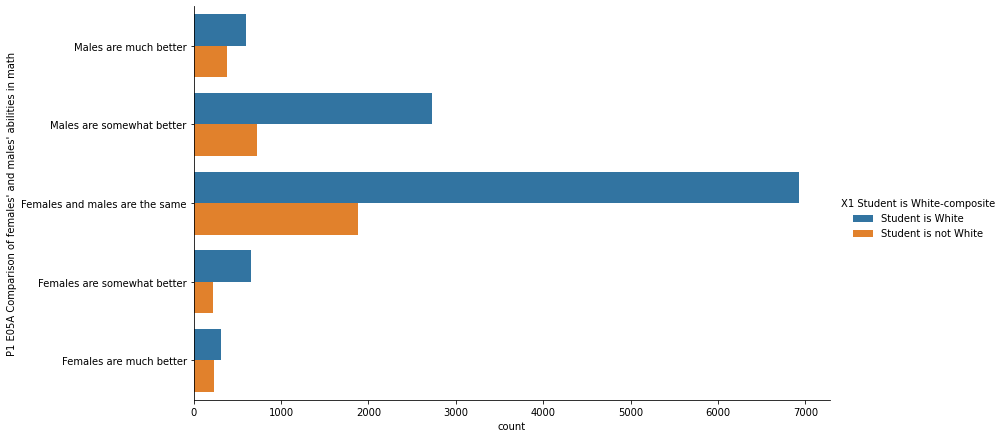

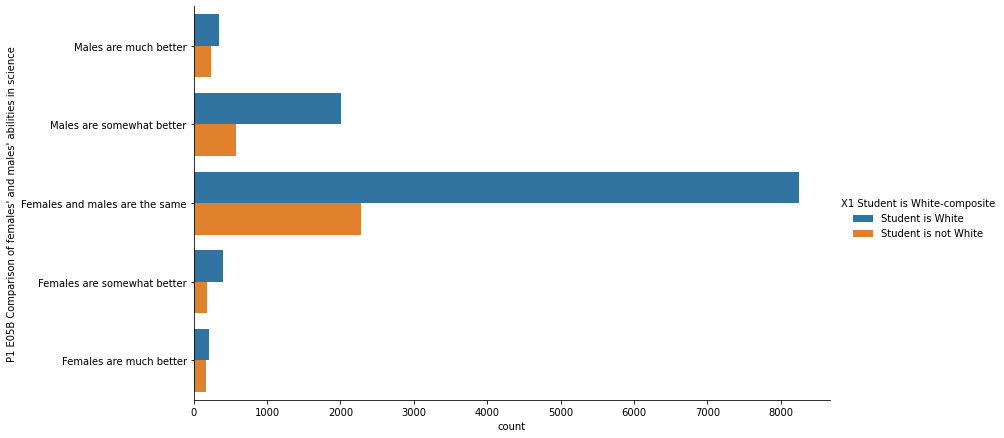

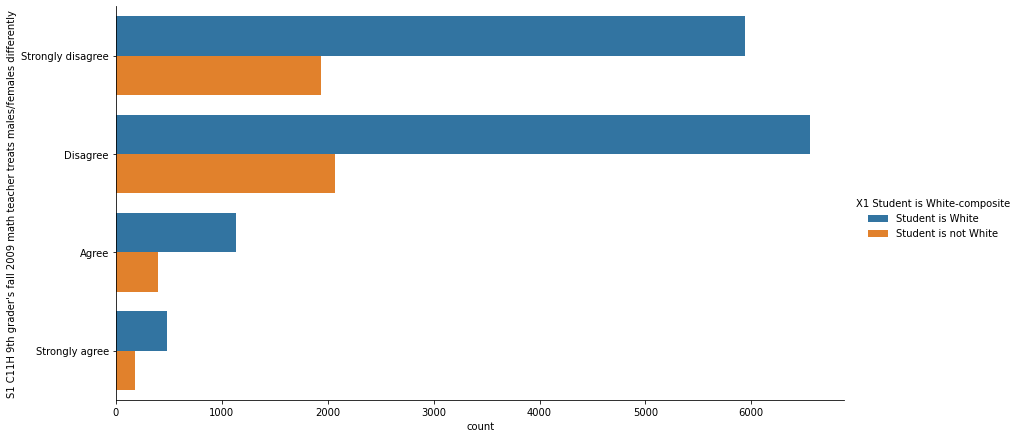

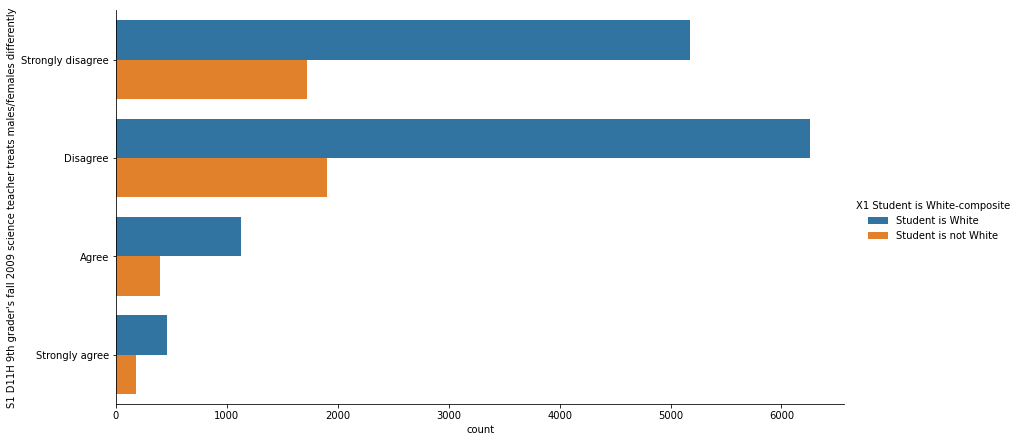

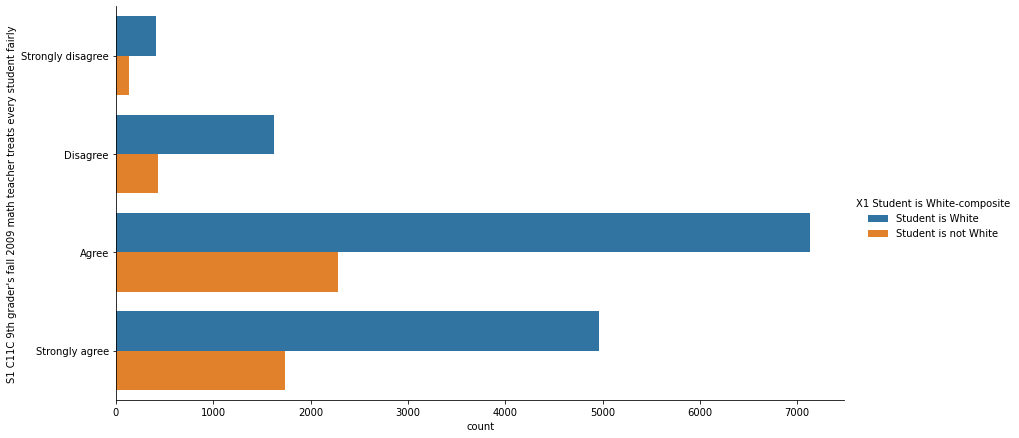

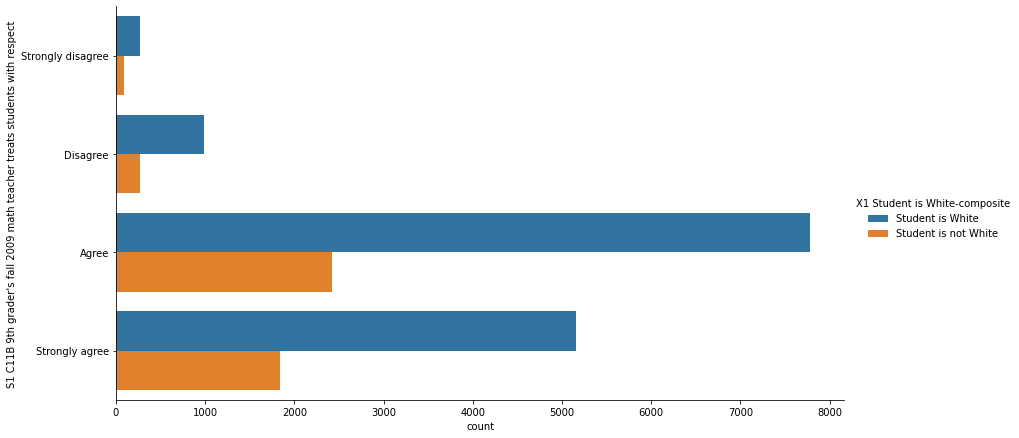

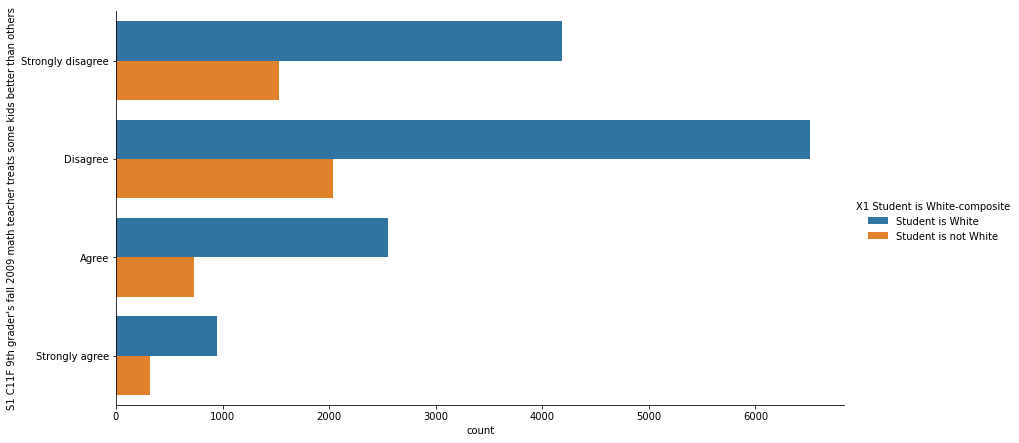

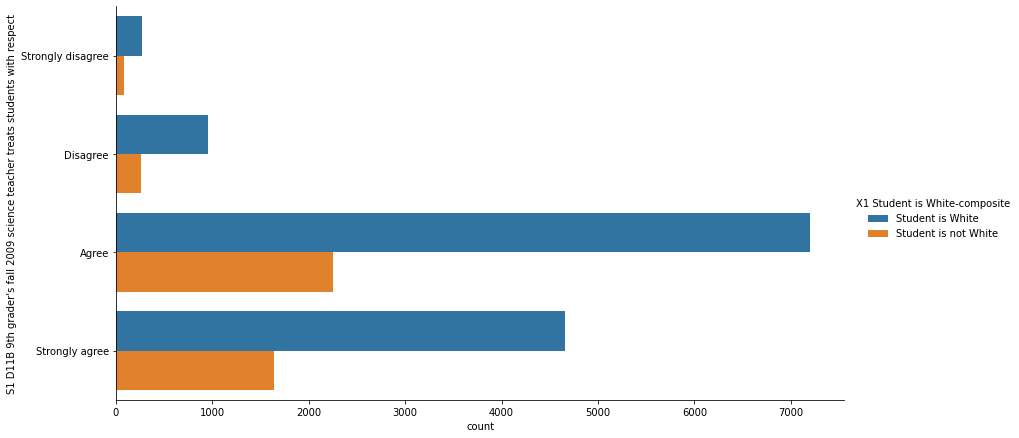

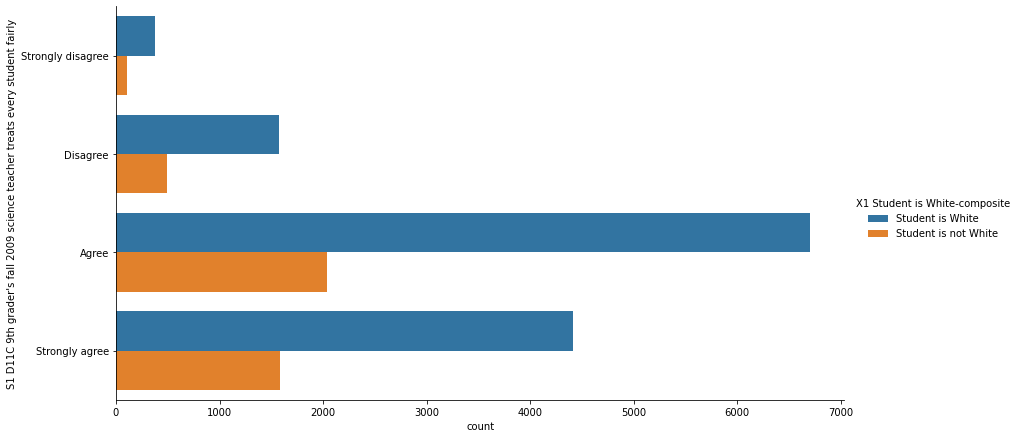

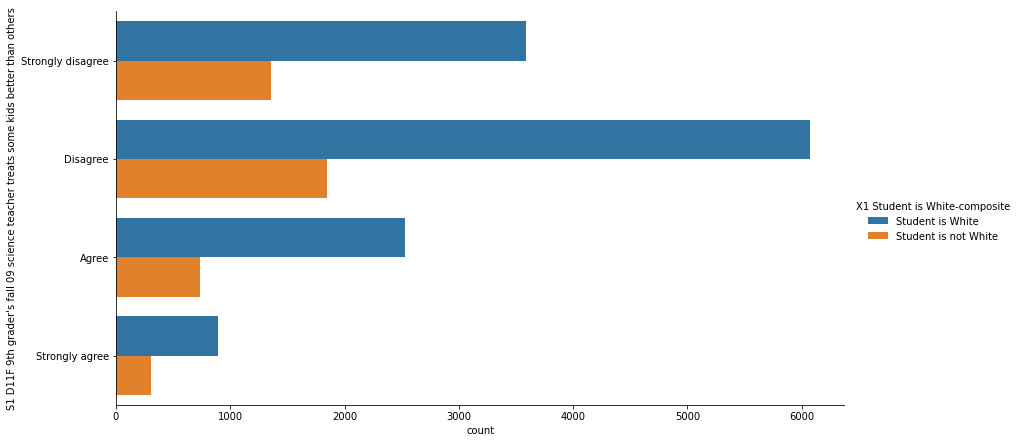

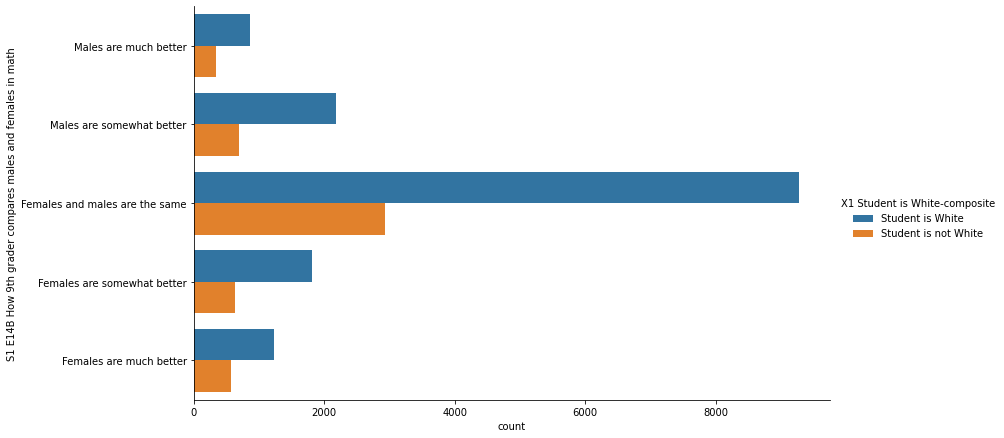

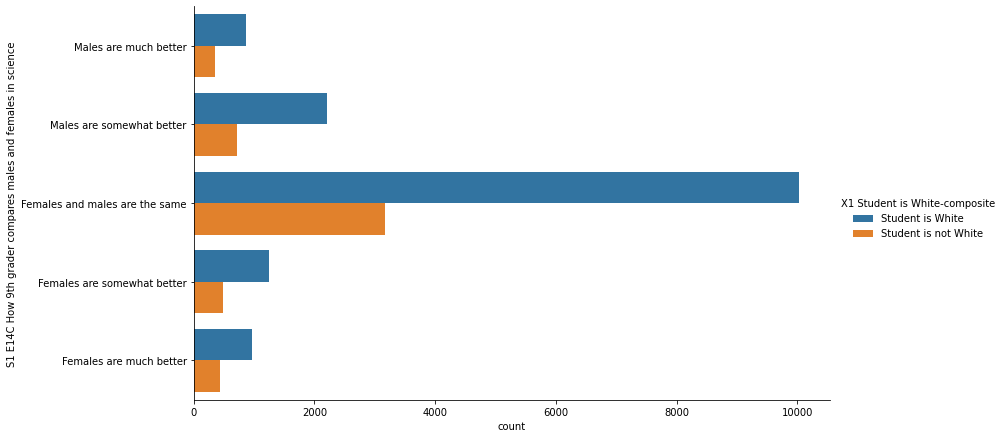

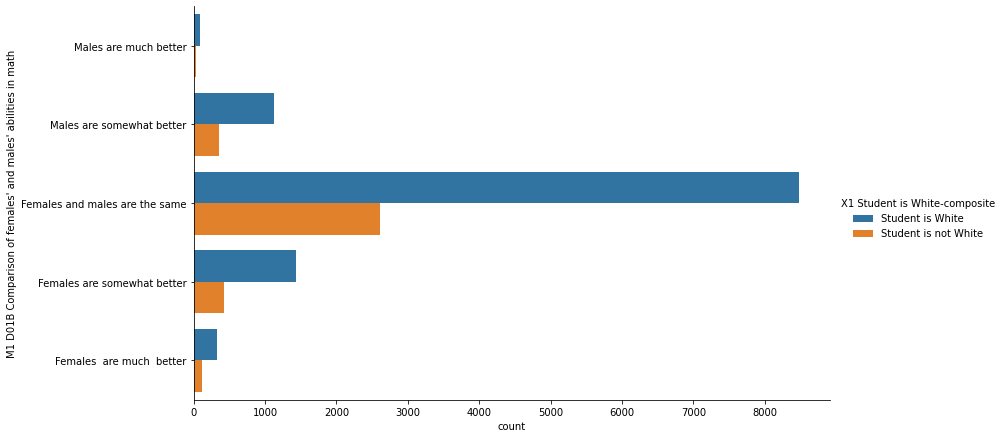

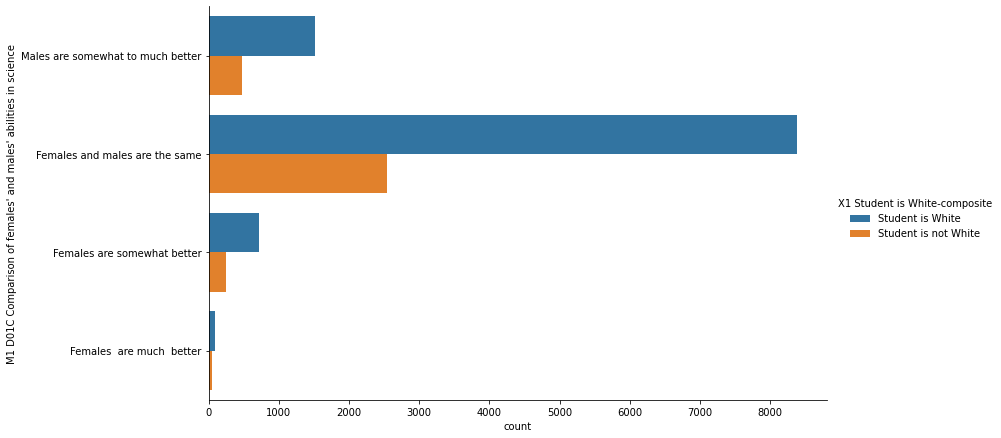

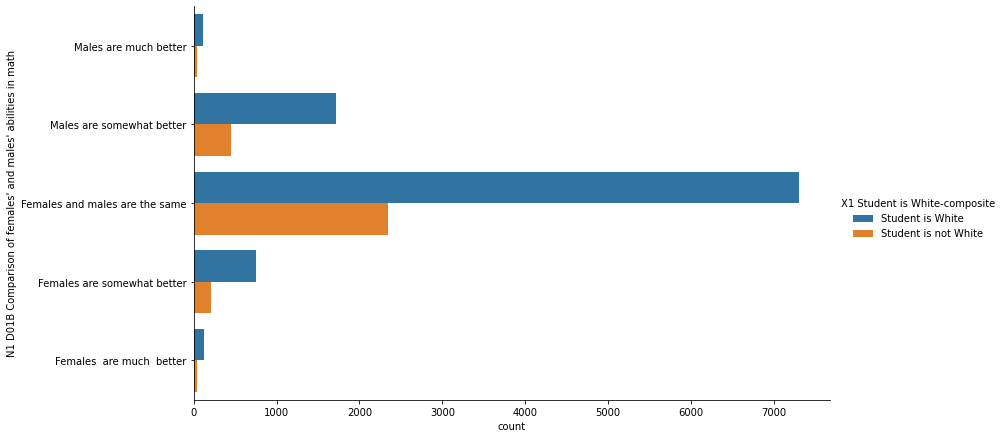

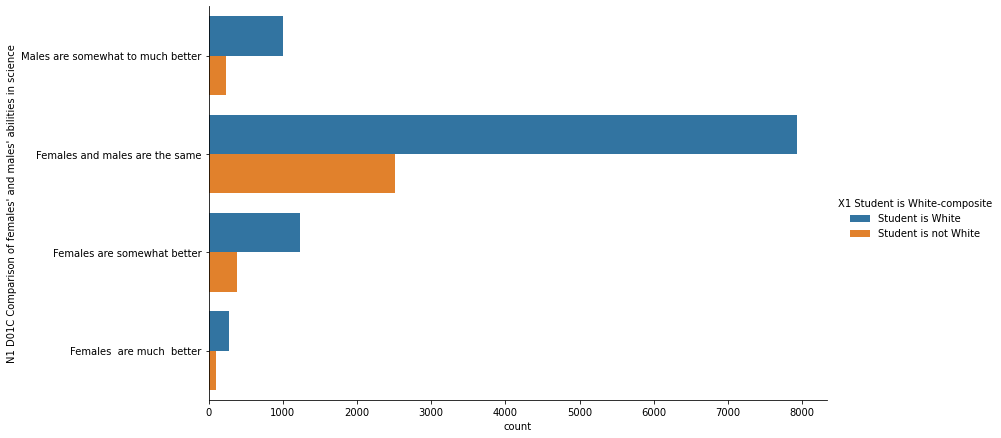

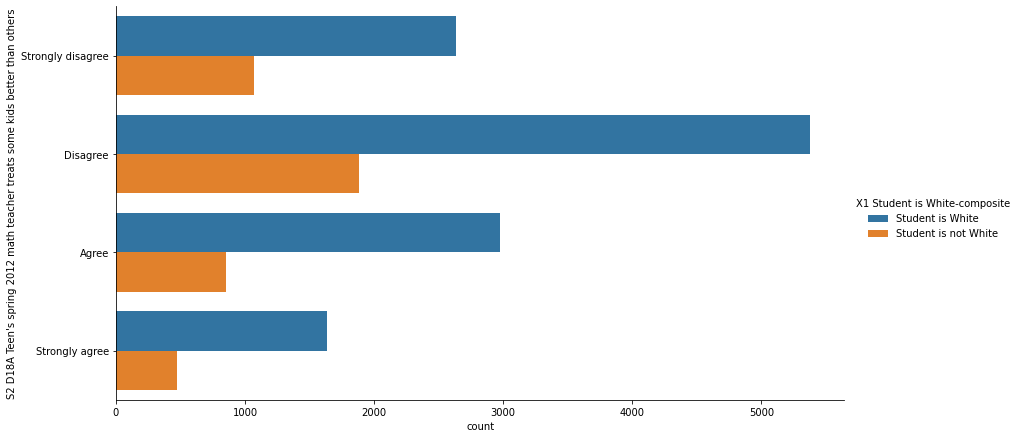

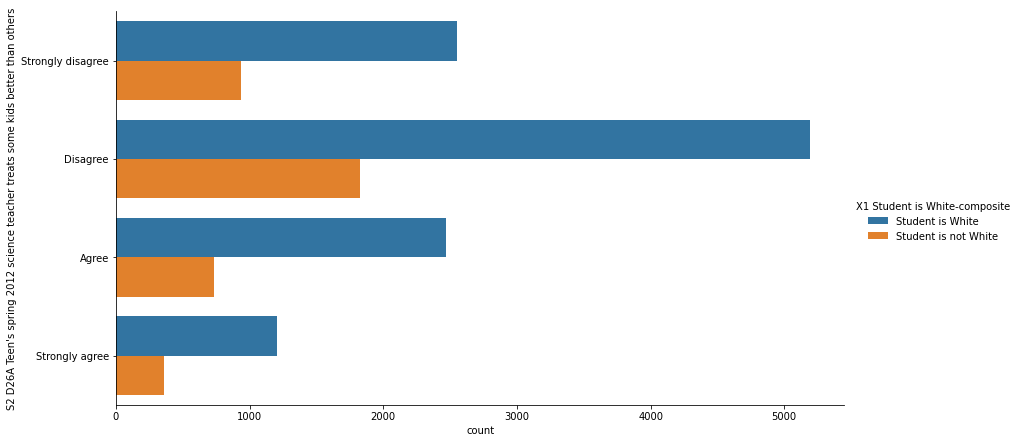

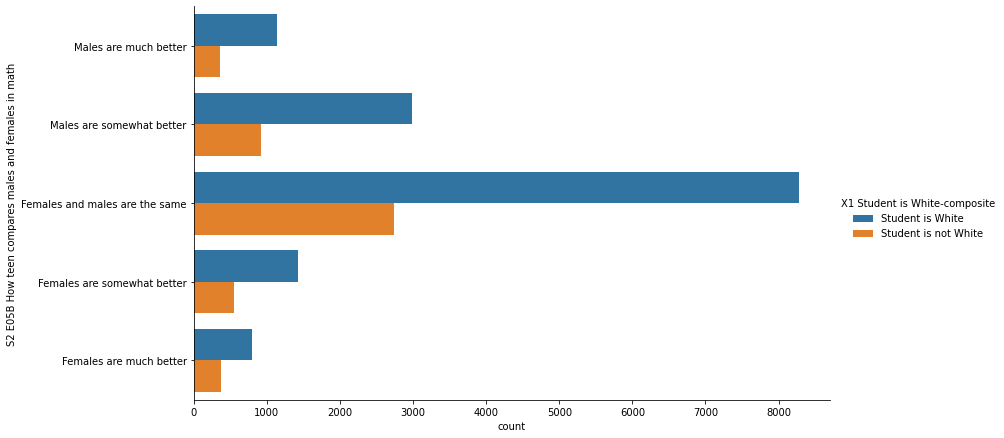

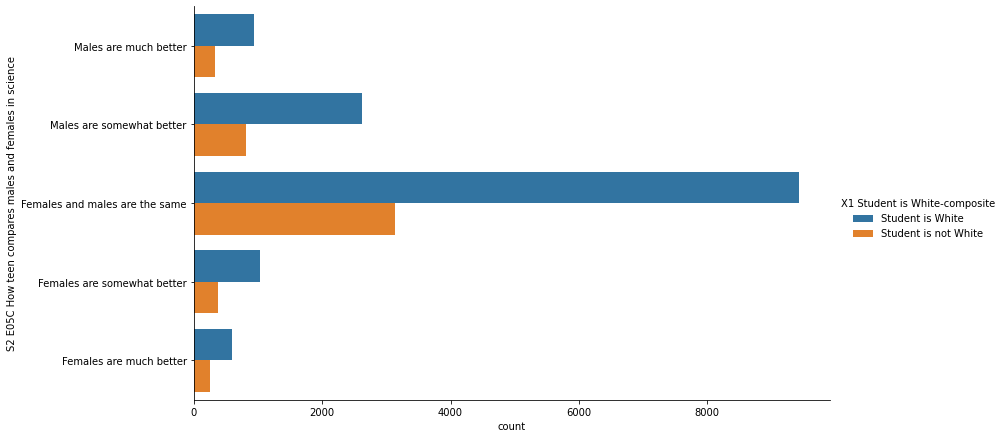

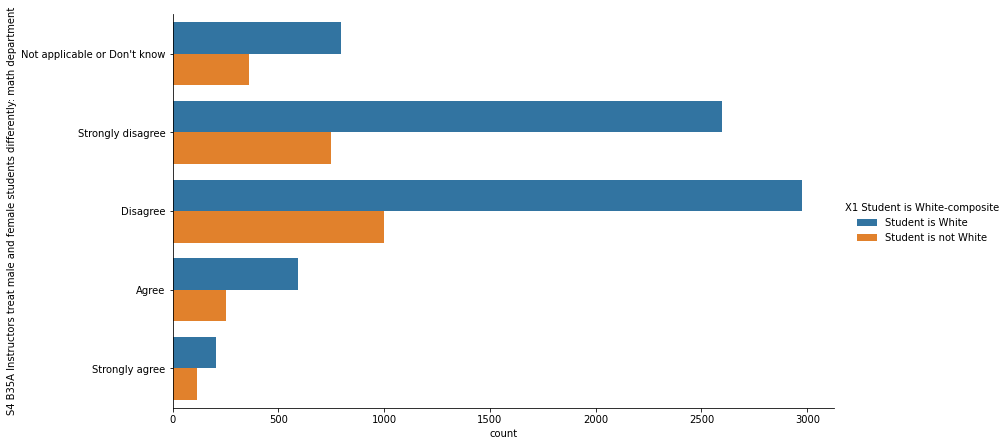

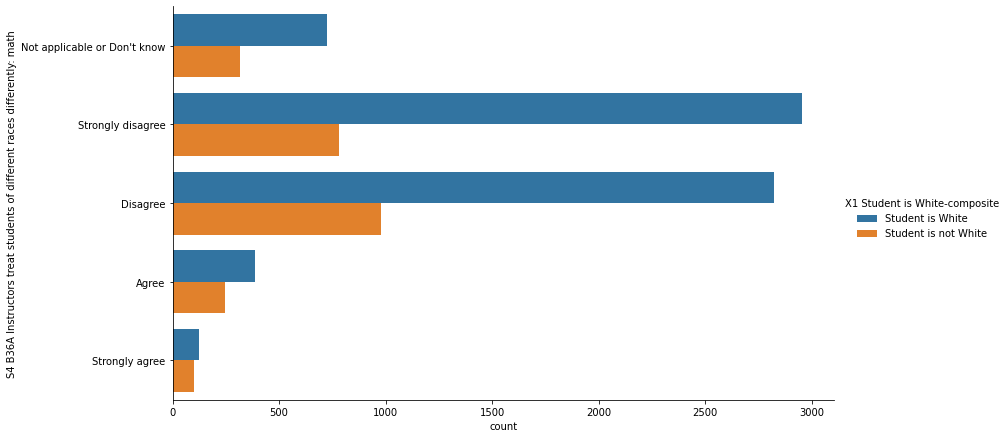

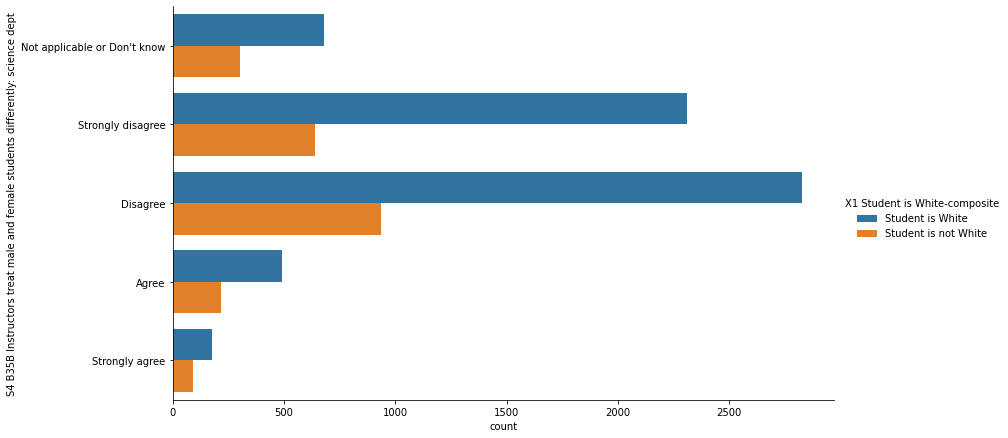

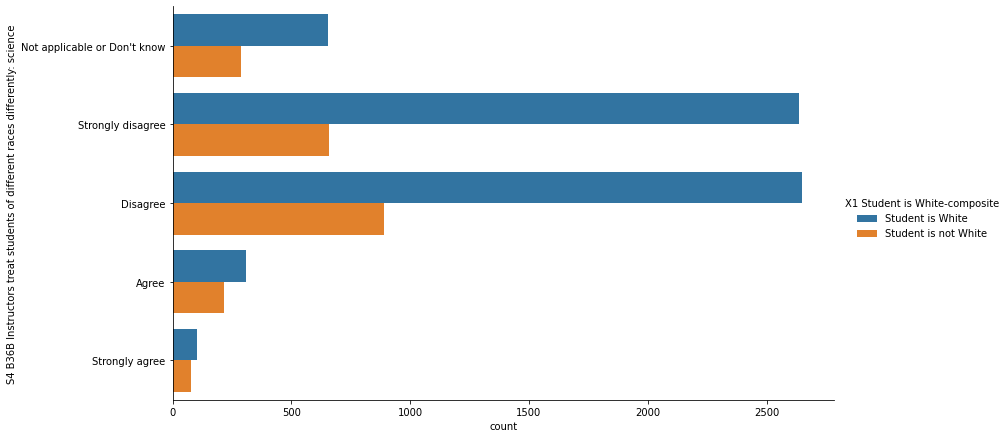

In [26]:
for column in attitude:
    sns.catplot(
    y=labels[column],
    hue=labels["X1WHITE"],
    data=cdf,
    kind="count",
    height=6,
    aspect=2,
);

Note:

- White students may more strongly believe that teachers have fair attitude and beliefs than non-white students
- Teachers' race may matter to this difference 

**Comparison by sex**

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


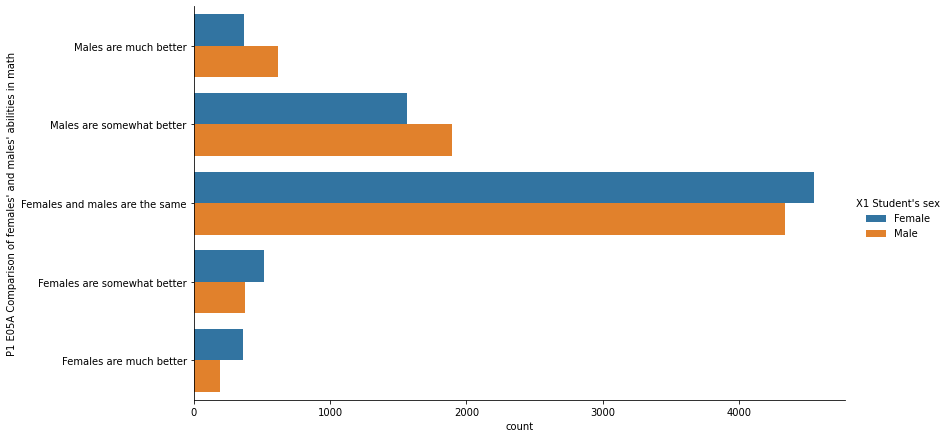

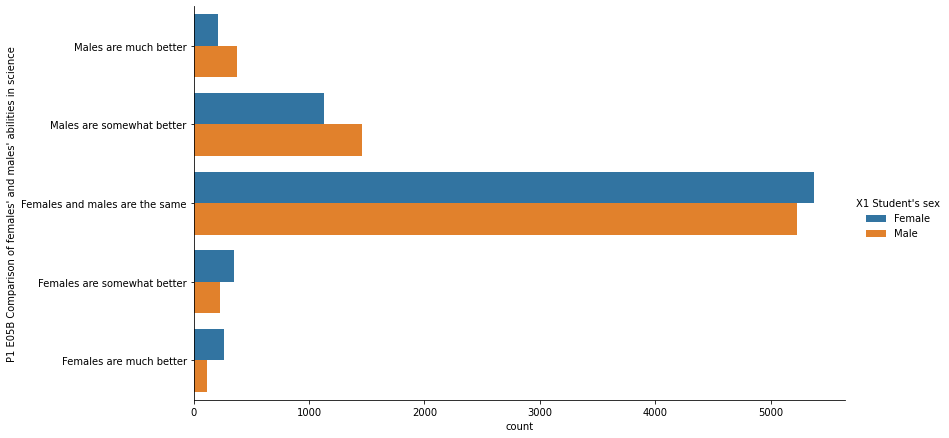

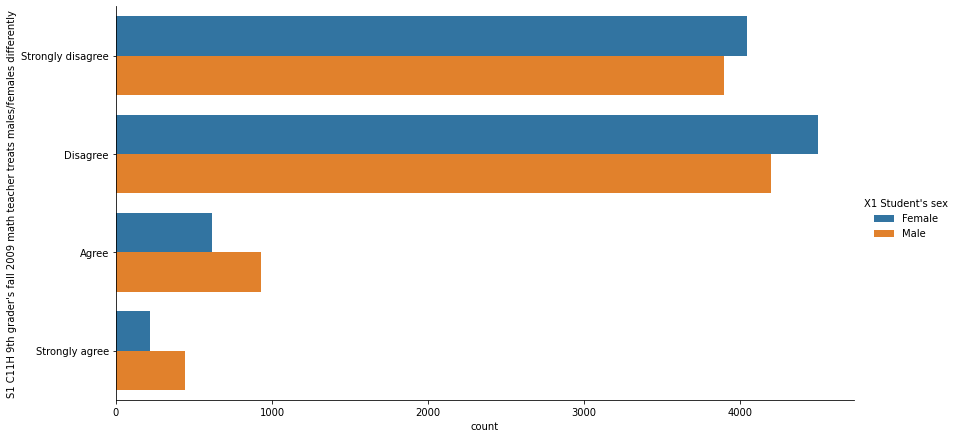

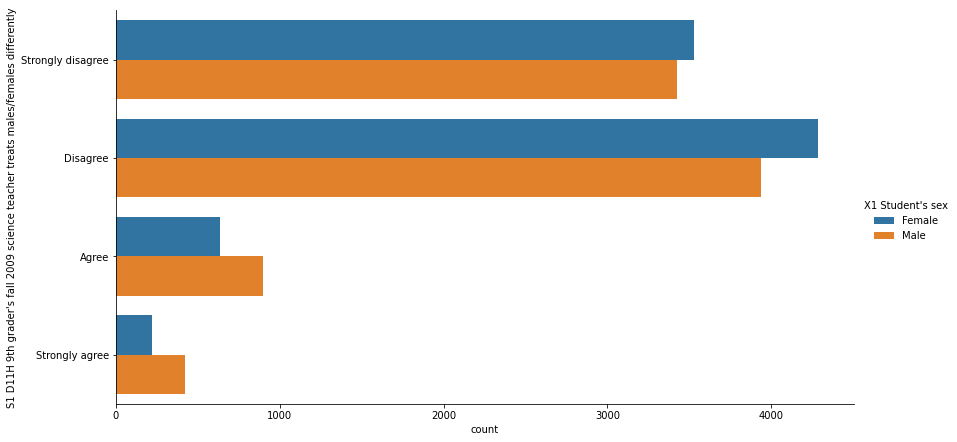

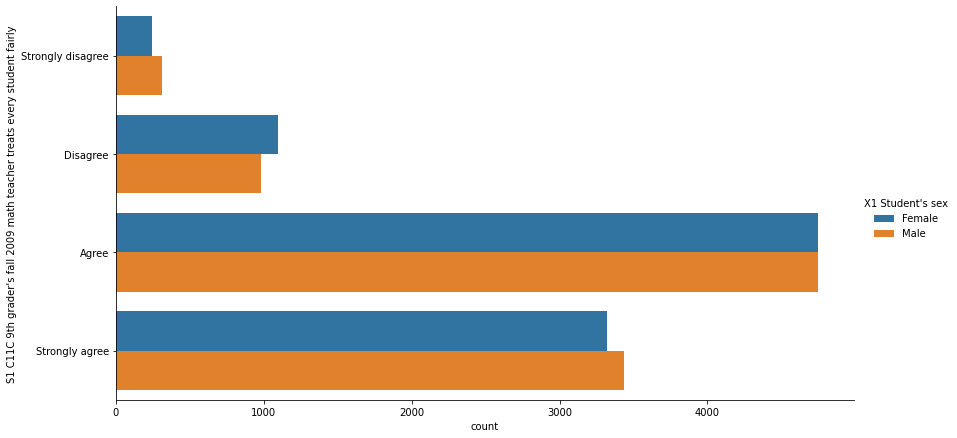

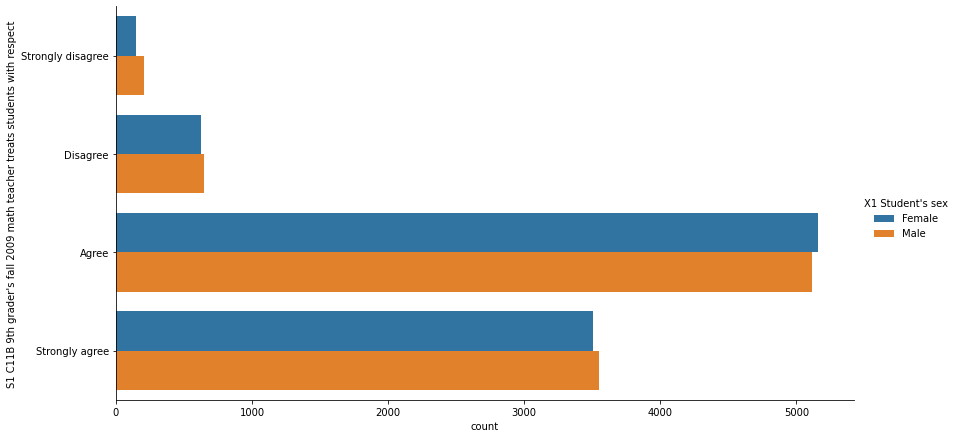

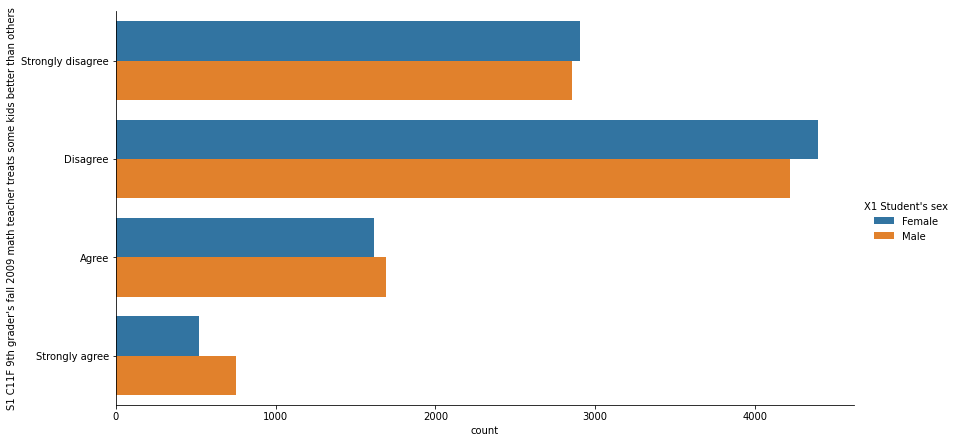

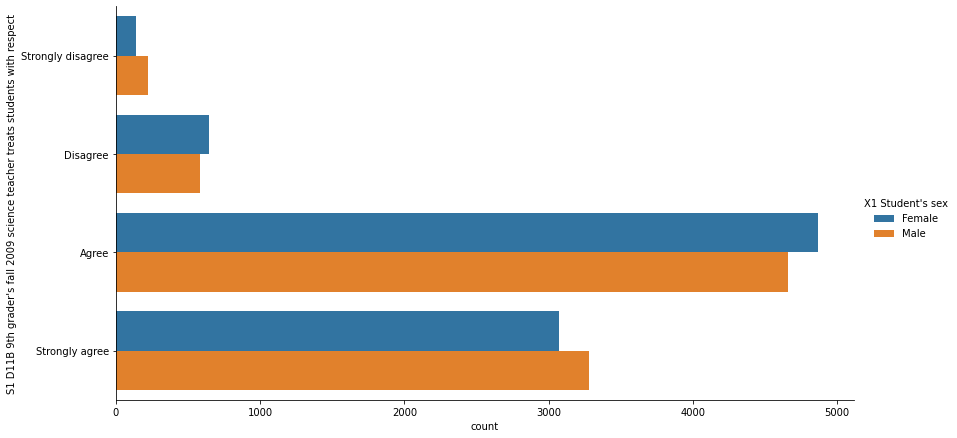

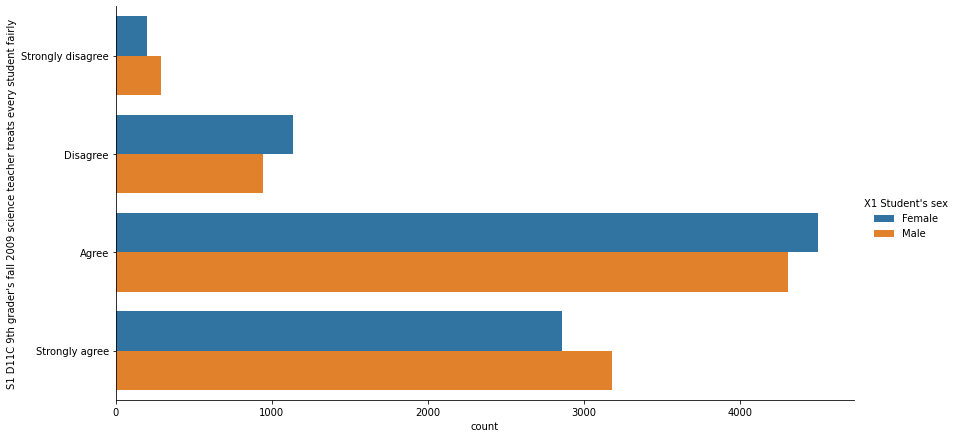

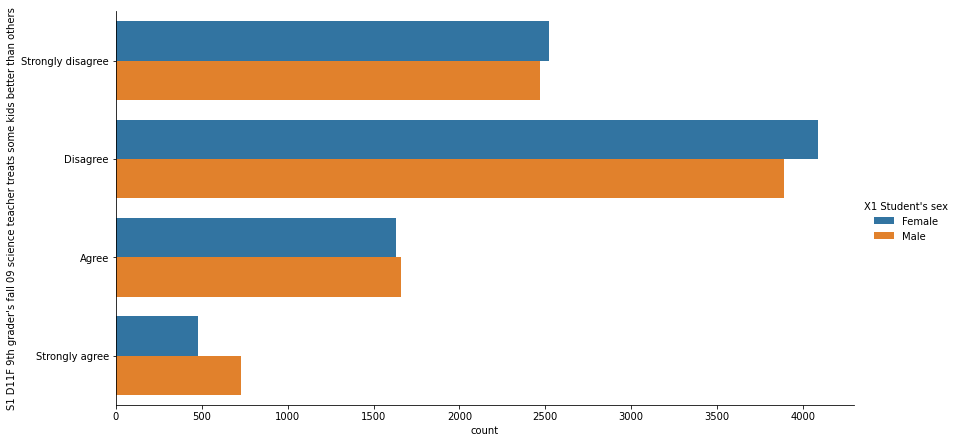

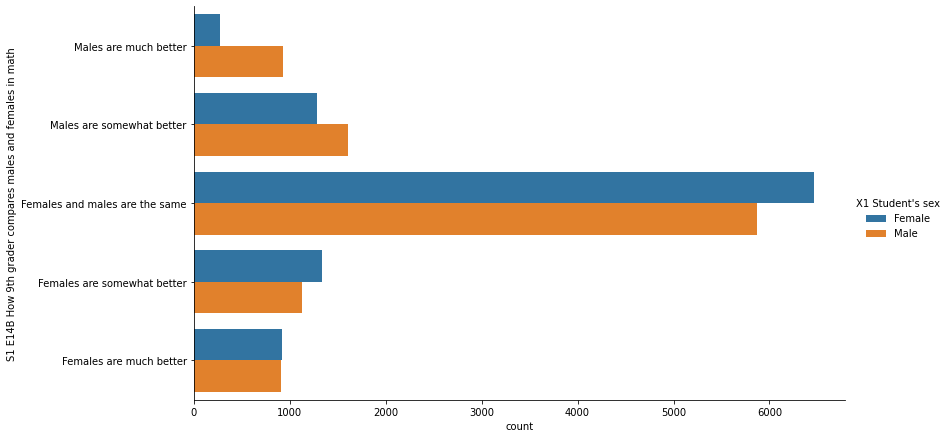

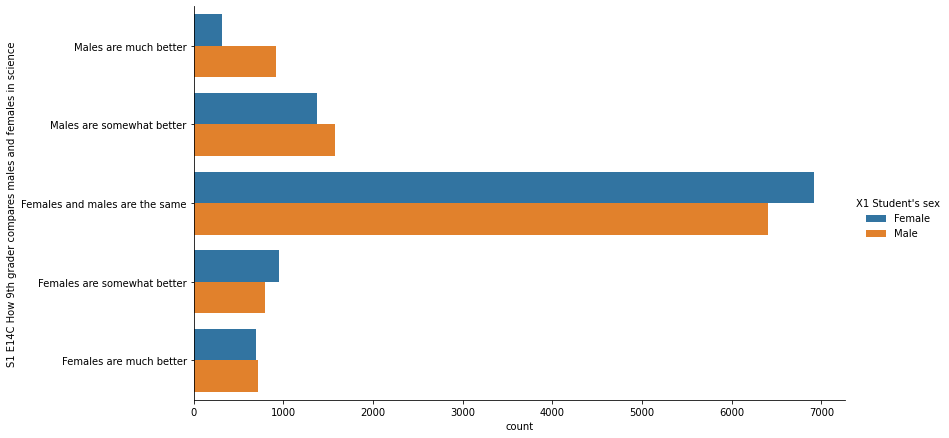

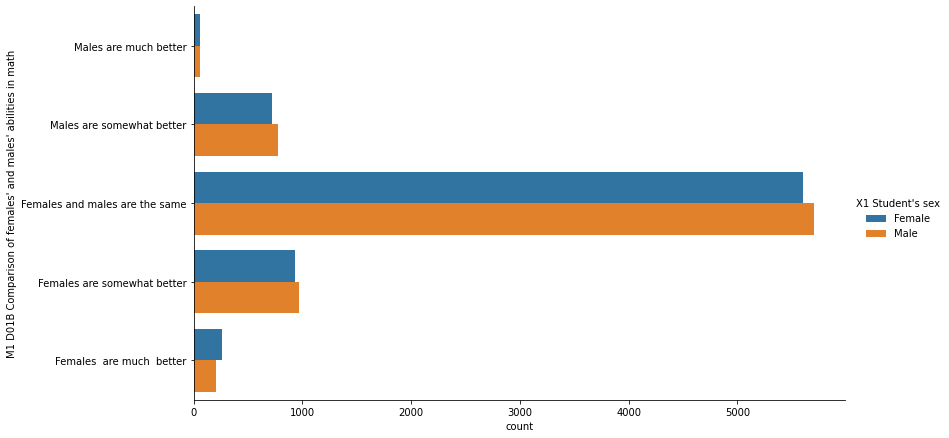

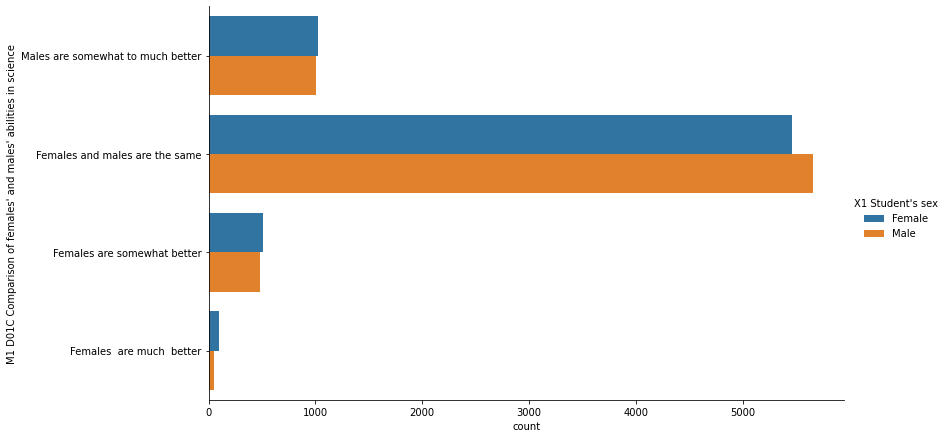

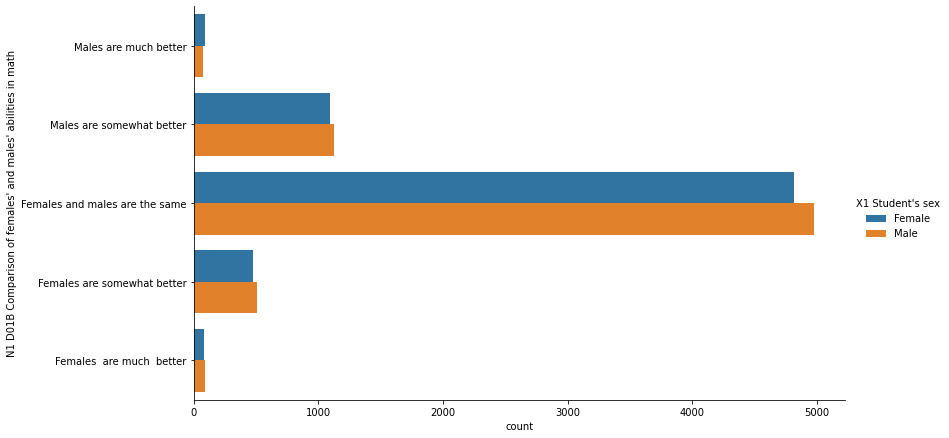

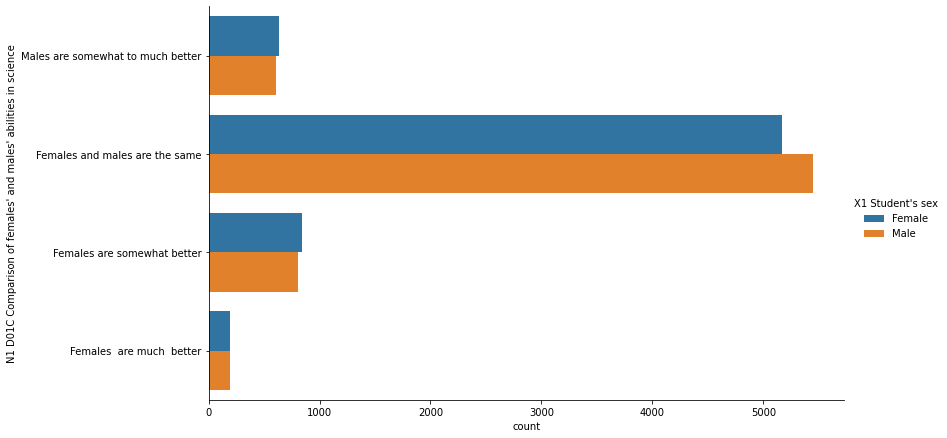

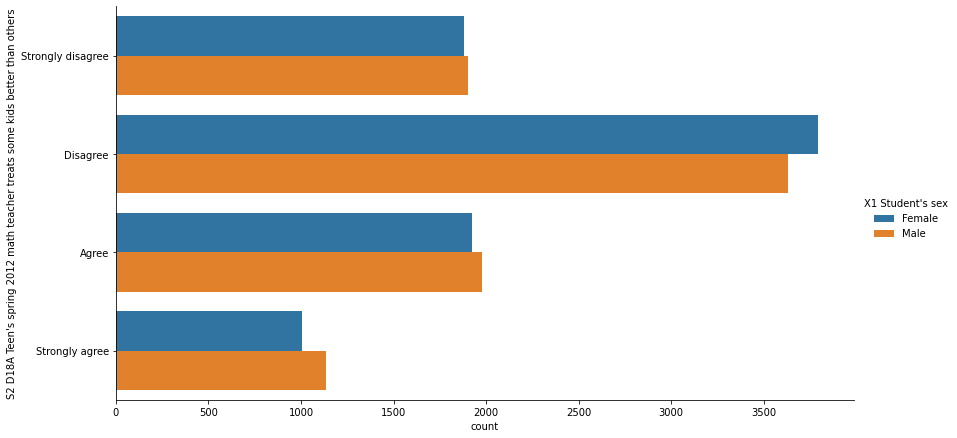

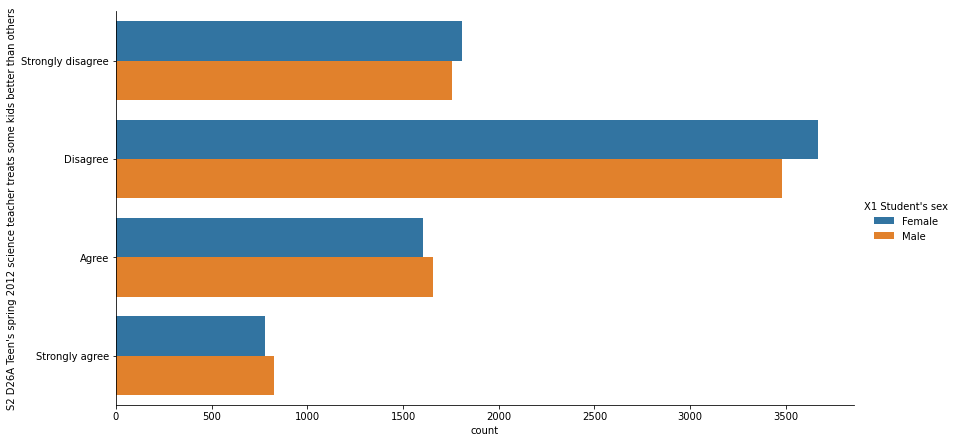

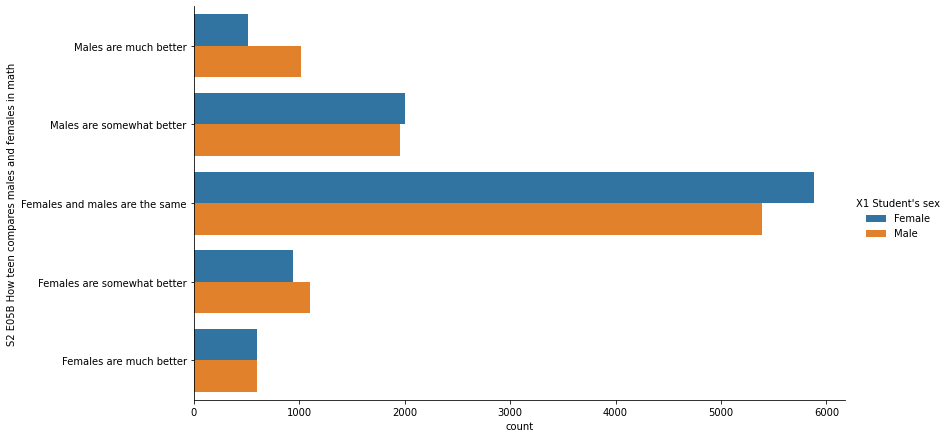

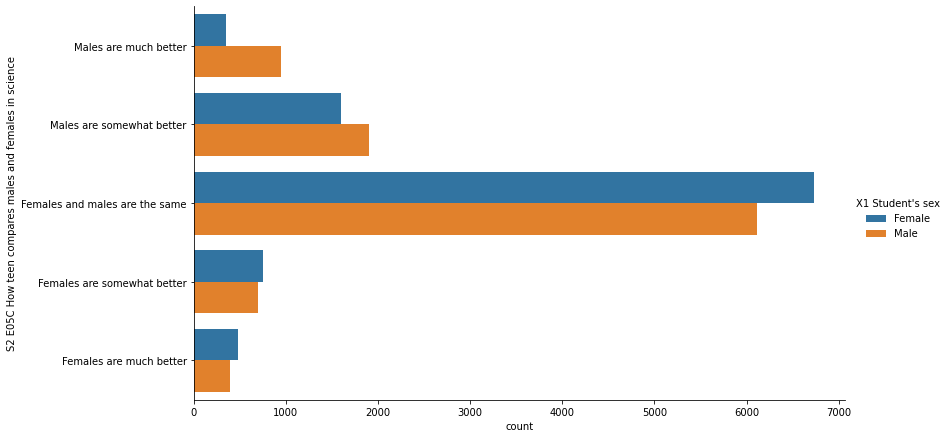

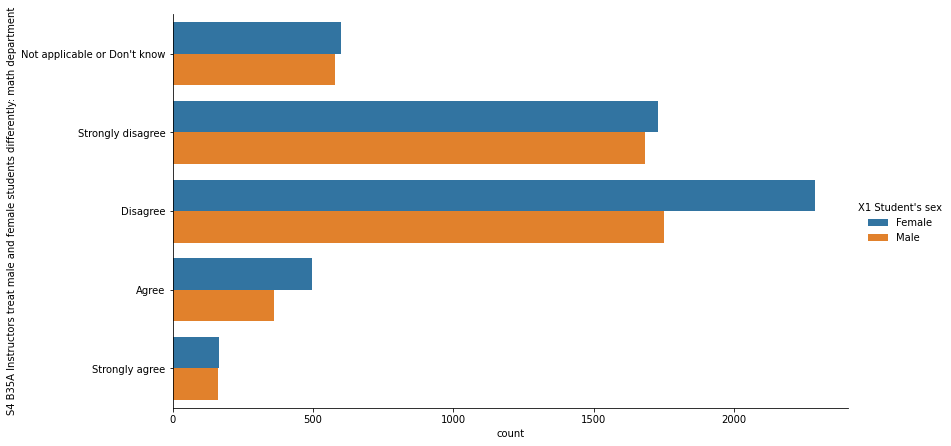

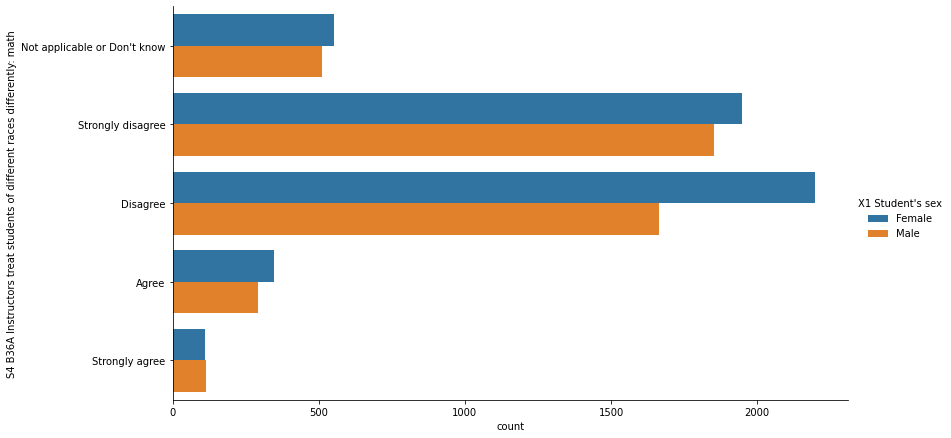

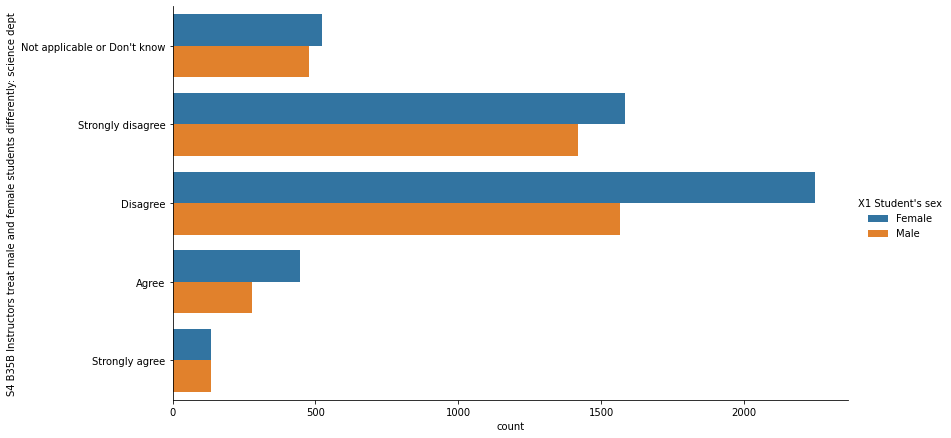

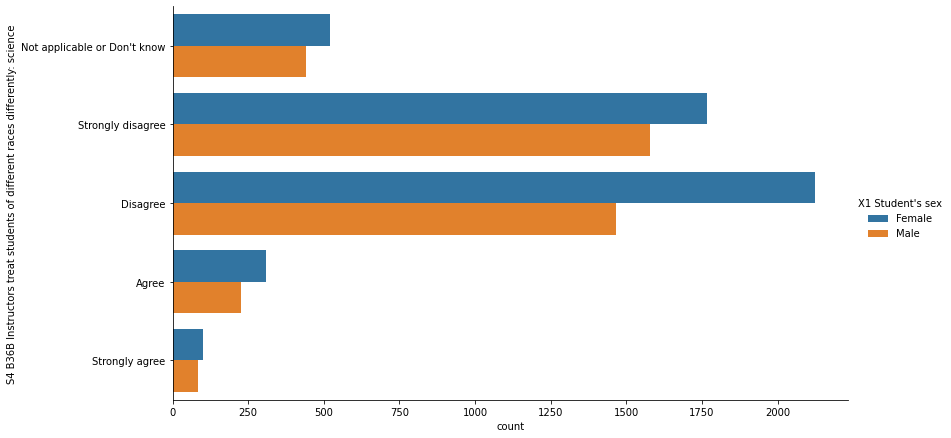

In [27]:
for column in attitude:
    sns.catplot(
    y=labels[column],
    hue=labels["X1SEX"],
    data=cdf,
    kind="count",
    height=6,
    aspect=2,
);

Note:

- Boys and girls don't seem to differ too much in their attitude and beliefs
- Teachers and parents also don't seem to differ by the student's sex

**Comparison by SES**

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


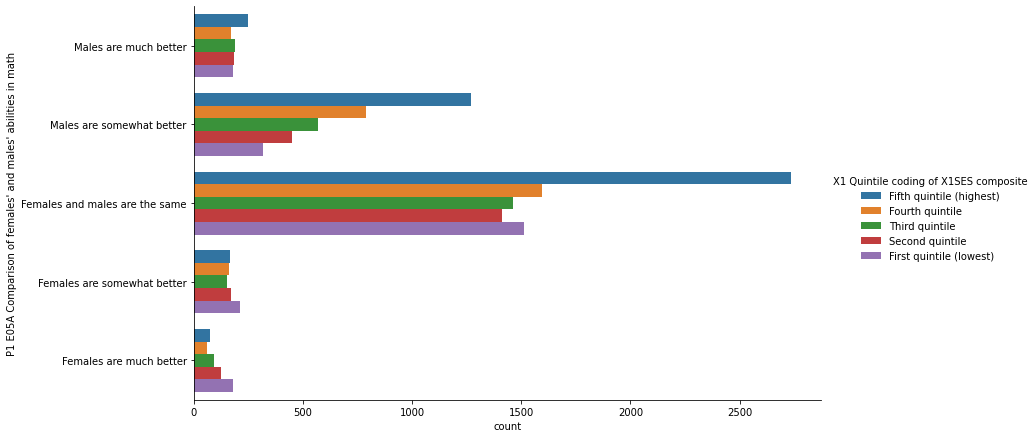

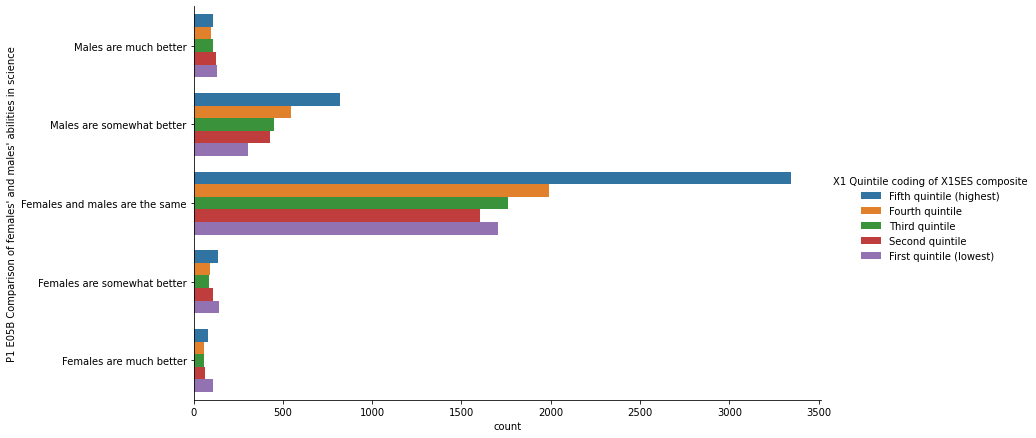

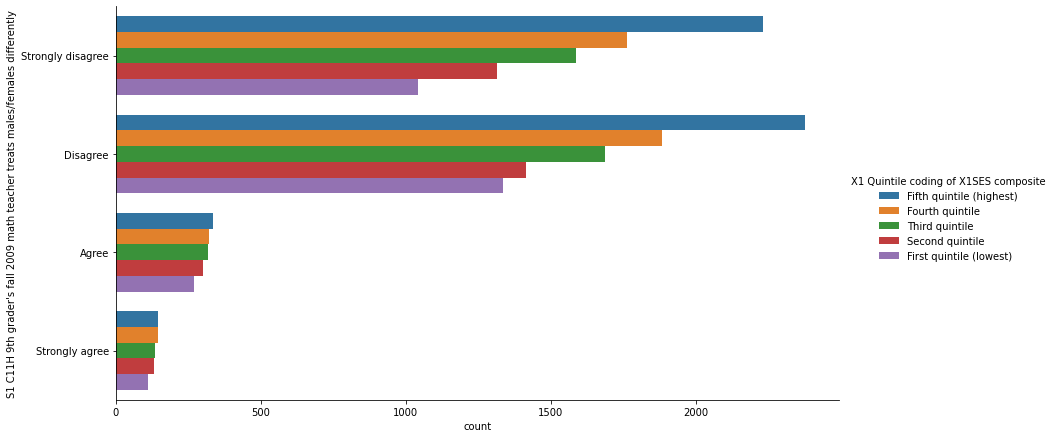

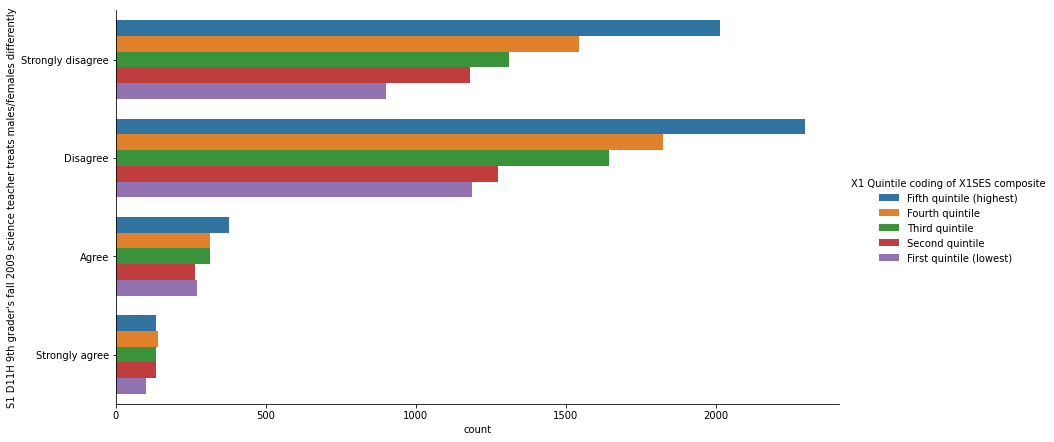

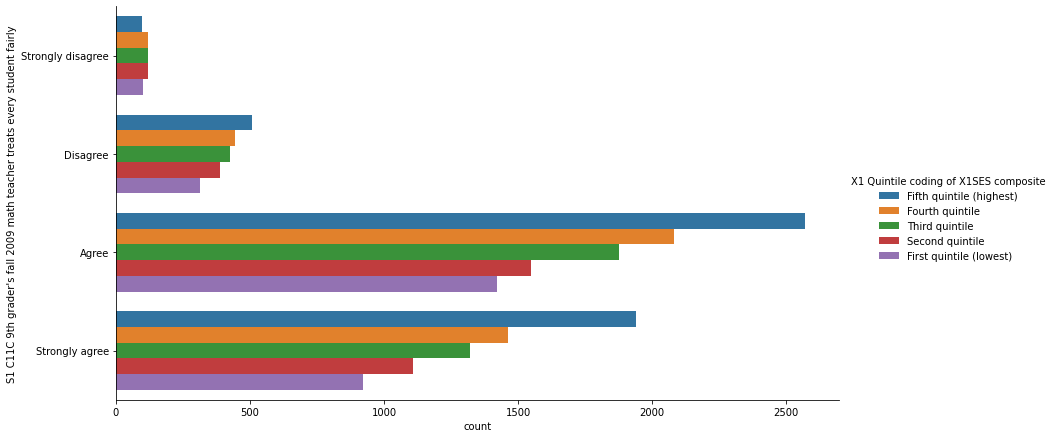

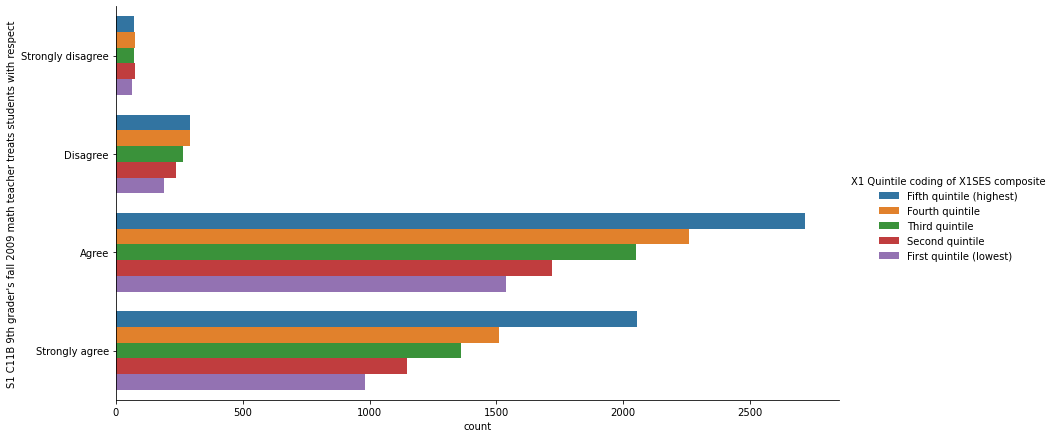

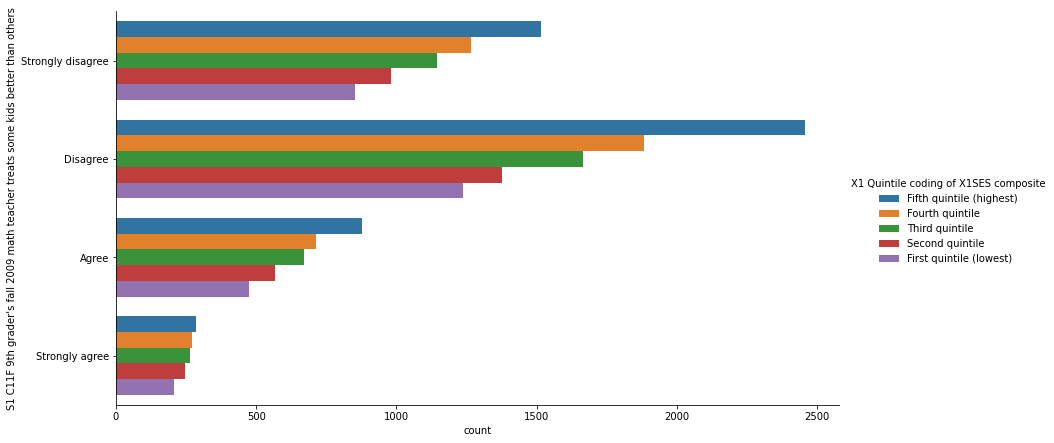

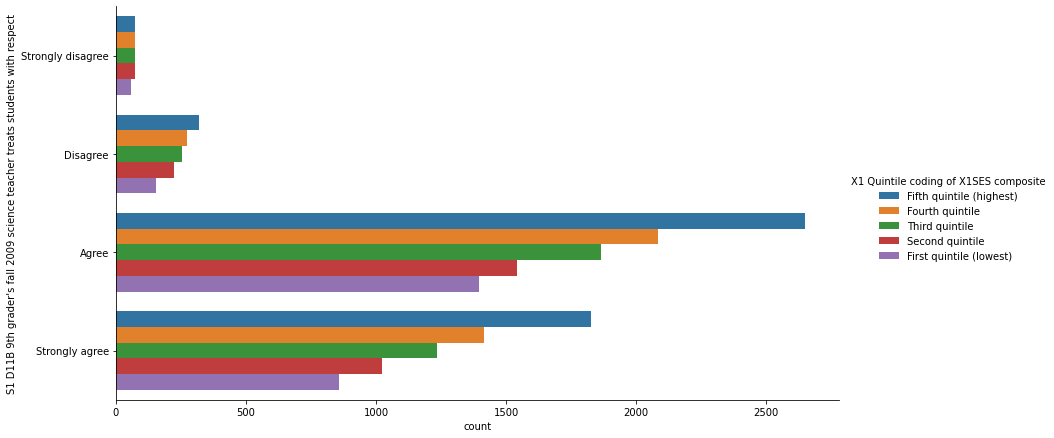

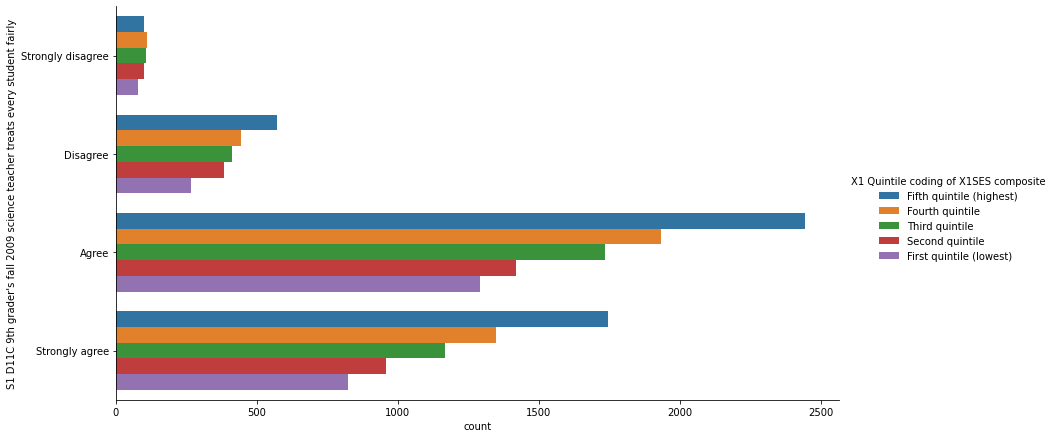

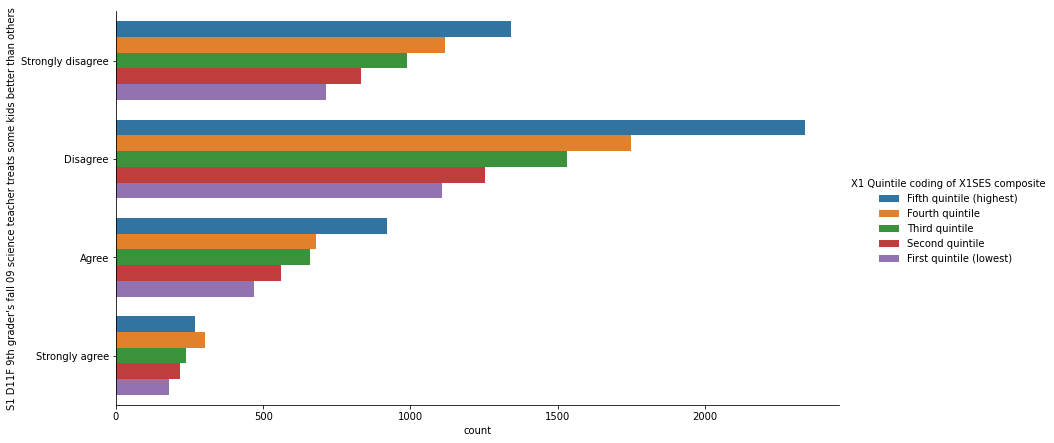

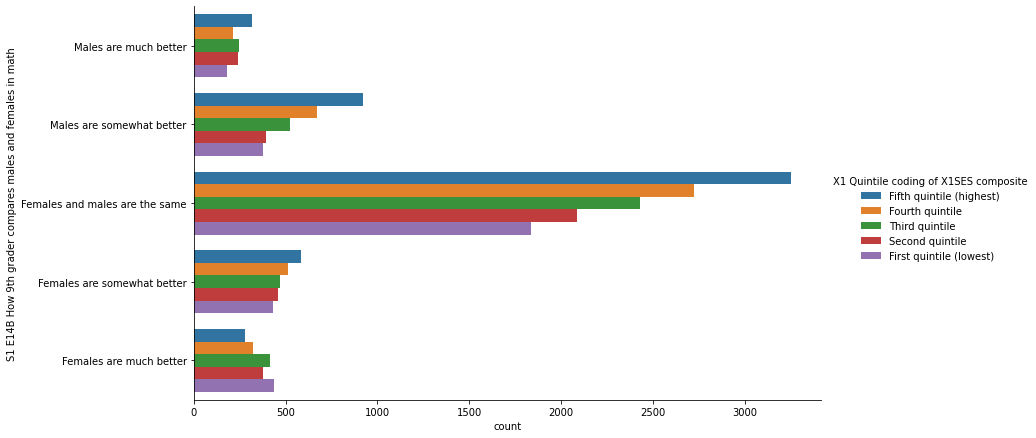

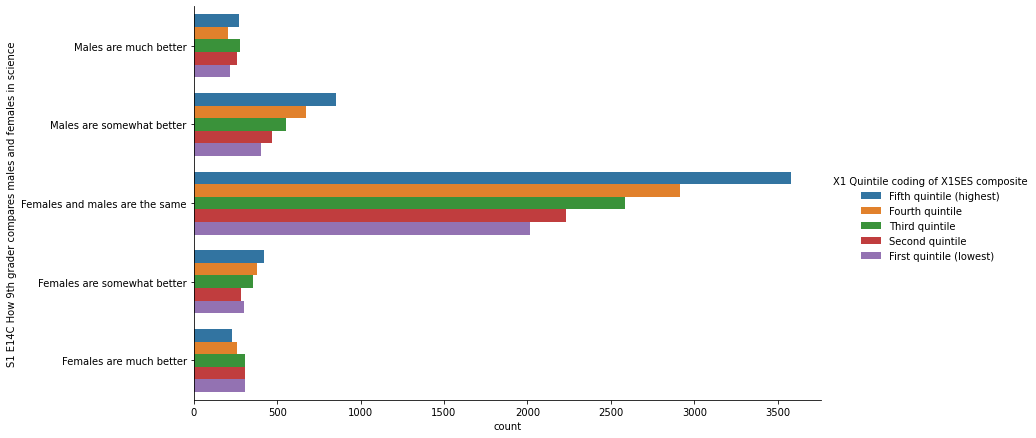

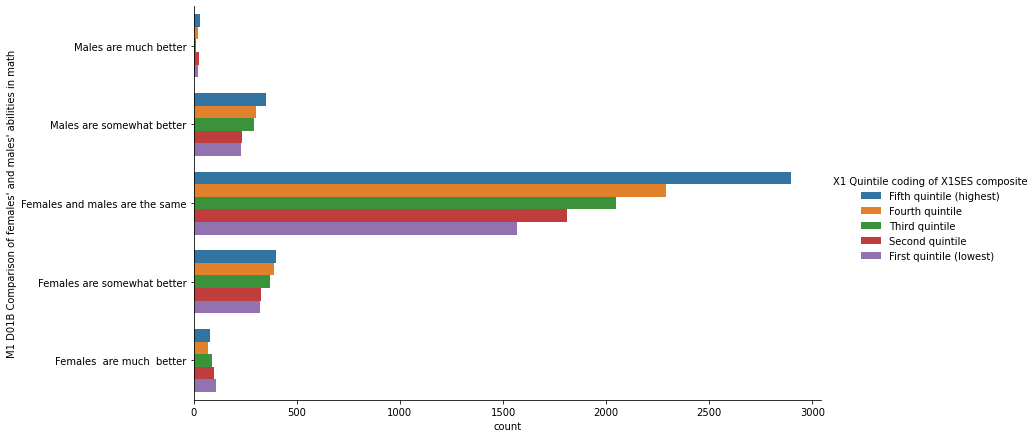

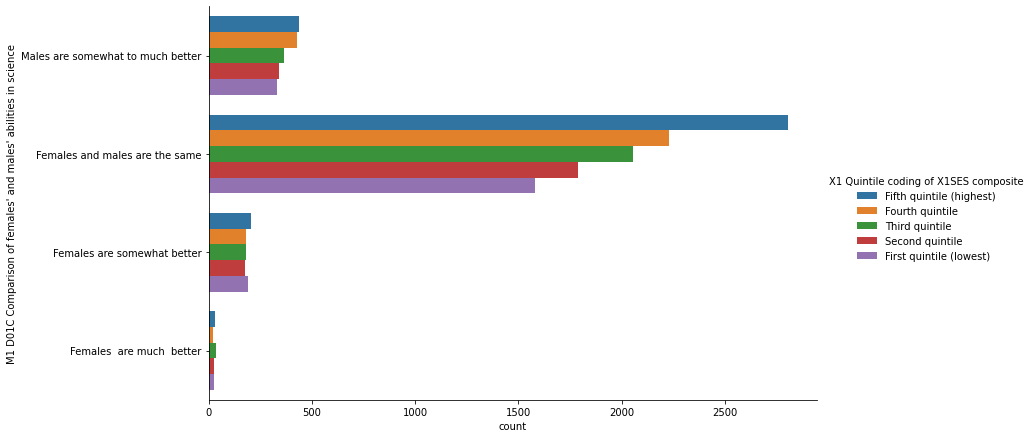

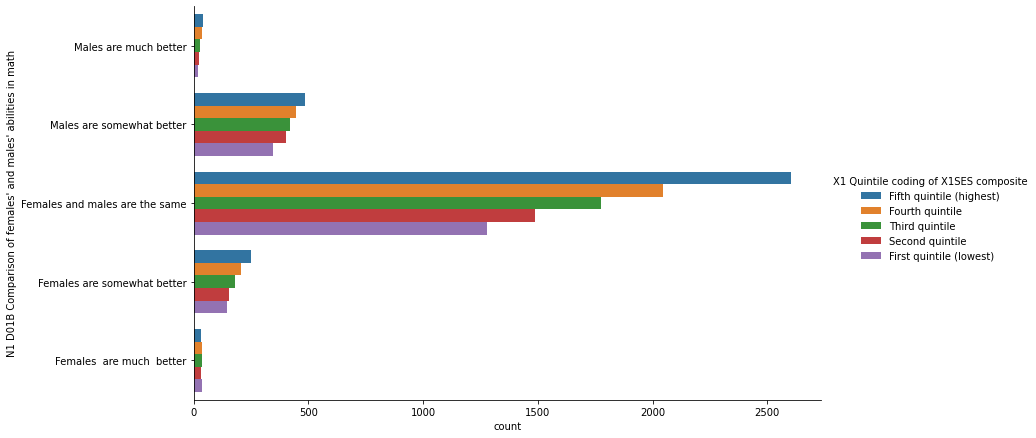

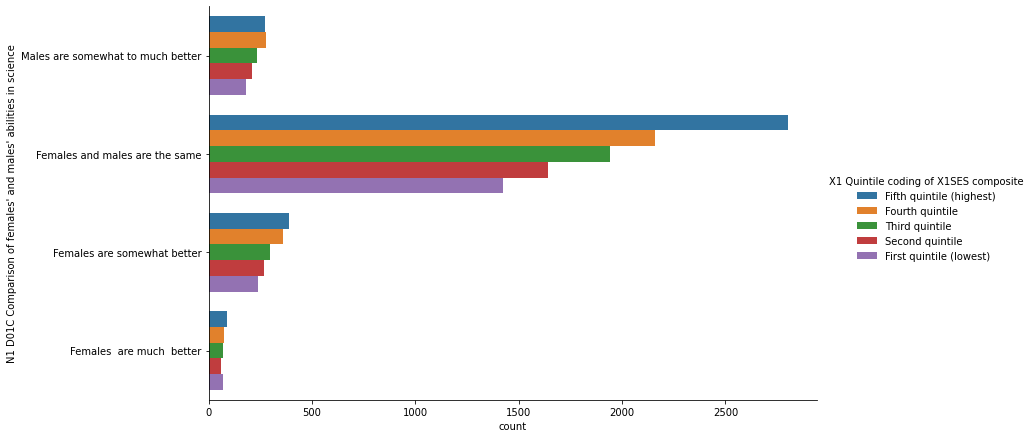

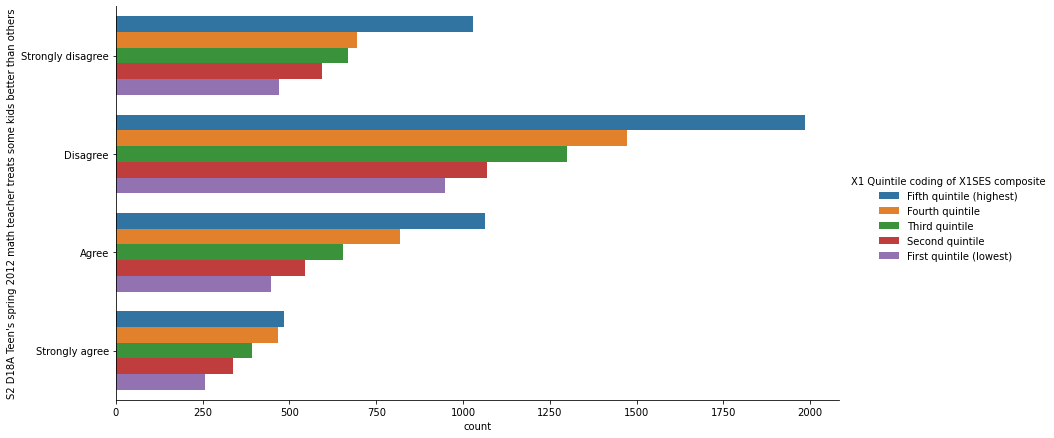

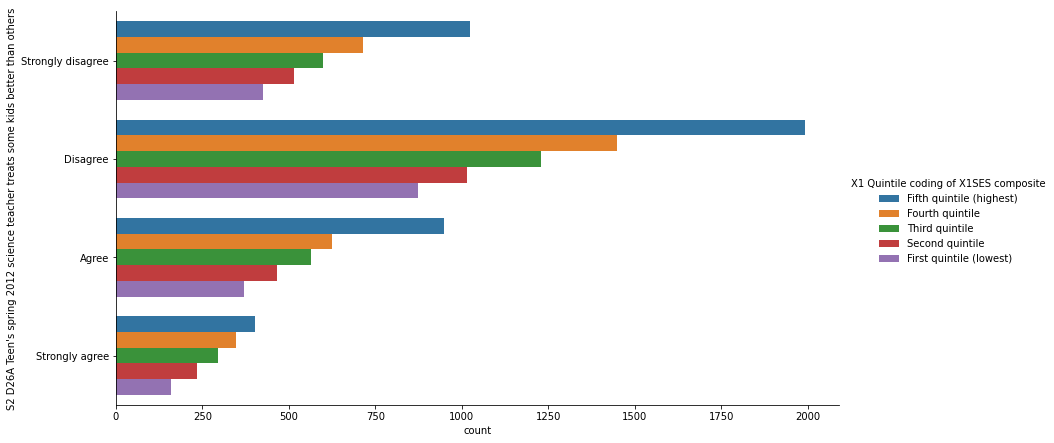

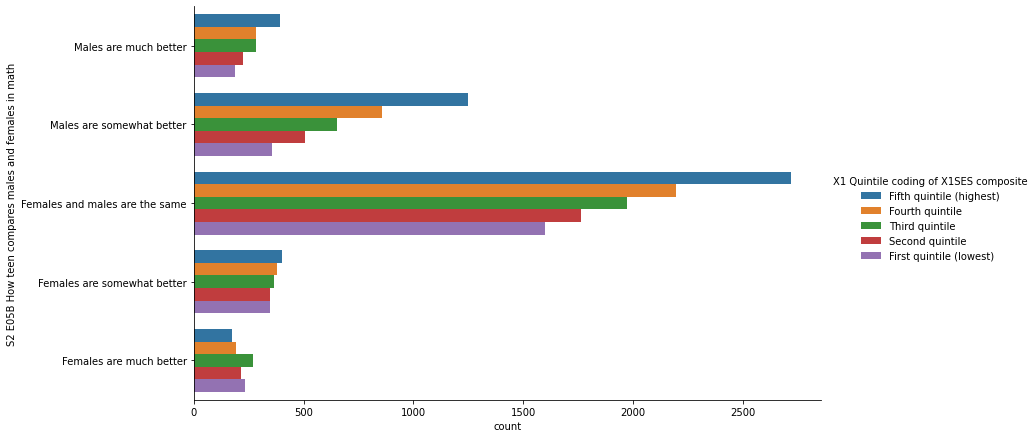

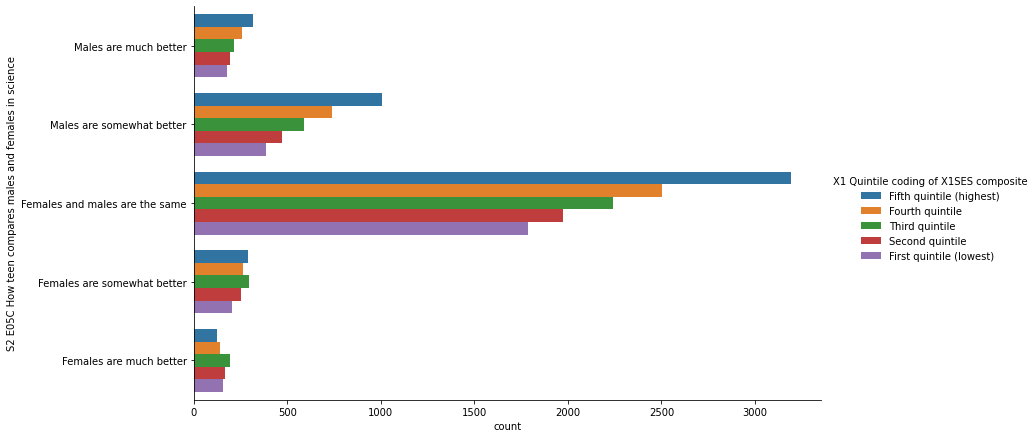

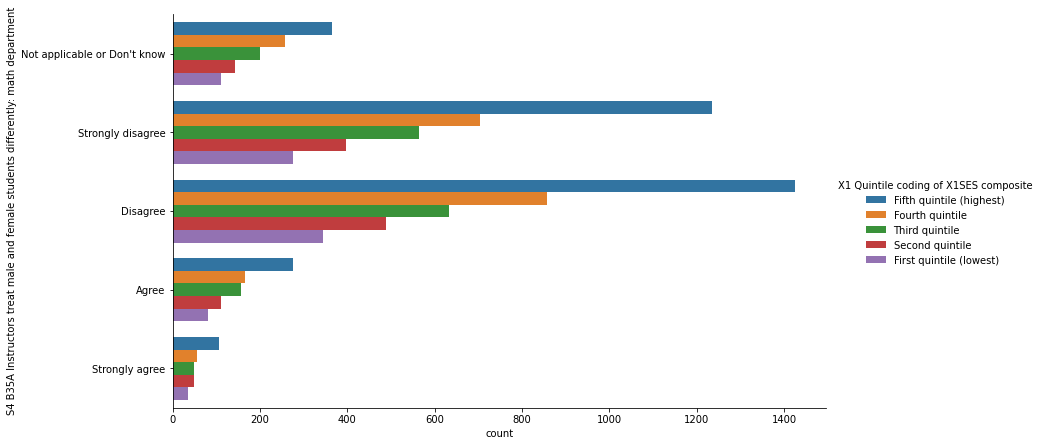

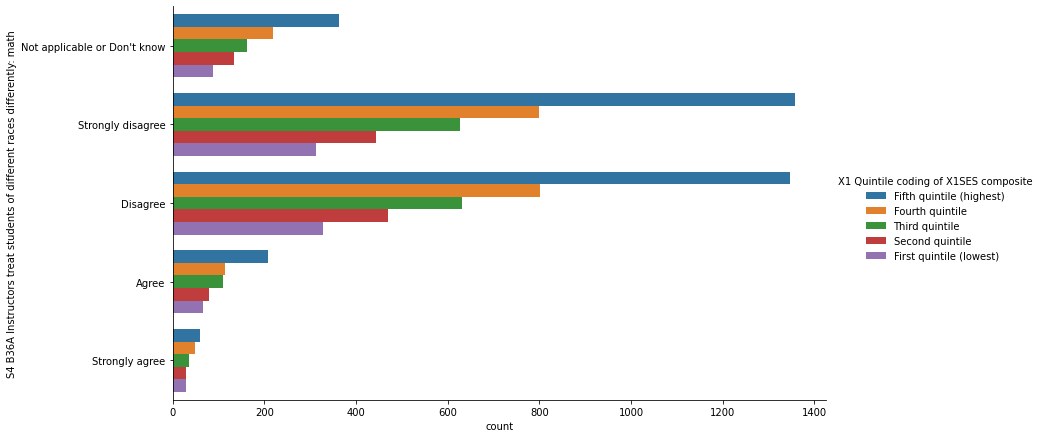

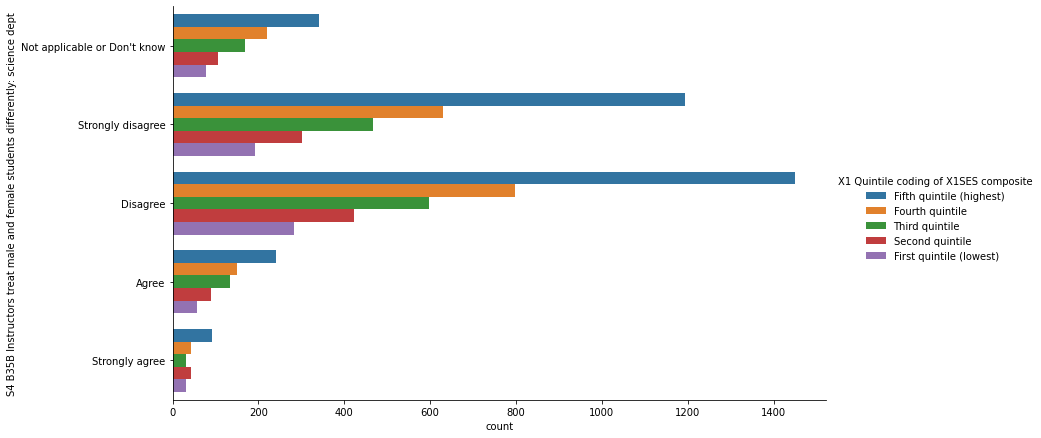

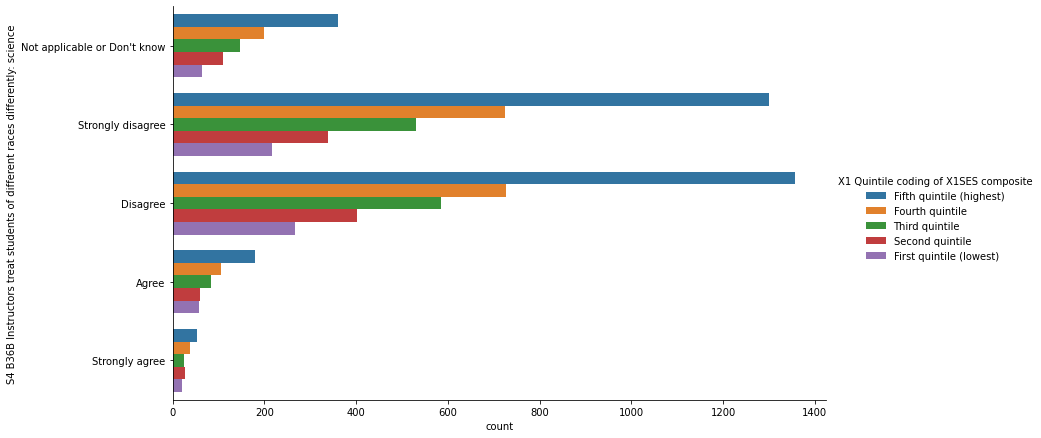

In [28]:
for column in attitude:
    sns.catplot(
    y=labels[column],
    hue=labels["X1SESQ5"],
    data=cdf,
    kind="count",
    height=6,
    aspect=2,
);

Note:

- Students in the 5th quintile SES may believe more strongly than other students that:
    - Teachers are fair
    - Males and females are equal

**Correlations between attitudes and beliefs**

- Depending on the item, ratings were coded using a 5-point scale such that: 
    - 0: *Strongly disagree* to 4: *Strongly agree*, or
    - 0: *Males are much better* to 4: *Females are much better*
- The significance is not flagged in the table below (but probably almost all values >= 0.1 are significant given the large N)
- In general, if we're interested in a correlation between parents' and students' beliefs, look at values between variables that starts with S (student) and P (parent)
- Again, variables that start with M is reported by math teachers and N is reported by science teachers

In [29]:
c = cdf["P1 E05B Comparison of females' and males' abilities in science"]

In [30]:
cdf[[labels[a] for a in attitude]].apply(lambda x: x.cat.codes).corr(method="pearson").style.format("{:.2}").background_gradient(cmap=plt.get_cmap("coolwarm"),
                                                                         vmin=-1, vmax=1, axis=0)

Note:

- Overall, there aren't correlations that stand out between different informants
- There are more correlations between variables that are reported by the same informant